### - SVs Unmatched Analysis: TRIPLE CALLER

In [1]:
import isabl_cli as ii
import os

In [2]:
from pybedtools import BedTool

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
from matplotlib_venn import venn2, venn2_circles

In [11]:
os.path.basename('/work/isabl/data/analyses/29/38/252938/IID_H158604_T01_01_WG01.bam').strip('.bam')

'IID_H158604_T01_01_WG01'

In [12]:
os.path.join('/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_SVs', 'IID_H158604_T01_01_WG01')

'/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_SVs/IID_H158604_T01_01_WG01'

### - annotSV:

In this file there's going to be applied the filters of SVs from the Merge of the Triple Caller, but without the information regarding svABA and GRIDSS scores.

In [6]:
#withbrass
path='/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/*/*.merged.annotated.tsv'
withbrass=!ls {path}
print(len(withbrass))
withbrass

58


['/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158604_T01_01_WG01/IID_H158604_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158605_T01_01_WG01/IID_H158605_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158606_T01_01_WG01/IID_H158606_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158607_T01_01_WG01/IID_H158607_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158608_T01_01_WG01/IID_H158608_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpi

# - Benchmarking SVs: uk_ALL

In [3]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1- Matched Data: Brass + Triple Caller

In [7]:
total_brass_uk=!isabl get-outdirs -fi application__name BRASS -fi targets__projects 321 -fi status SUCCEEDED
del total_brass_uk[0]
print(len(total_brass_uk))

total_tc_uk=!isabl get-outdirs -fi application__name ANNOT_SVS -fi targets__projects 321 -fi status SUCCEEDED
del total_tc_uk[0]
len(total_tc_uk)

57


57

In [8]:
total_tc_uk[0:10]

['/work/isabl/data/analyses/06/21/260621',
 '/work/isabl/data/analyses/06/22/260622',
 '/work/isabl/data/analyses/06/23/260623',
 '/work/isabl/data/analyses/06/24/260624',
 '/work/isabl/data/analyses/06/25/260625',
 '/work/isabl/data/analyses/06/26/260626',
 '/work/isabl/data/analyses/06/27/260627',
 '/work/isabl/data/analyses/06/29/260629',
 '/work/isabl/data/analyses/06/30/260630',
 '/work/isabl/data/analyses/06/31/260631']

There are 57 samples for uk_all with a Brass and Annot_SVs ouputs. (TC=Triple Caller).

In [9]:
#Extract the name of the cases by BRASS and use them for the Triple Caller
samples_isabl=[]
for n in total_brass_uk:
    path=n+'/*.bedpe'
    file=!ls {path}
    samples_isabl.append(file[0].split('/')[8].split('_vs')[0])
samples_isabl[0]

'IID_H158612_T01_01_WG01'

In [10]:
triple_full=pd.DataFrame()
for n in samples_isabl:
    #isabl
    list_annotSVs=!isabl get-outdirs -fi application__name ANNOT_SVS -fi targets__system_id {n}
    path=list_annotSVs[1]+'/merged_svs.pass.annotated.tsv'
    svs_pass=!ls {path}
    triple_patient=pd.read_csv(svs_pass[0],sep='\t')
    triple_patient['Sample']=n
    
    #num_reads=list()
    #for index,row in triple_patient.iterrows():
        #for f in row['INFO'].split(';'):
            #if ('brass_TSRDS' in f):
                #reads=len(f.split(','))
                #num_reads.append(reads)

    #print(len(num_reads))
    #print(triple_patient.shape)
    #triple_patient['score']=num_reads
    
    triple_patient=triple_patient[['SV chrom','SV start','SV end','ID','SV type','Sample']]
    triple_full=triple_full.append(triple_patient)
    
print(triple_full.shape)
triple_full.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (35,38,63) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(52845, 6)


,SV chrom,SV start,SV end,ID,SV type,Sample
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01
1,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01
2,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01
4,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01


In [11]:
triple_full_dup=triple_full.drop_duplicates()
print(triple_full_dup.shape)

(1488, 6)


In [12]:
triple_full_dup[triple_full_dup['Sample']=='IID_H158612_T01_01_WG01']

,SV chrom,SV start,SV end,ID,SV type,Sample
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01
12,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01
14,14,22892030,22976665,14_22892030_14_22976665_DEL_+-,DEL,IID_H158612_T01_01_WG01
16,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01
18,14,106315458,106383257,14_106315458_14_106383257_DEL_+-,DEL,IID_H158612_T01_01_WG01
23,14,106329450,106805207,14_106329450_14_106805207_DEL_+-,DEL,IID_H158612_T01_01_WG01
27,14,106330447,106586142,14_106330447_14_106586142_DEL_+-,DEL,IID_H158612_T01_01_WG01
30,14,106881446,107048677,14_106881446_14_107048677_DEL_+-,DEL,IID_H158612_T01_01_WG01
32,14,107095155,107169928,14_107095155_14_107169928_DEL_+-,DEL,IID_H158612_T01_01_WG01


In [13]:
counts=triple_full_dup.groupby('Sample').size()
counts=pd.DataFrame(counts).sort_values(by=[0],ascending=False)
counts['Sample']=counts.index
counts.columns = ['SV Events', 'Samples']
counts.head()

,SV Events,Samples
Sample,,
IID_H158636_T01_01_WG01,179,IID_H158636_T01_01_WG01
IID_H158613_T01_01_WG01,127,IID_H158613_T01_01_WG01
IID_H158615_T01_01_WG01,80,IID_H158615_T01_01_WG01
IID_H158646_T01_01_WG01,58,IID_H158646_T01_01_WG01
IID_H158616_T01_01_WG01,58,IID_H158616_T01_01_WG01


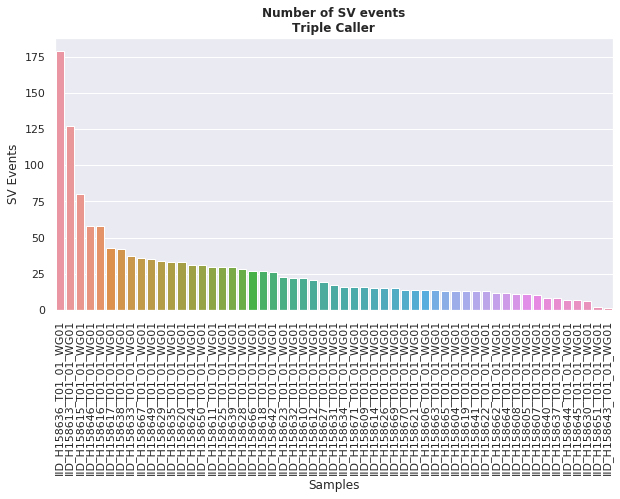

In [14]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=counts, x='Samples', y='SV Events')
plt.xticks(rotation=90)
ax.set_title('Number of SV events\nTriple Caller',weight='bold')
#plt.xticks(rotation=45)
plt.show()

- Number Reads:

In [15]:
triple_full_info=pd.DataFrame()
for n in samples_isabl:
    #isabl
    list_annotSVs=!isabl get-outdirs -fi application__name ANNOT_SVS -fi targets__system_id {n}
    path=list_annotSVs[1]+'/merged_svs.pass.annotated.tsv'
    svs_pass=!ls {path}
    triple_patient_info=pd.read_csv(svs_pass[0],sep='\t')
    triple_patient_info['Sample']=n
    
    #Number of Reads
    brass_RC=[]
    gridss_VF=[]
    svaba_AD=[]
    brass_PS=[]
    gridss_RF=[]
    svaba_DP=[]
    for index,row in triple_patient_info.iterrows():
        format_list=row['FORMAT'].split(':')
        if ('brass_PS' in format_list):
            brass_PS.append(row[str(n)].split(':')[format_list.index('brass_PS')])
            #brass_PS.append(row[str(n)].split(':')[format_list.index('brass_PS')-1])
        else:
            brass_RC.append(0)
            brass_PS.append(0)
            
        if ('gridss_VF' in format_list):    
            gridss_VF.append(row[str(n)].split(':')[format_list.index('gridss_VF')])
            #gridss_RF.append(row[str(n)].split(':')[format_list.index('gridss_RF')-1])
        else:
            gridss_VF.append(0)
            gridss_RF.append(0)
            
        if ('svaba_AD' in format_list):
            svaba_AD.append(row[str(n)].split(':')[format_list.index('svaba_AD')])
            #svaba_DP.append(row[str(n)].split(':')[format_list.index('svaba_DP')-1])
        else:
            svaba_AD.append(0)
            svaba_DP.append(0)
        

    #print(len(num_reads))
    #print(triple_patient.shape)
    #triple_patient['score']=num_reads
    

    triple_patient_info['brass_PS']=brass_PS
    triple_patient_info['gridss_VF']=gridss_VF
    triple_patient_info['svaba_AD']=svaba_AD
    
    triple_patient_info=triple_patient_info[triple_patient_info['AnnotSV type']=='full']
    triple_patient_info=triple_patient_info[['SV chrom','SV start','SV end','ID','SV type','Sample','brass_PS','gridss_VF','svaba_AD']]
    triple_full_info=triple_full_info.append(triple_patient_info)
    
print(triple_full_info.shape)
triple_full_info.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (35,38,63) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1487, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9
12,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01,22,31,13
14,14,22892030,22976665,14_22892030_14_22976665_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8
16,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,24,28,28


In [16]:
triple_full_info_dup=triple_full_info.drop_duplicates()
print(triple_full_info_dup.shape)

(1487, 9)


### 2- TINder SVs:

### A) Two or more callers

In [17]:
#withbrass
path='/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/*/*.merged.annotated.tsv'
tinder_svs=!ls {path}
print(len(tinder_svs))
tinder_svs

58


['/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158604_T01_01_WG01/IID_H158604_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158605_T01_01_WG01/IID_H158605_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158606_T01_01_WG01/IID_H158606_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158607_T01_01_WG01/IID_H158607_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158608_T01_01_WG01/IID_H158608_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpi

#### - Outputs Joe's Annotation:

In [18]:
tinder_full=pd.DataFrame(columns=['SV chrom','SV start','ALT','SV length','SV type','Gene name','AnnotSV type','FORMAT','GD_AF','GD_POPMAX_AF'])

for n in tinder_svs:
    #Joe's output click_annotsv
    name=n.split('/')[11]
    tinder_annot_filters = pd.read_csv(n,sep='\t')

    #Full
    tinder_annot_filters_full=tinder_annot_filters[tinder_annot_filters['AnnotSV type']=='full']
    tinder_annot_filters_full=tinder_annot_filters_full[['SV chrom','SV start','ALT','SV length','SV type','Gene name','AnnotSV type','FORMAT','GD_AF','GD_POPMAX_AF',str(name)]]
    tinder_annot_filters_full['Sample']=name
    
    #Number of Reads
    gridss_VF=[]
    svaba_AD=[]
    brass_PS=[]
    
    brass_tag='brass_'+name+'_PS'
    
    for index,row in tinder_annot_filters_full.iterrows():
        format_list=row['FORMAT'].split(':')
        if (brass_tag in format_list):
            brass_PS.append(row[str(name)].split(':')[format_list.index(brass_tag)])
            #brass_PS.append(row[str(n)].split(':')[format_list.index('brass_PS')-1])
        else:
            brass_PS.append(0)
            
        if ('gridss_VF' in format_list):    
            gridss_VF.append(row[str(name)].split(':')[format_list.index('gridss_VF')])
        else:
            gridss_VF.append(0)
            
        if ('svaba_AD' in format_list):
            svaba_AD.append(row[str(name)].split(':')[format_list.index('svaba_AD')])
        else:
            svaba_AD.append(0)
    

    tinder_annot_filters_full['brass_PS']=brass_PS
    tinder_annot_filters_full['gridss_VF']=gridss_VF
    tinder_annot_filters_full['svaba_AD']=svaba_AD
    
    tinder_annot_filters_full.drop(columns=['FORMAT'],inplace=True)

    tinder_full=tinder_full.append(tinder_annot_filters_full)

tinder_full=tinder_full[['SV chrom','SV start','ALT','SV length','SV type','Gene name','GD_AF','GD_POPMAX_AF','Sample','brass_PS','gridss_VF','svaba_AD']]
tinder_full=tinder_full.reset_index(drop=True)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,35,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/pyt

In [19]:
print(tinder_full.shape)
tinder_full.head()

(143493, 12)


,SV chrom,SV start,ALT,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
0,1,1162681,N[1:1162856[,175.0,DEL,SDF4,0.12385900318622589,0.170710,IID_H158604_T01_01_WG01,0,35,0
1,1,1408373,N[1:1408671[,298.0,DEL,ATAD3B,0.008849999867379665,0.020619,IID_H158604_T01_01_WG01,0,0,4
2,1,2399908,N[1:2399957[,49.0,DEL,PLCH2,0.0851610004901886,0.186490,IID_H158604_T01_01_WG01,0,26,0
3,1,2533555,]1:2533628]N,73.0,DUP,MMEL1,-1,-1.000000,IID_H158604_T01_01_WG01,0,43,0
4,1,3484937,]1:3484968]N,31.0,DUP,MEGF6,0.04464299976825714,0.500000,IID_H158604_T01_01_WG01,0,20,0


### -Checking TRAs problem:

In [20]:
tinder_full[((tinder_full['brass_PS']==0) & (tinder_full['gridss_VF']==0) & (tinder_full['svaba_AD']==0))].shape

(0, 12)

In [21]:
tinder_full[((tinder_full['gridss_VF']==0) & (tinder_full['svaba_AD']==0))].shape

(1757, 12)

In [22]:
print(tinder_full[tinder_full['brass_PS']!=0].shape)
tinder_full_brass=tinder_full[tinder_full['brass_PS']!=0]
tinder_full_brass=tinder_full_brass.reset_index()
tinder_full_brass.head()

(3188, 12)


,index,SV chrom,SV start,ALT,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
0,102,1,159420252,]17:55923716]N,NaN,TRA,NaN,-1,-1.0,IID_H158604_T01_01_WG01,5,0,0
1,209,10,34177954,]11:65607032]N,NaN,TRA,NaN,-1,-1.0,IID_H158604_T01_01_WG01,5,0,0
2,256,10,120303654,]10:120305644]N,1990.0,DUP,NaN,-1,-1.0,IID_H158604_T01_01_WG01,30,62,36
3,300,11,37429053,]17:10138559]N,NaN,TRA,NaN,-1,-1.0,IID_H158604_T01_01_WG01,5,0,0
4,384,12,6613399,[22:41443456[N,NaN,TRA,NCAPD2,-1,-1.0,IID_H158604_T01_01_WG01,32,0,0


- TINder: at least Brass + Other

In [23]:
tinder_full_brass['brass_PS']=tinder_full_brass['brass_PS'].map(int)
tinder_full_brass['gridss_VF']=tinder_full_brass['gridss_VF'].map(int)
tinder_full_brass['svaba_AD']=tinder_full_brass['svaba_AD'].map(int)

tinder_full_2callers=pd.DataFrame(columns=['SV chrom','SV start','ALT','SV length','SV type','Gene name','GD_AF','GD_POPMAX_AF','Sample','brass_PS','gridss_VF','svaba_AD'])
for index,row in tinder_full_brass.iterrows():    
    if ( ((row.brass_PS!=0) & (row.gridss_VF!=0)) | ((row.brass_PS!=0) & (row.svaba_AD!=0))):
        tinder_full_2callers=tinder_full_2callers.append(row)

print(tinder_full_2callers.shape)            
tinder_full_2callers.head()        

(1431, 13)


,SV chrom,SV start,ALT,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD,index
2,10,120303654,]10:120305644]N,1990.0,DUP,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,30,62,36,256.0
5,12,6791754,N]22:41528146],NaN,TRA,ZNF384,-1,-1.000000,IID_H158604_T01_01_WG01,45,60,43,386.0
7,14,22866689,N[14:23004506[,137817.0,DEL,LOC105370401,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,66,38,622.0
8,14,49067540,N[14:49429620[,362080.0,DEL,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,61,78,33,645.0
9,14,49407635,N]14:49461451],53816.0,INV,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,21,40,40,646.0


In [24]:
tinder_full_2callers=tinder_full_2callers[['SV chrom','SV start','ALT','SV length','SV type','Gene name','GD_AF','GD_POPMAX_AF','Sample','brass_PS','gridss_VF','svaba_AD']]
tinder_full_2callers.head()                      

,SV chrom,SV start,ALT,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
2,10,120303654,]10:120305644]N,1990.0,DUP,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,30,62,36
5,12,6791754,N]22:41528146],NaN,TRA,ZNF384,-1,-1.000000,IID_H158604_T01_01_WG01,45,60,43
7,14,22866689,N[14:23004506[,137817.0,DEL,LOC105370401,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,66,38
8,14,49067540,N[14:49429620[,362080.0,DEL,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,61,78,33
9,14,49407635,N]14:49461451],53816.0,INV,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,21,40,40


In [25]:
tinder_full_2callers_format=tinder_full_2callers.copy()

alt=[]
for index,row in tinder_full_2callers_format.iterrows():
    row['ALT']=row['ALT'].replace(']','').replace('N','').replace('[','')
    alt.append(row['ALT'])

tinder_full_2callers_format['ALT']=alt
tinder_full_2callers_format.head()

,SV chrom,SV start,ALT,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
2,10,120303654,10:120305644,1990.0,DUP,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,30,62,36
5,12,6791754,22:41528146,NaN,TRA,ZNF384,-1,-1.000000,IID_H158604_T01_01_WG01,45,60,43
7,14,22866689,14:23004506,137817.0,DEL,LOC105370401,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,66,38
8,14,49067540,14:49429620,362080.0,DEL,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,61,78,33
9,14,49407635,14:49461451,53816.0,INV,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,21,40,40


In [26]:
sv_chrom2=[]
sv_start2=[]
for index,row in tinder_full_2callers_format.iterrows():
    sv_chrom2.append(row['ALT'].split(':')[0])
    sv_start2.append(row['ALT'].split(':')[1])
tinder_full_2callers_format['SV chrom2']=sv_chrom2
tinder_full_2callers_format['SV start2']=sv_start2
tinder_full_2callers_format2=tinder_full_2callers_format[['SV chrom','SV start','SV chrom2','SV start2','SV length','SV type','Gene name','GD_AF','GD_POPMAX_AF','Sample','brass_PS','gridss_VF','svaba_AD']]
tinder_full_2callers_format2['SV start']=tinder_full_2callers_format2['SV start'].map(int)
tinder_full_2callers_format2['SV start2']=tinder_full_2callers_format2['SV start2'].map(int)

sv_length=[]
for index,row in tinder_full_2callers_format2.iterrows():
    if(row['SV type']=='TRA'):
        sv_length.append('NaN')
    else:
        sv_length.append(row['SV start2']-row['SV start'])
        
tinder_full_2callers_format2['SV length']=sv_length

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site

In [27]:
#tinder_full_2callers_format2[tinder_full_2callers_format2['gridss_VF']==0].head()
tinder_full_2callers_format2.head()

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
2,10,120303654,10,120305644,1990,DUP,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,30,62,36
5,12,6791754,22,41528146,NaN,TRA,ZNF384,-1,-1.000000,IID_H158604_T01_01_WG01,45,60,43
7,14,22866689,14,23004506,137817,DEL,LOC105370401,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,66,38
8,14,49067540,14,49429620,362080,DEL,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,61,78,33
9,14,49407635,14,49461451,53816,INV,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,21,40,40


[NOTE: 'SV lenght' with TRA it is not informative]

In [28]:
print(tinder_full_2callers_format2.shape)
tinder_full_2callers_format2.head()

(1431, 13)


,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
2,10,120303654,10,120305644,1990,DUP,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,30,62,36
5,12,6791754,22,41528146,NaN,TRA,ZNF384,-1,-1.000000,IID_H158604_T01_01_WG01,45,60,43
7,14,22866689,14,23004506,137817,DEL,LOC105370401,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,66,38
8,14,49067540,14,49429620,362080,DEL,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,61,78,33
9,14,49407635,14,49461451,53816,INV,NaN,-1,-1.000000,IID_H158604_T01_01_WG01,21,40,40


- Unmatched:

In [29]:
#Take into account that one of the patients is unmatched (IID_H158647_T01_01_WG01)
tinder_full_set=tinder_full_2callers_format2[~(tinder_full_2callers_format2['Sample']=='IID_H158647_T01_01_WG01')]
print(tinder_full_2callers_format2.shape,'\t',tinder_full_set.shape)

(1431, 13) 	 (1416, 13)


- BTG:

In [30]:
#Take into account that five patients have not unmatched results (IID_H158647_T01_01_WG01,IID_H158647_T01_01_WG01,IID_H158647_T01_01_WG01,IID_H158647_T01_01_WG01,IID_H158647_T01_01_WG01)
#brass_full_set=brass_full[~( (brass_full['sample']=='IID_H158639_T01_01_WG01') | (brass_full['sample']=='IID_H158668_T01_01_WG01')  |(brass_full['sample']=='IID_H158607_T01_01_WG01') | (brass_full['sample']=='IID_H158613_T01_01_WG01') | (brass_full['sample']=='IID_H158634_T01_01_WG01'))]
#print(brass_full.shape,'\t',brass_full_set.shape)

### - gnomAD Germline Events: tinder_full_set

In [31]:
tinder_full_set=tinder_full_set[tinder_full_set['GD_POPMAX_AF']<=0.02]
tinder_full_set.shape

(1359, 13)

In [32]:
tinder_full_set.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
2,10,120303654,10,120305644,1990,DUP,NaN,-1,-1.0,IID_H158604_T01_01_WG01,30,62,36


- keys:

In [33]:
tinder_full_set_keys=tinder_full_set.copy()
keys=[]
for index,row in tinder_full_set.iterrows():
    key=str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV chrom2'])+'_'+str(row['SV start2'])+'_'+row['Sample']
    keys.append(key)
tinder_full_set_keys['keys']=keys

### A) Intersection Deletion:

### 1.1) Output of TINder detected by the Triple Caller: red + yellow

In [34]:
tinder_full_set_DEL=tinder_full_set_keys[tinder_full_set_keys['SV type']=='DEL']
tinder_full_set_DEL_2intersect=tinder_full_set_DEL[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','keys']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_DEL_2intersect['SV chrom']=tinder_full_set_DEL_2intersect['SV chrom'].map(str)
tinder_full_set_DEL_2intersect['SV length']=tinder_full_set_DEL_2intersect['SV length'].map(int)
tinder_full_set_DEL_2intersect['GD_AF']=tinder_full_set_DEL_2intersect['GD_AF'].map(str)
tinder_full_set_DEL_2intersect['GD_POPMAX_AF']=tinder_full_set_DEL_2intersect['GD_POPMAX_AF'].map(str)
tinder_full_set_DEL_2intersect['brass_PS']=tinder_full_set_DEL_2intersect['brass_PS'].map(str)
tinder_full_set_DEL_2intersect['gridss_VF']=tinder_full_set_DEL_2intersect['gridss_VF'].map(str)
tinder_full_set_DEL_2intersect['svaba_AD']=tinder_full_set_DEL_2intersect['svaba_AD'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_DEL_2intersect.shape)
tinder_full_set_DEL_2intersect.head()

(500, 12)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.0058079999871552,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01
8,14,49067540,49429620,362080,DEL,IID_H158604_T01_01_WG01,-1,-1.0,61,78,33,14_49067540_14_49429620_IID_H158604_T01_01_WG01
10,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1,-1.0,36,62,32,14_102562994_14_106373075_IID_H158604_T01_01_WG01
42,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.005078999791294336,0.0058079999871552,25,33,25,14_22892030_14_23002450_IID_H158605_T01_01_WG01
62,5,60201995,60294535,92540,DEL,IID_H158605_T01_01_WG01,4.70000013592653e-05,0.000561000022571534,47,65,34,5_60201995_5_60294535_IID_H158605_T01_01_WG01


In [35]:
triple_full_info_dup.head(2)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9


In [36]:
triple_full_info_dup_DEL=triple_full_info_dup[triple_full_info_dup['SV type']=='DEL']
print(triple_full_info_dup_DEL.shape)
triple_full_info_dup_DEL.head()

(789, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9
12,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01,22,31,13
14,14,22892030,22976665,14_22892030_14_22976665_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8
16,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,24,28,28


In [37]:
triple_full_info_dup_DEL_2intersect=triple_full_info_dup_DEL.copy()
triple_full_info_dup_DEL_2intersect['keys']=triple_full_info_dup_DEL_2intersect['ID']+'_'+triple_full_info_dup_DEL_2intersect['Sample']

triple_full_info_dup_DEL_2intersect['to_index']=triple_full_info_dup_DEL_2intersect['keys']
triple_full_info_dup_DEL_2intersect.index = triple_full_info_dup_DEL_2intersect['to_index']
triple_full_info_dup_DEL_2intersect=triple_full_info_dup_DEL_2intersect[['SV chrom','SV start','SV end','ID','SV type','Sample','brass_PS','gridss_VF','svaba_AD']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
triple_full_info_dup_DEL_2intersect.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
to_index,,,,,,,,,
12_110895557_12_110907163_DEL_+-_IID_H158612_T01_01_WG01,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8
13_44716505_13_45010463_DEL_+-_IID_H158612_T01_01_WG01,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9
14_22866085_14_22918105_DEL_+-_IID_H158612_T01_01_WG01,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01,22,31,13
14_22892030_14_22976665_DEL_+-_IID_H158612_T01_01_WG01,14,22892030,22976665,14_22892030_14_22976665_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8
14_22908005_14_22918118_DEL_+-_IID_H158612_T01_01_WG01,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,24,28,28


In [38]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(tinder_full_set_DEL_2intersect.values.tolist())
list_bed_cytobands=BedTool(triple_full_info_dup_DEL_2intersect.values.tolist())

I_deletions = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','size','SVtype','Sample','GD_AF','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','key','chr_band', 'start_band', 'end_band','ID','SV type','Sample.1','brass_PS.tr','gridss_VF.tr','svaba_AD.tr'])
#I = I[I.chr_band!="X"]
print(I_deletions.shape)
I_deletions.head()

(5524, 21)


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,gridss_VF.tr,svaba_AD.tr
0,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,24,28,28
1,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22908009,22918112,14_22908009_14_22918112_DEL_+-,DEL,IID_H158613_T01_01_WG01,48,69,34
2,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22907993,22918142,14_22907993_14_22918142_DEL_+-,DEL,IID_H158616_T01_01_WG01,13,19,9
3,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22907998,22918118,14_22907998_14_22918118_DEL_+-,DEL,IID_H158607_T01_01_WG01,33,43,13
4,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22907999,22918117,14_22907999_14_22918117_DEL_+-,DEL,IID_H158638_T01_01_WG01,31,61,29


In [39]:
I_deletions_PATIENT=I_deletions[I_deletions['Sample']==I_deletions['Sample.1']]
I_deletions_PATIENT['keys']=I_deletions_PATIENT['chr_seg'].map(str)+'_'+I_deletions_PATIENT['start_seg'].map(str)+'_'+I_deletions_PATIENT['end_seg'].map(str)+'_'+I_deletions_PATIENT['Sample'].map(str)
print(I_deletions_PATIENT.shape)
print(len(I_deletions_PATIENT['keys'].unique()))
I_deletions_PATIENT.head()

(535, 22)
359


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
24,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22950265,22981845,14_22950265_14_22981845_DEL_+-,DEL,IID_H158604_T01_01_WG01,19,45,26,14_22866689_23004506_IID_H158604_T01_01_WG01
48,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22866689,23004506,14_22866689_14_23004506_DEL_+-,DEL,IID_H158604_T01_01_WG01,47,66,38,14_22866689_23004506_IID_H158604_T01_01_WG01
137,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1.000000,-1.000000,36,62,32,14_102562994_14_106373075_IID_H158604_T01_01_WG01,14,106330072,106667593,14_106330072_14_106667593_DEL_+-,DEL,IID_H158604_T01_01_WG01,36,54,40,14_102562994_106373075_IID_H158604_T01_01_WG01
170,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1.000000,-1.000000,36,62,32,14_102562994_14_106373075_IID_H158604_T01_01_WG01,14,102562994,106373075,14_102562994_14_106373075_DEL_+-,DEL,IID_H158604_T01_01_WG01,36,62,32,14_102562994_106373075_IID_H158604_T01_01_WG01
221,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.005079,0.005808,25,33,25,14_22892030_14_23002450_IID_H158605_T01_01_WG01,14,22892029,22981836,14_22892029_14_22981836_DEL_+-,DEL,IID_H158605_T01_01_WG01,34,48,31,14_22892030_23002450_IID_H158605_T01_01_WG01


- Overlapping of deletions around 70%:

In [40]:
I_deletions_PATIENT['start_seg']=I_deletions_PATIENT['start_seg'].astype(int)
I_deletions_PATIENT['end_seg']=I_deletions_PATIENT['end_seg'].astype(int)
I_deletions_PATIENT['start_band']=I_deletions_PATIENT['start_band'].astype(int)
I_deletions_PATIENT['end_band']=I_deletions_PATIENT['end_band'].astype(int) 

I_deletions_70_PATIENT=[]
for index,row in I_deletions_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_deletions_70_PATIENT.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_deletions_70_PATIENT.append(row)

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_deletions_70_PATIENT.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_deletions_70_PATIENT.append(row)
   

I_deletions_70_PATIENT=pd.DataFrame(I_deletions_70_PATIENT)
print(I_deletions_70_PATIENT.shape)
print(len(I_deletions_70_PATIENT['keys'].unique()))
I_deletions_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py

(429, 22)
341


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
48,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22866689,23004506,14_22866689_14_23004506_DEL_+-,DEL,IID_H158604_T01_01_WG01,47,66,38,14_22866689_23004506_IID_H158604_T01_01_WG01
170,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1.000000,-1.000000,36,62,32,14_102562994_14_106373075_IID_H158604_T01_01_WG01,14,102562994,106373075,14_102562994_14_106373075_DEL_+-,DEL,IID_H158604_T01_01_WG01,36,62,32,14_102562994_106373075_IID_H158604_T01_01_WG01
221,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.005079,0.005808,25,33,25,14_22892030_14_23002450_IID_H158605_T01_01_WG01,14,22892029,22981836,14_22892029_14_22981836_DEL_+-,DEL,IID_H158605_T01_01_WG01,34,48,31,14_22892030_23002450_IID_H158605_T01_01_WG01
222,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.005079,0.005808,25,33,25,14_22892030_14_23002450_IID_H158605_T01_01_WG01,14,22892030,23002450,14_22892030_14_23002450_DEL_+-,DEL,IID_H158605_T01_01_WG01,25,33,25,14_22892030_23002450_IID_H158605_T01_01_WG01
310,9,15424528,22380856,6956328,DEL,IID_H158605_T01_01_WG01,-1.000000,-1.000000,39,59,33,9_15424528_9_22380856_IID_H158605_T01_01_WG01,9,15424528,22380856,9_15424528_9_22380856_DEL_+-,DEL,IID_H158605_T01_01_WG01,39,59,33,9_15424528_22380856_IID_H158605_T01_01_WG01


- Detected/NonDetected:

In [41]:
tinder_full_set_DEL.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD,keys
7,14,22866689,14,23004506,137817,DEL,LOC105370401,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01


In [42]:
tinder_full_set_DEL_DETECT=tinder_full_set_DEL[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','keys']]
tinder_full_set_DEL_DETECT.head()

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01
8,14,49067540,49429620,362080,DEL,IID_H158604_T01_01_WG01,-1,-1.000000,61,78,33,14_49067540_14_49429620_IID_H158604_T01_01_WG01
10,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1,-1.000000,36,62,32,14_102562994_14_106373075_IID_H158604_T01_01_WG01
42,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.005078999791294336,0.005808,25,33,25,14_22892030_14_23002450_IID_H158605_T01_01_WG01
62,5,60201995,60294535,92540,DEL,IID_H158605_T01_01_WG01,4.70000013592653e-05,0.000561,47,65,34,5_60201995_5_60294535_IID_H158605_T01_01_WG01


In [43]:
detection=[]
for index,row in tinder_full_set_DEL_DETECT.iterrows():
    if (str(row['keys']) in I_deletions_70_PATIENT['key'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
tinder_full_set_DEL_DETECT['Detection']=detection
tinder_full_set_DEL_DETECT[tinder_full_set_DEL_DETECT['Detection']=='Non Detected'].head()

500


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
8,14,49067540,49429620,362080,DEL,IID_H158604_T01_01_WG01,-1,-1.000000,61,78,33,14_49067540_14_49429620_IID_H158604_T01_01_WG01,Non Detected
62,5,60201995,60294535,92540,DEL,IID_H158605_T01_01_WG01,4.70000013592653e-05,0.000561,47,65,34,5_60201995_5_60294535_IID_H158605_T01_01_WG01,Non Detected
64,7,110382221,110493855,111634,DEL,IID_H158605_T01_01_WG01,-1,-1.000000,33,48,30,7_110382221_7_110493855_IID_H158605_T01_01_WG01,Non Detected
76,11,68782074,68787123,5049,DEL,IID_H158606_T01_01_WG01,-1,-1.000000,57,73,55,11_68782074_11_68787123_IID_H158606_T01_01_WG01,Non Detected
82,13,83435494,83439889,4395,DEL,IID_H158606_T01_01_WG01,0.00010900000052060932,0.000720,48,74,39,13_83435494_13_83439889_IID_H158606_T01_01_WG01,Non Detected


In [44]:
print(tinder_full_set_DEL_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DEL_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(500, 13)
341 159


In [291]:
#Joe
tinder_full_set_DEL_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DEL_DETECT.tsv',sep='\t')

### 1.2) Precision: TripleCaller calls in TINder: yellow and green areas

In [45]:
tinder_full_set.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
2,10,120303654,10,120305644,1990,DUP,NaN,-1,-1.0,IID_H158604_T01_01_WG01,30,62,36


In [46]:
tinder_full_set_DEL=tinder_full_set[tinder_full_set['SV type']=='DEL']
tinder_full_set_DEL_2intersect=tinder_full_set_DEL[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_DEL_2intersect['SV length']=tinder_full_set_DEL_2intersect['SV length'].map(int)
tinder_full_set_DEL_2intersect['GD_AF']=tinder_full_set_DEL_2intersect['GD_AF'].map(str)
tinder_full_set_DEL_2intersect['GD_POPMAX_AF']=tinder_full_set_DEL_2intersect['GD_POPMAX_AF'].map(str)
tinder_full_set_DEL_2intersect['brass_PS']=tinder_full_set_DEL_2intersect['brass_PS'].map(str)
tinder_full_set_DEL_2intersect['gridss_VF']=tinder_full_set_DEL_2intersect['gridss_VF'].map(str)
tinder_full_set_DEL_2intersect['svaba_AD']=tinder_full_set_DEL_2intersect['svaba_AD'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_DEL_2intersect.shape)
tinder_full_set_DEL_2intersect.head()

(500, 11)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.0058079999871552,47,66,38
8,14,49067540,49429620,362080,DEL,IID_H158604_T01_01_WG01,-1,-1.0,61,78,33
10,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1,-1.0,36,62,32
42,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.005078999791294336,0.0058079999871552,25,33,25
62,5,60201995,60294535,92540,DEL,IID_H158605_T01_01_WG01,4.70000013592653e-05,0.000561000022571534,47,65,34


In [47]:
tinder_full_set_DEL_2intersect
#keys
keys=[]
for index,row in tinder_full_set_DEL_2intersect.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV start2'])+'_'+row['Sample'])
tinder_full_set_DEL_2intersect['keys']=keys
tinder_full_set_DEL_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.0058079999871552,47,66,38,14_22866689_23004506_IID_H158604_T01_01_WG01
8,14,49067540,49429620,362080,DEL,IID_H158604_T01_01_WG01,-1,-1.0,61,78,33,14_49067540_49429620_IID_H158604_T01_01_WG01
10,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1,-1.0,36,62,32,14_102562994_106373075_IID_H158604_T01_01_WG01
42,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.005078999791294336,0.0058079999871552,25,33,25,14_22892030_23002450_IID_H158605_T01_01_WG01
62,5,60201995,60294535,92540,DEL,IID_H158605_T01_01_WG01,4.70000013592653e-05,0.000561000022571534,47,65,34,5_60201995_60294535_IID_H158605_T01_01_WG01


In [48]:
tinder_full_set_DEL_2intersect2=tinder_full_set_DEL_2intersect.copy()
tinder_full_set_DEL_2intersect2['to_index']=tinder_full_set_DEL_2intersect['keys']
tinder_full_set_DEL_2intersect2.index = tinder_full_set_DEL_2intersect2['to_index']
tinder_full_set_DEL_2intersect2=tinder_full_set_DEL_2intersect2[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','keys']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
tinder_full_set_DEL_2intersect2.head()

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
to_index,,,,,,,,,,,
14_22866689_23004506_IID_H158604_T01_01_WG01,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.0058079999871552,47,66,38,14_22866689_23004506_IID_H158604_T01_01_WG01
14_49067540_49429620_IID_H158604_T01_01_WG01,14,49067540,49429620,362080,DEL,IID_H158604_T01_01_WG01,-1.0,61,78,33,14_49067540_49429620_IID_H158604_T01_01_WG01
14_102562994_106373075_IID_H158604_T01_01_WG01,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1.0,36,62,32,14_102562994_106373075_IID_H158604_T01_01_WG01
14_22892030_23002450_IID_H158605_T01_01_WG01,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.0058079999871552,25,33,25,14_22892030_23002450_IID_H158605_T01_01_WG01
5_60201995_60294535_IID_H158605_T01_01_WG01,5,60201995,60294535,92540,DEL,IID_H158605_T01_01_WG01,0.000561000022571534,47,65,34,5_60201995_60294535_IID_H158605_T01_01_WG01


In [49]:
print(triple_full_info_dup_DEL.shape)
triple_full_info_dup_DEL.head(2)

(789, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9


In [50]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_DEL.values.tolist())
list_bed_cytobands=BedTool(tinder_full_set_DEL_2intersect2.values.tolist())

I_deletions_TC = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg', 'end_seg','ID','SV type','Sample','brass_PS','gridss_VF','svaba_AD','chr_band', 'start_band','end_band','size','SVtype','Sample.1','GD_POPMAX_AF','brass_PS.tr','gridss_VF.tr','svaba_AD.tr','keys'])
#I = I[I.chr_band!="X"]
print(I_deletions_TC.shape)
I_deletions_TC.head()

(5524, 20)


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8,12,110895557,110907163,11606,DEL,IID_H158612_T01_01_WG01,-1.000000,8,12,8,12_110895557_110907163_IID_H158612_T01_01_WG01
1,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9,13,44980727,45010462,29735,DEL,IID_H158633_T01_01_WG01,-1.000000,23,61,41,13_44980727_45010462_IID_H158633_T01_01_WG01
2,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9,13,44716505,45010463,293958,DEL,IID_H158612_T01_01_WG01,-1.000000,4,14,9,13_44716505_45010463_IID_H158612_T01_01_WG01
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9,13,28530816,91014774,62483958,DEL,IID_H158624_T01_01_WG01,-1.000000,13,17,17,13_28530816_91014774_IID_H158624_T01_01_WG01
4,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01,22,31,13,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005808,47,66,38,14_22866689_23004506_IID_H158604_T01_01_WG01


In [51]:
I_deletions_TC_PATIENT=I_deletions_TC[I_deletions_TC['Sample']==I_deletions_TC['Sample.1']]
I_deletions_TC_PATIENT['keys']=I_deletions_TC_PATIENT['chr_seg'].map(str)+'_'+I_deletions_TC_PATIENT['start_seg'].map(str)+'_'+I_deletions_TC_PATIENT['end_seg'].map(str)+'_'+I_deletions_TC_PATIENT['Sample'].map(str)
print(I_deletions_TC_PATIENT.shape)
print(len(I_deletions_TC_PATIENT['keys'].unique()))
I_deletions_TC_PATIENT.head()

(535, 20)
383


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8,12,110895557,110907163,11606,DEL,IID_H158612_T01_01_WG01,-1.000000,8,12,8,12_110895557_110907163_IID_H158612_T01_01_WG01
2,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9,13,44716505,45010463,293958,DEL,IID_H158612_T01_01_WG01,-1.000000,4,14,9,13_44716505_45010463_IID_H158612_T01_01_WG01
77,14,106881446,107048677,14_106881446_14_107048677_DEL_+-,DEL,IID_H158612_T01_01_WG01,11,20,17,14,106881446,107048677,167231,DEL,IID_H158612_T01_01_WG01,0.006734,11,20,17,14_106881446_107048677_IID_H158612_T01_01_WG01
94,2,114164439,114195649,2_114164439_2_114195649_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,0,11,2,114164439,114195649,31210,DEL,IID_H158612_T01_01_WG01,-1.000000,7,0,11,2_114164439_114195649_IID_H158612_T01_01_WG01
116,7,27985458,55777536,7_27985458_7_55777536_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,22,11,7,27985458,55777536,27792078,DEL,IID_H158612_T01_01_WG01,-1.000000,13,22,11,7_27985458_55777536_IID_H158612_T01_01_WG01


- Overlapping of deletions around 70%:

In [52]:
I_deletions_TC_PATIENT['start_seg']=I_deletions_TC_PATIENT['start_seg'].astype(int)
I_deletions_TC_PATIENT['end_seg']=I_deletions_TC_PATIENT['end_seg'].astype(int)
I_deletions_TC_PATIENT['start_band']=I_deletions_TC_PATIENT['start_band'].astype(int)
I_deletions_TC_PATIENT['end_band']=I_deletions_TC_PATIENT['end_band'].astype(int) 

I_deletions_TC_70_PATIENT=[]
for index,row in I_deletions_TC_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_deletions_TC_70_PATIENT.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_deletions_TC_70_PATIENT.append(row)

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_deletions_TC_70_PATIENT.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_deletions_TC_70_PATIENT.append(row)
   

I_deletions_TC_70_PATIENT=pd.DataFrame(I_deletions_TC_70_PATIENT)
print(I_deletions_TC_70_PATIENT.shape)
print(len(I_deletions_TC_70_PATIENT['keys'].unique()))
I_deletions_TC_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py

(458, 20)
364


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8,12,110895557,110907163,11606,DEL,IID_H158612_T01_01_WG01,-1.000000,8,12,8,12_110895557_110907163_IID_H158612_T01_01_WG01
2,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9,13,44716505,45010463,293958,DEL,IID_H158612_T01_01_WG01,-1.000000,4,14,9,13_44716505_45010463_IID_H158612_T01_01_WG01
77,14,106881446,107048677,14_106881446_14_107048677_DEL_+-,DEL,IID_H158612_T01_01_WG01,11,20,17,14,106881446,107048677,167231,DEL,IID_H158612_T01_01_WG01,0.006734,11,20,17,14_106881446_107048677_IID_H158612_T01_01_WG01
94,2,114164439,114195649,2_114164439_2_114195649_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,0,11,2,114164439,114195649,31210,DEL,IID_H158612_T01_01_WG01,-1.000000,7,0,11,2_114164439_114195649_IID_H158612_T01_01_WG01
116,7,27985458,55777536,7_27985458_7_55777536_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,22,11,7,27985458,55777536,27792078,DEL,IID_H158612_T01_01_WG01,-1.000000,13,22,11,7_27985458_55777536_IID_H158612_T01_01_WG01


- Detected/NonDetected:

In [53]:
triple_full_info_dup_DEL_DETECT=triple_full_info_dup_DEL.copy()
keys=[]
for index,row in triple_full_info_dup_DEL_DETECT.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV end'])+'_'+row['Sample'])
triple_full_info_dup_DEL_DETECT['keys']=keys

In [54]:
detection=[]
for index,row in triple_full_info_dup_DEL_DETECT.iterrows():
    if (str(row['keys']) in I_deletions_TC_70_PATIENT['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
triple_full_info_dup_DEL_DETECT['Detection']=detection
triple_full_info_dup_DEL_DETECT[triple_full_info_dup_DEL_DETECT['Detection']=='Detected'].head(10)

789


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8,12_110895557_110907163_IID_H158612_T01_01_WG01,Detected
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9,13_44716505_45010463_IID_H158612_T01_01_WG01,Detected
30,14,106881446,107048677,14_106881446_14_107048677_DEL_+-,DEL,IID_H158612_T01_01_WG01,11,20,17,14_106881446_107048677_IID_H158612_T01_01_WG01,Detected
35,2,114164439,114195649,2_114164439_2_114195649_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,0,11,2_114164439_114195649_IID_H158612_T01_01_WG01,Detected
42,7,27985458,55777536,7_27985458_7_55777536_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,22,11,7_27985458_55777536_IID_H158612_T01_01_WG01,Detected
241,7,38295966,38398111,7_38295966_7_38398111_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,10,0,7_38295966_38398111_IID_H158612_T01_01_WG01,Detected
246,X,19599352,27031317,X_19599352_X_27031317_DEL_+-,DEL,IID_H158612_T01_01_WG01,11,18,8,X_19599352_27031317_IID_H158612_T01_01_WG01,Detected
0,1,201507717,201586945,1_201507717_1_201586945_DEL_+-,DEL,IID_H158619_T01_01_WG01,18,25,16,1_201507717_201586945_IID_H158619_T01_01_WG01,Detected
4,14,106330465,107183409,14_106330465_14_107183409_DEL_+-,DEL,IID_H158619_T01_01_WG01,65,76,31,14_106330465_107183409_IID_H158619_T01_01_WG01,Detected
28,4,140972843,141046677,4_140972843_4_141046677_DEL_+-,DEL,IID_H158619_T01_01_WG01,0,21,14,4_140972843_141046677_IID_H158619_T01_01_WG01,Detected


In [55]:
print(triple_full_info_dup_DEL_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DEL_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(789, 11)
364 425


In [290]:
#Joe
triple_full_info_dup_DEL_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/joe_files_svs/triple_full_info_dup_DEL_DETECT.tsv',sep='\t')

In [56]:
print(tinder_full_set_DEL_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DEL_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(500, 13)
341 159


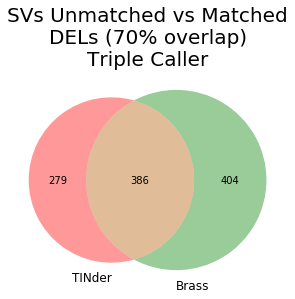

In [693]:
venn2(subsets = (279,404,386), set_labels = ('TINder', 'Brass'))
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller',fontsize=20)
plt.show()

- Scores: 
    - 162/279 (58%) in only TINder and 200/386 (52%) in common have duphold<0.7 in TINder.
    - 162/279 (58%) in only TINder and 303/369 (82%) in common have brass>10 in TINder.
    - 391/404 (97%) in only Triple and 368/386 (95%) in common have at least one caller with score>10.
    - 165/404 (41%) in only Triple and 195/386 (51%) in common have  brass>10 in Triple.

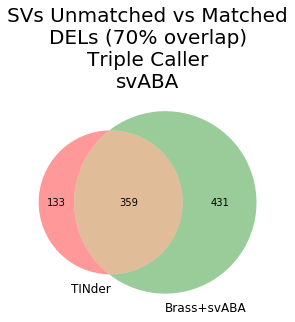

In [104]:
venn2(subsets = (133,431,359), set_labels = ('TINder', 'Brass+svABA'))
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller\nsvABA',fontsize=20)
plt.show()

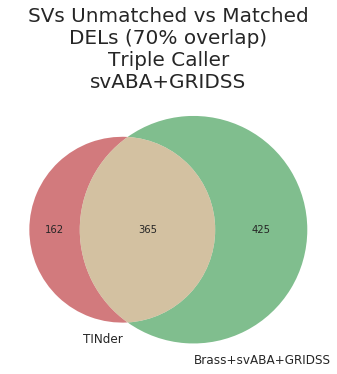

In [252]:
venn2(subsets = (162,425,365), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller\nsvABA+GRIDSS',fontsize=20)
plt.show()

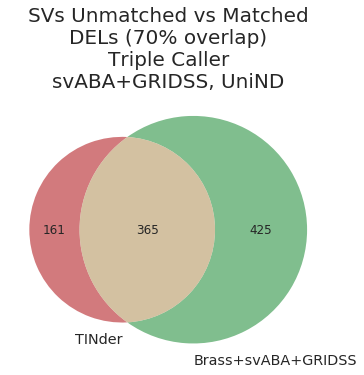

In [65]:
venn2(subsets = (161,425,365), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller\nsvABA+GRIDSS, UniND',fontsize=20)
plt.show()

- Green Area:

In [60]:
triple_full_info_dup_DEL_DETECT_check=triple_full_info_dup_DEL_DETECT[~((triple_full_info_dup_DEL_DETECT['SV chrom']=='X') | (triple_full_info_dup_DEL_DETECT['SV chrom']=='Y'))]

triple_full_info_dup_DEL_DETECT_check['SV start']=triple_full_info_dup_DEL_DETECT_check['SV start'].map(int)
triple_full_info_dup_DEL_DETECT_check['SV chrom']=triple_full_info_dup_DEL_DETECT_check['SV chrom'].map(int)
triple_full_info_dup_DEL_DETECT_check[triple_full_info_dup_DEL_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,0,1,16945804,16947870,1_16945804_1_16947870_DEL_+-,DEL,IID_H158650_T01_01_WG01,8,0,10,1_16945804_16947870_IID_H158650_T01_01_WG01,Non Detected
1,0,1,33476428,33478808,1_33476428_1_33478808_DEL_+-,DEL,IID_H158651_T01_01_WG01,5,0,11,1_33476428_33478808_IID_H158651_T01_01_WG01,Non Detected
2,0,1,114473252,114478844,1_114473252_1_114478844_DEL_+-,DEL,IID_H158629_T01_01_WG01,24,37,20,1_114473252_114478844_IID_H158629_T01_01_WG01,Non Detected
3,2,1,185286970,185343041,1_185286970_1_185343041_DEL_+-,DEL,IID_H158624_T01_01_WG01,59,76,29,1_185286970_185343041_IID_H158624_T01_01_WG01,Non Detected
4,3,1,194451117,194454312,1_194451117_1_194454312_DEL_+-,DEL,IID_H158666_T01_01_WG01,0,27,26,1_194451117_194454312_IID_H158666_T01_01_WG01,Non Detected
5,8,1,213083466,213087717,1_213083466_1_213087717_DEL_+-,DEL,IID_H158650_T01_01_WG01,18,0,20,1_213083466_213087717_IID_H158650_T01_01_WG01,Non Detected
6,964,2,11471383,11485141,2_11471383_2_11485141_DEL_+-,DEL,IID_H158611_T01_01_WG01,49,0,37,2_11471383_11485141_IID_H158611_T01_01_WG01,Non Detected
7,195,2,21263360,22760987,2_21263360_2_22760987_DEL_+-,DEL,IID_H158667_T01_01_WG01,55,71,34,2_21263360_22760987_IID_H158667_T01_01_WG01,Non Detected
8,14,2,89132259,89159123,2_89132259_2_89159123_DEL_+-,DEL,IID_H158609_T01_01_WG01,0,39,18,2_89132259_89159123_IID_H158609_T01_01_WG01,Non Detected
9,6,2,89132265,89159122,2_89132265_2_89159122_DEL_+-,DEL,IID_H158621_T01_01_WG01,34,40,10,2_89132265_89159122_IID_H158621_T01_01_WG01,Non Detected


In [61]:
triple_full_info_dup_DEL_DETECT_check[triple_full_info_dup_DEL_DETECT_check['brass_PS']==0].shape

(97, 11)

- Red Area:

In [62]:
tinder_full_set_DEL_DETECT_check=tinder_full_set_DEL_DETECT[~((tinder_full_set_DEL_DETECT['SV chrom']=='X') | (tinder_full_set_DEL_DETECT['SV chrom']=='Y'))]

tinder_full_set_DEL_DETECT_check['SV start']=tinder_full_set_DEL_DETECT_check['SV start'].map(int)
tinder_full_set_DEL_DETECT_check['SV chrom']=tinder_full_set_DEL_DETECT_check['SV chrom'].map(int)

tinder_full_set_DEL_DETECT_check[tinder_full_set_DEL_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,1380,1,41546673,41549420,2747,DEL,IID_H158630_T01_01_WG01,4.70000013592653e-05,0.000132,22,65,44,1_41546673_1_41549420_IID_H158630_T01_01_WG01,Non Detected
1,155,1,43970462,43973388,2926,DEL,IID_H158608_T01_01_WG01,4.70000013592653e-05,0.000132,62,85,47,1_43970462_1_43973388_IID_H158608_T01_01_WG01,Non Detected
2,123,1,78263026,78266082,3056,DEL,IID_H158607_T01_01_WG01,-1,-1.000000,46,62,36,1_78263026_1_78266082_IID_H158607_T01_01_WG01,Non Detected
3,239,1,115829580,115835298,5718,DEL,IID_H158610_T01_01_WG01,-1,-1.000000,49,75,43,1_115829580_1_115835298_IID_H158610_T01_01_WG01,Non Detected
4,3079,1,181003443,181010274,6831,DEL,IID_H158670_T01_01_WG01,-1,-1.000000,49,79,40,1_181003443_1_181010274_IID_H158670_T01_01_WG01,Non Detected
5,1309,1,216246075,216308819,62744,DEL,IID_H158628_T01_01_WG01,-1,-1.000000,36,58,42,1_216246075_1_216308819_IID_H158628_T01_01_WG01,Non Detected
6,950,1,227043658,227047590,3932,DEL,IID_H158621_T01_01_WG01,9.3e-05,0.000263,27,57,0,1_227043658_1_227047590_IID_H158621_T01_01_WG01,Non Detected
7,168,2,7115048,7119131,4083,DEL,IID_H158608_T01_01_WG01,-1,-1.000000,47,67,40,2_7115048_2_7119131_IID_H158608_T01_01_WG01,Non Detected
8,1411,2,40626969,40633115,6146,DEL,IID_H158630_T01_01_WG01,-1,-1.000000,56,77,33,2_40626969_2_40633115_IID_H158630_T01_01_WG01,Non Detected
9,1047,2,81598198,81691862,93664,DEL,IID_H158623_T01_01_WG01,-1,-1.000000,51,64,30,2_81598198_2_81691862_IID_H158623_T01_01_WG01,Non Detected


In [63]:
tinder_full_set_DEL_DETECT_check[tinder_full_set_DEL_DETECT_check['svaba_AD']<5].shape

(22, 13)

In [64]:
tinder_full_set_DEL_DETECT_check[tinder_full_set_DEL_DETECT_check['brass_PS']<10].shape

(65, 13)

#### - Brass score >10:

In [65]:
print(tinder_full_set_DEL_DETECT.shape)
tinder_full_set_DEL_DETECT.head(1)

(500, 13)


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,Detected


In [66]:
tinder_full_set_DEL_DETECT_score=tinder_full_set_DEL_DETECT[tinder_full_set_DEL_DETECT['brass_PS']>=10]
print(tinder_full_set_DEL_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DEL_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(432, 13)
291 141


In [67]:
print(triple_full_info_dup_DEL_DETECT.shape)
triple_full_info_dup_DEL_DETECT.head(1)

(789, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8,12_110895557_110907163_IID_H158612_T01_01_WG01,Detected


In [68]:
triple_full_info_dup_DEL_DETECT['brass_PS']=triple_full_info_dup_DEL_DETECT['brass_PS'].map(int)
triple_full_info_dup_DEL_DETECT['gridss_VF']=triple_full_info_dup_DEL_DETECT['gridss_VF'].map(int)
triple_full_info_dup_DEL_DETECT['svaba_AD']=triple_full_info_dup_DEL_DETECT['svaba_AD'].map(int)

triple_full_info_dup_DEL_DETECT_score=triple_full_info_dup_DEL_DETECT[(triple_full_info_dup_DEL_DETECT['brass_PS']>=10) | (triple_full_info_dup_DEL_DETECT['gridss_VF']>=10) | (triple_full_info_dup_DEL_DETECT['svaba_AD']>=10)]

print(triple_full_info_dup_DEL_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DEL_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(759, 11)
350 409


In [69]:
triple_full_info_dup_DEL_DETECT['brass_PS']=triple_full_info_dup_DEL_DETECT['brass_PS'].map(int)
#triple_full_info_dup_DEL_DETECT['gridss_VF']=triple_full_info_dup_DEL_DETECT['gridss_VF'].map(int)
#triple_full_info_dup_DEL_DETECT['svaba_AD']=triple_full_info_dup_DEL_DETECT['svaba_AD'].map(int)

triple_full_info_dup_DEL_DETECT_scorebrass=triple_full_info_dup_DEL_DETECT[(triple_full_info_dup_DEL_DETECT['brass_PS']>=10)]

print(triple_full_info_dup_DEL_DETECT_scorebrass.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DEL_DETECT_scorebrass.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(630, 11)
301 329


#### - Sizes:

In [70]:
tinder_full_set_DEL_DETECT.head(1)

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,Detected


In [71]:
tinder_full_set_DEL_DETECT_size=tinder_full_set_DEL_DETECT.copy()
tinder_full_set_DEL_DETECT_size['SV length']=tinder_full_set_DEL_DETECT_size['SV length'].map(int)

triple_full_info_dup_DEL_DETECT_size=triple_full_info_dup_DEL_DETECT.copy()
triple_full_info_dup_DEL_DETECT_size['SV length']=triple_full_info_dup_DEL_DETECT_size['SV end']-triple_full_info_dup_DEL_DETECT_size['SV start']

In [72]:
onlyTINder_DELs=tinder_full_set_DEL_DETECT_size[tinder_full_set_DEL_DETECT_size['Detection']=='Non Detected']
common_DELs=tinder_full_set_DEL_DETECT_size[tinder_full_set_DEL_DETECT_size['Detection']=='Detected']
onlyTRIPLE_DELs=triple_full_info_dup_DEL_DETECT_size[triple_full_info_dup_DEL_DETECT_size['Detection']=='Non Detected']

In [73]:
#TINder
average_size=sum(onlyTINder_DELs['SV length'])/len(onlyTINder_DELs['SV length'])
print('onlyTINDER_DELs Size average\t',average_size)

#BTG
average_size=sum(onlyTRIPLE_DELs['SV length'])/len(onlyTRIPLE_DELs['SV length'])
print('onlyTRIPLE_DELs Size average\t',average_size)

#Common
average_size=sum(common_DELs['SV length'])/len(common_DELs['SV length'])
print('common_DELs Size average\t',average_size)

onlyTINDER_DELs Size average	 2404371.955974843
onlyTRIPLE_DELs Size average	 192725.1976470588
common_DELs Size average	 5082335.076246334


In [74]:
sizes_TINder_df=pd.DataFrame(onlyTINder_DELs,columns=['SV length'])
sizes_TINder_df['Group']='TINder'

sizes_TRIPLE_df=pd.DataFrame(onlyTRIPLE_DELs,columns=['SV length'])
sizes_TRIPLE_df['Group']='TRIPLE'

sizes_COMMON_df=pd.DataFrame(common_DELs,columns=['SV length'])
sizes_COMMON_df['Group']='COMMON'

In [75]:
sizes_TOTAL_df=sizes_TINder_df.copy()
sizes_TOTAL_df=sizes_TOTAL_df.append(sizes_TRIPLE_df,ignore_index=True)
sizes_TOTAL_df=sizes_TOTAL_df.append(sizes_COMMON_df,ignore_index=True)
#sizes_TOTAL_df

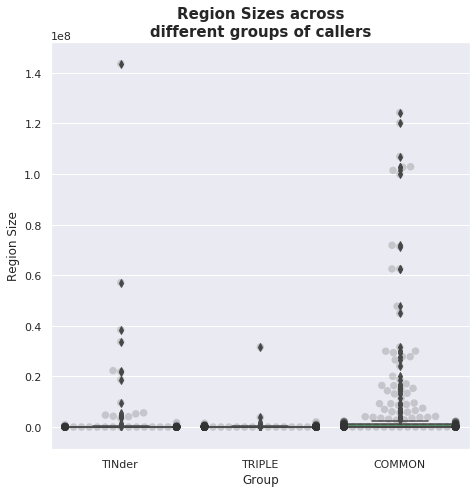

In [76]:
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='SV length', data=sizes_TOTAL_df,order=['TINder','TRIPLE','COMMON'])
ax = sns.swarmplot(x='Group',y='SV length',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['TINder','TRIPLE','COMMON'])
ax.set_title('Region Sizes across\ndifferent groups of callers',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

### - Black regions:

### A- TRIPLE:

In [77]:
triple_full_info_dup_DEL_DETECT.head(1)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8,12_110895557_110907163_IID_H158612_T01_01_WG01,Detected


In [78]:
triple_full_info_dup_DEL_DETECT_2intersectBLACK=triple_full_info_dup_DEL_DETECT[['SV chrom','SV start','SV end','SV type','Sample','keys','Detection','brass_PS','gridss_VF','svaba_AD']]
triple_full_info_dup_DEL_DETECT_2intersectBLACK['brass_PS']=triple_full_info_dup_DEL_DETECT_2intersectBLACK['brass_PS'].map(str)
triple_full_info_dup_DEL_DETECT_2intersectBLACK['gridss_VF']=triple_full_info_dup_DEL_DETECT_2intersectBLACK['gridss_VF'].map(str)
triple_full_info_dup_DEL_DETECT_2intersectBLACK['svaba_AD']=triple_full_info_dup_DEL_DETECT_2intersectBLACK['svaba_AD'].map(str)

triple_full_info_dup_DEL_DETECT_2intersectBLACK.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/sit

,SV chrom,SV start,SV end,SV type,Sample,keys,Detection,brass_PS,gridss_VF,svaba_AD
0,12,110895557,110907163,DEL,IID_H158612_T01_01_WG01,12_110895557_110907163_IID_H158612_T01_01_WG01,Detected,8,0,8
3,13,44716505,45010463,DEL,IID_H158612_T01_01_WG01,13_44716505_45010463_IID_H158612_T01_01_WG01,Detected,4,14,9
12,14,22866085,22918105,DEL,IID_H158612_T01_01_WG01,14_22866085_22918105_IID_H158612_T01_01_WG01,Non Detected,22,31,13
14,14,22892030,22976665,DEL,IID_H158612_T01_01_WG01,14_22892030_22976665_IID_H158612_T01_01_WG01,Non Detected,4,0,8
16,14,22908005,22918118,DEL,IID_H158612_T01_01_WG01,14_22908005_22918118_IID_H158612_T01_01_WG01,Non Detected,24,28,28


In [79]:
black_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist/blacklist_regions.bed',sep='\t',header=None,names=['chromosome','start','end'])
#blue_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist_uk_dan/blacklist_regions_uk_dan.bed',sep='\t',header=None,names=['chromosome','start','end'])

#black_bed=black_bed.append(blue_bed)

key_list=[]
for index,row in black_bed.iterrows():
    key_list.append(str(row['chromosome'])+'_'+str(row['start'])+'_'+str(row['end']))

black_bed['to_index']=key_list 
black_bed_2intersect=black_bed.copy()
black_bed_2intersect.index=black_bed_2intersect['to_index']
black_bed_2intersect.head()

,chromosome,start,end,to_index
to_index,,,,
1_1_840000,1,1,840000,1_1_840000
1_1560001_1605000,1,1560001,1605000,1_1560001_1605000
1_1620001_1680000,1,1620001,1680000,1_1620001_1680000
1_2580001_2700000,1,2580001,2700000,1_2580001_2700000
1_3855001_3990000,1,3855001,3990000,1_3855001_3990000


In [80]:
#1- Black list

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_DEL_DETECT_2intersectBLACK.values.tolist())
list_bed_cytobands=BedTool(black_bed_2intersect.values.tolist())

I_focal_blacklist = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','SV type','Sample','keys','Detection','brass_PS','gridss_VF','svaba_AD','chr_band','start_band', 'end_band','keys2' ])
#I = I[I.chr_band!="X"]
print(triple_full_info_dup_DEL_DETECT_2intersectBLACK.shape)
print(I_focal_blacklist.shape)
I_focal_blacklist.head()

(789, 10)
(721, 14)


,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2
0,14,106315458,106383257,DEL,IID_H158612_T01_01_WG01,14_106315458_106383257_IID_H158612_T01_01_WG01,Non Detected,13,0,12,14,106245001,106920000,14_106245001_106920000
1,14,106329450,106805207,DEL,IID_H158612_T01_01_WG01,14_106329450_106805207_IID_H158612_T01_01_WG01,Non Detected,9,18,0,14,106245001,106920000,14_106245001_106920000
2,14,106330447,106586142,DEL,IID_H158612_T01_01_WG01,14_106330447_106586142_IID_H158612_T01_01_WG01,Non Detected,13,0,12,14,106245001,106920000,14_106245001_106920000
3,14,106881446,107048677,DEL,IID_H158612_T01_01_WG01,14_106881446_107048677_IID_H158612_T01_01_WG01,Detected,11,20,17,14,106980001,107025000,14_106980001_107025000
4,14,106881446,107048677,DEL,IID_H158612_T01_01_WG01,14_106881446_107048677_IID_H158612_T01_01_WG01,Detected,11,20,17,14,106245001,106920000,14_106245001_106920000


In [81]:
I_focal_blacklist['start_seg']=I_focal_blacklist['start_seg'].map(int)
I_focal_blacklist['end_seg']=I_focal_blacklist['end_seg'].map(int)
I_focal_blacklist['start_band']=I_focal_blacklist['start_band'].map(int)
I_focal_blacklist['end_band']=I_focal_blacklist['end_band'].map(int)

In [82]:
## 70% of overlapping between the segment and the band
#I_cytobands_to70=I_cytobands[~( (I_cytobands['start_seg']<I_cytobands['start_band']) & (I_cytobands['end_seg']>I_cytobands['end_band']) )]
I_focal_blacklist_70=[]
percentage=[]

for index,row in I_focal_blacklist.iterrows():
    
    #Cases in which the segment starts before the beginning of the band and finishes after the end (100%)
    if((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
        
    #Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_seg']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue

    #Cases in which the segment starts after the beginning of the band and finisihes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_seg']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
      
    #Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] > row['end_seg'])):
        I_focal_blacklist_70.append(row)
        percentage.append(1)
        continue
                
I_focal_blacklist_70=pd.DataFrame(I_focal_blacklist_70)
I_focal_blacklist_70['Percentage']=percentage
print(I_focal_blacklist_70.shape)
I_focal_blacklist_70.sort_values(by=['chr_seg','start_seg']).reset_index().head()

(721, 15)


,index,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2,Percentage
0,123,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,8,13,11,1,5715001,5745000,1_5715001_5745000,0.000300
1,124,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,8,13,11,1,22290001,22350000,1_22290001_22350000,0.000600
2,125,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,8,13,11,1,24255001,24375000,1_24255001_24375000,0.001201
3,126,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,8,13,11,1,25590001,25665000,1_25590001_25665000,0.000751
4,127,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,8,13,11,1,47385001,47415000,1_47385001_47415000,0.000300


In [83]:
I_focal_blacklist_70_detected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Detected']
I_focal_blacklist_70_nondetected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Non Detected']

- Detected:

In [84]:
print(len(I_focal_blacklist_70_detected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_detected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

96
14_106881446_107048677_IID_H158612_T01_01_WG01 	 0.7308931956395643
2_114164439_114195649_IID_H158612_T01_01_WG01 	 1.0
7_27985458_55777536_IID_H158612_T01_01_WG01 	 0.04398793066139206
7_38295966_38398111_IID_H158612_T01_01_WG01 	 0.1373929218268148
14_106330465_107183409_IID_H158619_T01_01_WG01 	 0.8670346470577202
14_106667581_106967069_IID_H158635_T01_01_WG01 	 0.9430027246500695
6_32408859_32555755_IID_H158635_T01_01_WG01 	 0.7539619867116871
2_32189850_33467214_IID_H158632_T01_01_WG01 	 0.023485083343510543
2_34817859_51168118_IID_H158632_T01_01_WG01 	 0.008256505294503285
2_114164404_114194652_IID_H158625_T01_01_WG01 	 1.0
4_100832115_103940860_IID_H158625_T01_01_WG01 	 0.028950267712533513
15_93499967_97583520_IID_H158618_T01_01_WG01 	 0.011019570457393353
17_52347649_58834798_IID_H158631_T01_01_WG01 	 0.027746549370147037
2_87566154_87770010_IID_H158631_T01_01_WG01 	 1.0
2_114164449_114188428_IID_H158628_T01_01_WG01 	 1.0
2_37410501_39346556_IID_H158627_T01_01_WG01 	 0.0232

In [85]:
scatter_plot.head()

,Sample,Percentage
0,14_106881446_107048677_IID_H158612_T01_01_WG01,0.730893
1,2_114164439_114195649_IID_H158612_T01_01_WG01,1.000000
2,7_27985458_55777536_IID_H158612_T01_01_WG01,0.043988
3,7_38295966_38398111_IID_H158612_T01_01_WG01,0.137393
4,14_106330465_107183409_IID_H158619_T01_01_WG01,0.867035


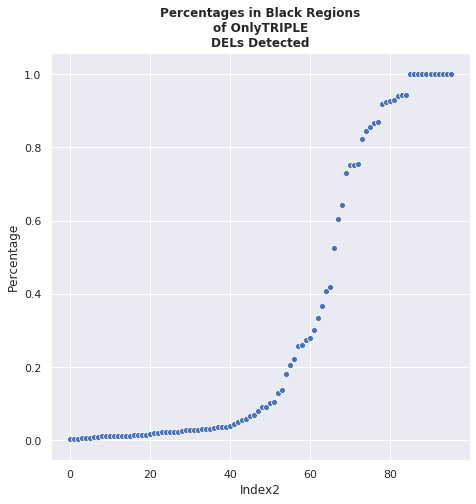

In [86]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTRIPLE\nDELs Detected',weight='bold')
plt.show()

In [87]:
YELLOW_TRIPLE_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(YELLOW_TRIPLE_BLACK))
YELLOW_TRIPLE_BLACK

27


['14_106881446_107048677_IID_H158612_T01_01_WG01',
 '2_114164439_114195649_IID_H158612_T01_01_WG01',
 '14_106330465_107183409_IID_H158619_T01_01_WG01',
 '14_106667581_106967069_IID_H158635_T01_01_WG01',
 '6_32408859_32555755_IID_H158635_T01_01_WG01',
 '2_114164404_114194652_IID_H158625_T01_01_WG01',
 '2_87566154_87770010_IID_H158631_T01_01_WG01',
 '2_114164449_114188428_IID_H158628_T01_01_WG01',
 '22_23029742_23260337_IID_H158617_T01_01_WG01',
 '14_106330472_107113739_IID_H158606_T01_01_WG01',
 '14_106330517_107083255_IID_H158606_T01_01_WG01',
 '14_106357063_106518398_IID_H158606_T01_01_WG01',
 '14_106551444_107034728_IID_H158606_T01_01_WG01',
 '14_106146402_106363822_IID_H158622_T01_01_WG01',
 '2_114164447_114188427_IID_H158622_T01_01_WG01',
 '14_106898522_106967052_IID_H158611_T01_01_WG01',
 '14_106935615_107034733_IID_H158611_T01_01_WG01',
 '14_106285723_106367000_IID_H158634_T01_01_WG01',
 '14_106471231_107083260_IID_H158666_T01_01_WG01',
 '2_114164449_114188424_IID_H158664_T01_01_

In [89]:
joe_file_noBLACK=pd.DataFrame()

for index,row in joe_file.iterrows():
    if row['keys'] not in onlyBTG_BLACK:
        joe_file_noBLACK=joe_file_noBLACK.append(row)

print(joe_file_noBLACK.shape)
joe_file_noBLACK.head()

- Non Detected:

In [91]:
print(len(I_focal_blacklist_70_nondetected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_nondetected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

210
14_106315458_106383257_IID_H158612_T01_01_WG01 	 1.0
14_106329450_106805207_IID_H158612_T01_01_WG01 	 1.0
14_106330447_106586142_IID_H158612_T01_01_WG01 	 1.0
14_107095155_107169928_IID_H158612_T01_01_WG01 	 0.26540328728284274
2_89277893_89291929_IID_H158612_T01_01_WG01 	 1.0
22_22764648_23241800_IID_H158619_T01_01_WG01 	 0.471543659043659
22_23063642_23247179_IID_H158619_T01_01_WG01 	 0.9336428077172451
14_106329462_106452676_IID_H158635_T01_01_WG01 	 1.0
14_106539078_106552287_IID_H158635_T01_01_WG01 	 1.0
14_106790234_107048670_IID_H158635_T01_01_WG01 	 0.8258640437090807
14_107048699_107083255_IID_H158635_T01_01_WG01 	 1.0
2_89132282_89159123_IID_H158635_T01_01_WG01 	 1.0
2_89160435_89533668_IID_H158635_T01_01_WG01 	 1.0
2_90044437_90061006_IID_H158635_T01_01_WG01 	 1.0
7_38309135_38356624_IID_H158635_T01_01_WG01 	 0.01821474446713976
14_106330074_106725203_IID_H158632_T01_01_WG01 	 1.0
14_106541818_106552283_IID_H158632_T01_01_WG01 	 1.0
14_106993780_107048620_IID_H158632_T01

In [92]:
scatter_plot.head()

,Sample,Percentage
0,14_106315458_106383257_IID_H158612_T01_01_WG01,1.000000
1,14_106329450_106805207_IID_H158612_T01_01_WG01,1.000000
2,14_106330447_106586142_IID_H158612_T01_01_WG01,1.000000
3,14_107095155_107169928_IID_H158612_T01_01_WG01,0.265403
4,2_89277893_89291929_IID_H158612_T01_01_WG01,1.000000


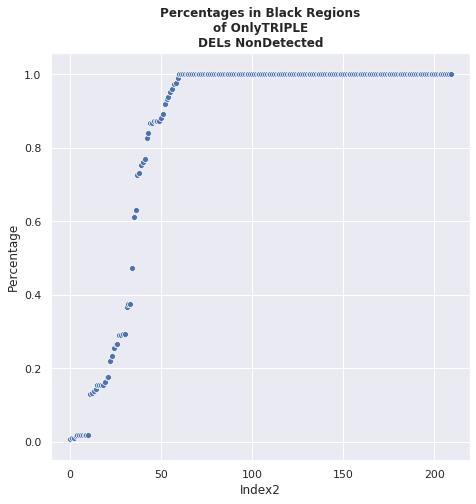

In [93]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTRIPLE\nDELs NonDetected',weight='bold')
plt.show()

In [94]:
GREEN_TRIPLE_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(GREEN_TRIPLE_BLACK))
GREEN_TRIPLE_BLACK

173


['14_106315458_106383257_IID_H158612_T01_01_WG01',
 '14_106329450_106805207_IID_H158612_T01_01_WG01',
 '14_106330447_106586142_IID_H158612_T01_01_WG01',
 '2_89277893_89291929_IID_H158612_T01_01_WG01',
 '22_23063642_23247179_IID_H158619_T01_01_WG01',
 '14_106329462_106452676_IID_H158635_T01_01_WG01',
 '14_106539078_106552287_IID_H158635_T01_01_WG01',
 '14_106790234_107048670_IID_H158635_T01_01_WG01',
 '14_107048699_107083255_IID_H158635_T01_01_WG01',
 '2_89132282_89159123_IID_H158635_T01_01_WG01',
 '2_89160435_89533668_IID_H158635_T01_01_WG01',
 '2_90044437_90061006_IID_H158635_T01_01_WG01',
 '14_106330074_106725203_IID_H158632_T01_01_WG01',
 '14_106541818_106552283_IID_H158632_T01_01_WG01',
 '14_106993780_107048620_IID_H158632_T01_01_WG01',
 '14_107048672_107083256_IID_H158632_T01_01_WG01',
 '2_89132324_89521182_IID_H158632_T01_01_WG01',
 '2_90008158_90109097_IID_H158632_T01_01_WG01',
 '14_106329453_106331762_IID_H158609_T01_01_WG01',
 '14_106330468_106382688_IID_H158609_T01_01_WG01',


In [95]:
TRIPLE_noBLACK_DELs=pd.DataFrame()
triple_keys=YELLOW_TRIPLE_BLACK+GREEN_TRIPLE_BLACK

for index,row in triple_full_info_dup_DEL_DETECT.iterrows():
    if (row['keys'] not in triple_keys):
        TRIPLE_noBLACK_DELs=TRIPLE_noBLACK_DELs.append(row)

print(TRIPLE_noBLACK_DELs.shape)
TRIPLE_noBLACK_DELs.head()

(589, 11)


,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8.0,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8.0
3,Detected,13_44716505_13_45010463_DEL_+-,13,45010463.0,44716505.0,DEL,IID_H158612_T01_01_WG01,4.0,14.0,13_44716505_45010463_IID_H158612_T01_01_WG01,9.0
12,Non Detected,14_22866085_14_22918105_DEL_+-,14,22918105.0,22866085.0,DEL,IID_H158612_T01_01_WG01,22.0,31.0,14_22866085_22918105_IID_H158612_T01_01_WG01,13.0
14,Non Detected,14_22892030_14_22976665_DEL_+-,14,22976665.0,22892030.0,DEL,IID_H158612_T01_01_WG01,4.0,0.0,14_22892030_22976665_IID_H158612_T01_01_WG01,8.0
16,Non Detected,14_22908005_14_22918118_DEL_+-,14,22918118.0,22908005.0,DEL,IID_H158612_T01_01_WG01,24.0,28.0,14_22908005_22918118_IID_H158612_T01_01_WG01,28.0


In [96]:
TRIPLE_noBLACK_DELs.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/joe_files_svs/triple_full_info_dup_DEL_DETECT_noBLACK.tsv',sep='\t')

In [392]:
#For plotting chr distribution
TRIPLE_noBLACK_DELs.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/chr_distrib/triple_full_info_dup_DEL_DETECT_noBLACK.tsv',sep='\t')

### B- TINDER:

In [99]:
tinder_full_set_DEL_DETECT.head(1)

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,Detected


In [100]:
tinder_full_set_DEL_DETECT_2intersectBLACK=tinder_full_set_DEL_DETECT[['SV chrom','SV start','SV start2','SV type','Sample','keys','Detection','brass_PS','gridss_VF','svaba_AD']]
tinder_full_set_DEL_DETECT_2intersectBLACK['brass_PS']=tinder_full_set_DEL_DETECT_2intersectBLACK['brass_PS'].map(str)
tinder_full_set_DEL_DETECT_2intersectBLACK['gridss_VF']=tinder_full_set_DEL_DETECT_2intersectBLACK['gridss_VF'].map(str)
tinder_full_set_DEL_DETECT_2intersectBLACK['svaba_AD']=tinder_full_set_DEL_DETECT_2intersectBLACK['svaba_AD'].map(str)

tinder_full_set_DEL_DETECT_2intersectBLACK.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/sit

,SV chrom,SV start,SV start2,SV type,Sample,keys,Detection,brass_PS,gridss_VF,svaba_AD
7,14,22866689,23004506,DEL,IID_H158604_T01_01_WG01,14_22866689_14_23004506_IID_H158604_T01_01_WG01,Detected,47,66,38
8,14,49067540,49429620,DEL,IID_H158604_T01_01_WG01,14_49067540_14_49429620_IID_H158604_T01_01_WG01,Non Detected,61,78,33
10,14,102562994,106373075,DEL,IID_H158604_T01_01_WG01,14_102562994_14_106373075_IID_H158604_T01_01_WG01,Detected,36,62,32
42,14,22892030,23002450,DEL,IID_H158605_T01_01_WG01,14_22892030_14_23002450_IID_H158605_T01_01_WG01,Detected,25,33,25
62,5,60201995,60294535,DEL,IID_H158605_T01_01_WG01,5_60201995_5_60294535_IID_H158605_T01_01_WG01,Non Detected,47,65,34


In [101]:
black_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist/blacklist_regions.bed',sep='\t',header=None,names=['chromosome','start','end'])
#blue_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist_uk_dan/blacklist_regions_uk_dan.bed',sep='\t',header=None,names=['chromosome','start','end'])

#black_bed=black_bed.append(blue_bed)

key_list=[]
for index,row in black_bed.iterrows():
    key_list.append(str(row['chromosome'])+'_'+str(row['start'])+'_'+str(row['end']))

black_bed['to_index']=key_list 
black_bed_2intersect=black_bed.copy()
black_bed_2intersect.index=black_bed_2intersect['to_index']
black_bed_2intersect.head()

,chromosome,start,end,to_index
to_index,,,,
1_1_840000,1,1,840000,1_1_840000
1_1560001_1605000,1,1560001,1605000,1_1560001_1605000
1_1620001_1680000,1,1620001,1680000,1_1620001_1680000
1_2580001_2700000,1,2580001,2700000,1_2580001_2700000
1_3855001_3990000,1,3855001,3990000,1_3855001_3990000


In [102]:
#1- Black list

#list2intersection

list_patient_contig=BedTool(tinder_full_set_DEL_DETECT_2intersectBLACK.values.tolist())
list_bed_cytobands=BedTool(black_bed_2intersect.values.tolist())

I_focal_blacklist = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','SV type','Sample','keys','Detection','brass_PS','gridss_VF','svaba_AD','chr_band','start_band', 'end_band','keys2' ])
#I = I[I.chr_band!="X"]
print(tinder_full_set_DEL_DETECT_2intersectBLACK.shape)
print(I_focal_blacklist.shape)
I_focal_blacklist.head()

(500, 10)
(576, 14)


,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2
0,14,102562994,106373075,DEL,IID_H158604_T01_01_WG01,14_102562994_14_106373075_IID_H158604_T01_01_WG01,Detected,36,62,32,14,106050001,106125000,14_106050001_106125000
1,14,102562994,106373075,DEL,IID_H158604_T01_01_WG01,14_102562994_14_106373075_IID_H158604_T01_01_WG01,Detected,36,62,32,14,106170001,106230000,14_106170001_106230000
2,14,102562994,106373075,DEL,IID_H158604_T01_01_WG01,14_102562994_14_106373075_IID_H158604_T01_01_WG01,Detected,36,62,32,14,106245001,106920000,14_106245001_106920000
3,9,15424528,22380856,DEL,IID_H158605_T01_01_WG01,9_15424528_9_22380856_IID_H158605_T01_01_WG01,Detected,39,59,33,9,21180001,21210000,9_21180001_21210000
4,14,106330472,107113739,DEL,IID_H158606_T01_01_WG01,14_106330472_14_107113739_IID_H158606_T01_01_WG01,Detected,13,15,14,14,106980001,107025000,14_106980001_107025000


In [103]:
I_focal_blacklist['start_seg']=I_focal_blacklist['start_seg'].map(int)
I_focal_blacklist['end_seg']=I_focal_blacklist['end_seg'].map(int)
I_focal_blacklist['start_band']=I_focal_blacklist['start_band'].map(int)
I_focal_blacklist['end_band']=I_focal_blacklist['end_band'].map(int)

In [104]:
## 70% of overlapping between the segment and the band
#I_cytobands_to70=I_cytobands[~( (I_cytobands['start_seg']<I_cytobands['start_band']) & (I_cytobands['end_seg']>I_cytobands['end_band']) )]
I_focal_blacklist_70=[]
percentage=[]

for index,row in I_focal_blacklist.iterrows():
    
    #Cases in which the segment starts before the beginning of the band and finishes after the end (100%)
    if((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
        
    #Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_seg']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue

    #Cases in which the segment starts after the beginning of the band and finisihes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_seg']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
      
    #Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] > row['end_seg'])):
        I_focal_blacklist_70.append(row)
        percentage.append(1)
        continue
                
I_focal_blacklist_70=pd.DataFrame(I_focal_blacklist_70)
I_focal_blacklist_70['Percentage']=percentage
print(I_focal_blacklist_70.shape)
I_focal_blacklist_70.sort_values(by=['chr_seg','start_seg']).reset_index().head()

(576, 15)


,index,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2,Percentage
0,49,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_1_103627577_IID_H158613_T01_01_WG01,Detected,8,13,11,1,5715001,5745000,1_5715001_5745000,0.000300
1,50,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_1_103627577_IID_H158613_T01_01_WG01,Detected,8,13,11,1,22290001,22350000,1_22290001_22350000,0.000600
2,51,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_1_103627577_IID_H158613_T01_01_WG01,Detected,8,13,11,1,24255001,24375000,1_24255001_24375000,0.001201
3,52,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_1_103627577_IID_H158613_T01_01_WG01,Detected,8,13,11,1,25590001,25665000,1_25590001_25665000,0.000751
4,53,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_1_103627577_IID_H158613_T01_01_WG01,Detected,8,13,11,1,47385001,47415000,1_47385001_47415000,0.000300


In [105]:
I_focal_blacklist_70_detected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Detected']
I_focal_blacklist_70_nondetected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Non Detected']

- Detected:

In [106]:
print(len(I_focal_blacklist_70_detected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_detected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

89
14_102562994_14_106373075_IID_H158604_T01_01_WG01 	 0.06904630111538311
9_15424528_9_22380856_IID_H158605_T01_01_WG01 	 0.004312476352466416
14_106330472_14_107113739_IID_H158606_T01_01_WG01 	 0.9425444963211779
14_106551444_14_107034728_IID_H158606_T01_01_WG01 	 0.9177916090745815
22_23029809_22_23241805_IID_H158607_T01_01_WG01 	 0.9198239589426216
14_106898522_14_106967052_IID_H158611_T01_01_WG01 	 0.751160075879177
14_106935615_14_107034733_IID_H158611_T01_01_WG01 	 0.7504590488105087
14_106881446_14_107048677_IID_H158612_T01_01_WG01 	 0.7308931956395643
2_114164439_2_114195649_IID_H158612_T01_01_WG01 	 1.0
7_27985458_7_55777536_IID_H158612_T01_01_WG01 	 0.04398793066139206
1_3708400_1_103627577_IID_H158613_T01_01_WG01 	 0.028522833009323123
1_3723187_1_106598971_IID_H158613_T01_01_WG01 	 0.031931450456795546
1_5354510_1_77169659_IID_H158613_T01_01_WG01 	 0.0319567950767602
1_77599586_1_104102892_IID_H158613_T01_01_WG01 	 0.023770430753053975
1_78110507_1_89526507_IID_H158613_T01

In [107]:
scatter_plot.head()

,Sample,Percentage
0,14_102562994_14_106373075_IID_H158604_T01_01_WG01,0.069046
1,9_15424528_9_22380856_IID_H158605_T01_01_WG01,0.004312
2,14_106330472_14_107113739_IID_H158606_T01_01_WG01,0.942544
3,14_106551444_14_107034728_IID_H158606_T01_01_WG01,0.917792
4,22_23029809_22_23241805_IID_H158607_T01_01_WG01,0.919824


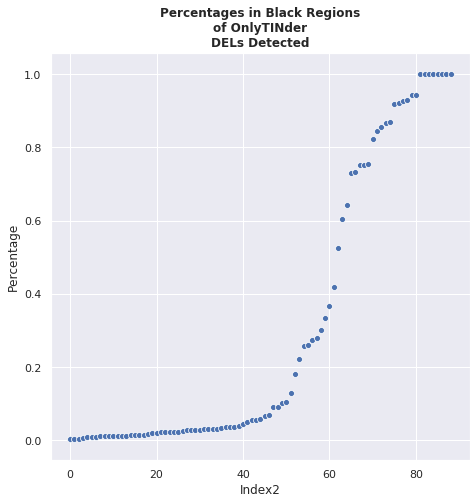

In [108]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTINder\nDELs Detected',weight='bold')
plt.show()

In [109]:
YELLOW_TINDER_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(YELLOW_TINDER_BLACK))
YELLOW_TINDER_BLACK

24


['14_106330472_14_107113739_IID_H158606_T01_01_WG01',
 '14_106551444_14_107034728_IID_H158606_T01_01_WG01',
 '22_23029809_22_23241805_IID_H158607_T01_01_WG01',
 '14_106898522_14_106967052_IID_H158611_T01_01_WG01',
 '14_106935615_14_107034733_IID_H158611_T01_01_WG01',
 '14_106881446_14_107048677_IID_H158612_T01_01_WG01',
 '2_114164439_2_114195649_IID_H158612_T01_01_WG01',
 '22_23029742_22_23260337_IID_H158617_T01_01_WG01',
 '14_106330465_14_107183409_IID_H158619_T01_01_WG01',
 '14_106438674_14_107083256_IID_H158620_T01_01_WG01',
 '14_106146402_14_106363822_IID_H158622_T01_01_WG01',
 '2_114164447_2_114188427_IID_H158622_T01_01_WG01',
 '2_114164449_2_114188428_IID_H158628_T01_01_WG01',
 '2_87566154_2_87770010_IID_H158631_T01_01_WG01',
 '2_114164446_2_114189320_IID_H158633_T01_01_WG01',
 '14_106285723_14_106367000_IID_H158634_T01_01_WG01',
 '14_106667581_14_106967069_IID_H158635_T01_01_WG01',
 '6_32408859_6_32555755_IID_H158635_T01_01_WG01',
 '2_114164449_2_114195638_IID_H158639_T01_01_WG0

- Non Detected:

In [110]:
print(len(I_focal_blacklist_70_nondetected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_nondetected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

20
5_121632431_5_160041023_IID_H158611_T01_01_WG01 	 0.007029468823017516
9_19742146_9_23212077_IID_H158616_T01_01_WG01 	 0.008645416868519863
5_88111492_5_92828026_IID_H158617_T01_01_WG01 	 0.006360390914175536
5_126661475_5_148515164_IID_H158618_T01_01_WG01 	 0.00823636686693949
6_13191446_6_156731674_IID_H158618_T01_01_WG01 	 0.043053951398210125
5_57315694_5_57319121_IID_H158624_T01_01_WG01 	 1.0
2_114164366_2_114194652_IID_H158625_T01_01_WG01 	 1.0
17_34596076_17_34812172_IID_H158627_T01_01_WG01 	 1.0
9_20107558_9_25319423_IID_H158629_T01_01_WG01 	 0.011511810071826495
16_53545261_16_75842350_IID_H158630_T01_01_WG01 	 0.03901827722892437
6_52860655_6_109913312_IID_H158633_T01_01_WG01 	 0.09202000881396286
22_22517071_22_22653067_IID_H158634_T01_01_WG01 	 0.3534368657901703
8_83255531_8_101930911_IID_H158636_T01_01_WG01 	 0.016867019573363434
12_8779960_12_12871635_IID_H158638_T01_01_WG01 	 0.08065034490764784
10_27601261_10_37135413_IID_H158639_T01_01_WG01 	 0.015600338656232877
2

In [111]:
scatter_plot.head()

,Sample,Percentage
0,5_121632431_5_160041023_IID_H158611_T01_01_WG01,0.007029
1,9_19742146_9_23212077_IID_H158616_T01_01_WG01,0.008645
2,5_88111492_5_92828026_IID_H158617_T01_01_WG01,0.006360
3,5_126661475_5_148515164_IID_H158618_T01_01_WG01,0.008236
4,6_13191446_6_156731674_IID_H158618_T01_01_WG01,0.043054


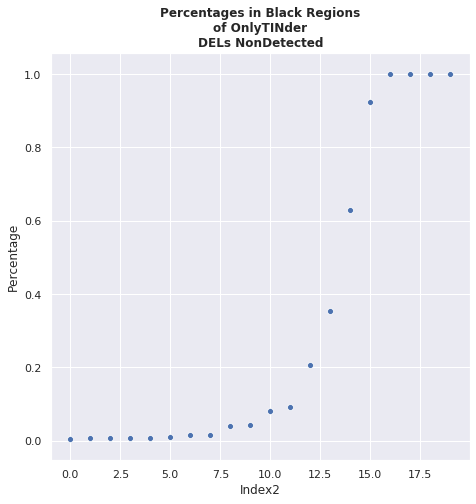

In [112]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTINder\nDELs NonDetected',weight='bold')
plt.show()

In [113]:
RED_TINDER_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(RED_TINDER_BLACK))
RED_TINDER_BLACK

5


['5_57315694_5_57319121_IID_H158624_T01_01_WG01',
 '2_114164366_2_114194652_IID_H158625_T01_01_WG01',
 '17_34596076_17_34812172_IID_H158627_T01_01_WG01',
 '2_132134342_2_132146156_IID_H158641_T01_01_WG01',
 '14_106330050_14_107131038_IID_H158669_T01_01_WG01']

In [114]:
TINDER_noBLACK_DELs=pd.DataFrame()
tinder_keys=YELLOW_TINDER_BLACK+RED_TINDER_BLACK

for index,row in tinder_full_set_DEL_DETECT.iterrows():
    if row['keys'] not in tinder_keys:
        TINDER_noBLACK_DELs=TINDER_noBLACK_DELs.append(row)

print(TINDER_noBLACK_DELs.shape)
TINDER_noBLACK_DELs.head()

(471, 13)


,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
7,Detected,0.005078999791294336,0.005808,14,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,66.0,14_22866689_14_23004506_IID_H158604_T01_01_WG01,38.0
8,Non Detected,-1,-1.000000,14,362080.0,49067540.0,49429620.0,DEL,IID_H158604_T01_01_WG01,61.0,78.0,14_49067540_14_49429620_IID_H158604_T01_01_WG01,33.0
10,Detected,-1,-1.000000,14,3810081.0,102562994.0,106373075.0,DEL,IID_H158604_T01_01_WG01,36.0,62.0,14_102562994_14_106373075_IID_H158604_T01_01_WG01,32.0
42,Detected,0.005078999791294336,0.005808,14,110420.0,22892030.0,23002450.0,DEL,IID_H158605_T01_01_WG01,25.0,33.0,14_22892030_14_23002450_IID_H158605_T01_01_WG01,25.0
62,Non Detected,4.70000013592653e-05,0.000561,5,92540.0,60201995.0,60294535.0,DEL,IID_H158605_T01_01_WG01,47.0,65.0,5_60201995_5_60294535_IID_H158605_T01_01_WG01,34.0


In [289]:
TINDER_noBLACK_DELs.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DEL_DETECT_noBLACK.tsv',sep='\t')

In [393]:
#For the chr distribution plot
TINDER_noBLACK_DELs.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/chr_distrib/tinder_full_set_DEL_DETECT_noBLACK.tsv',sep='\t')

In [348]:
TINDER_noBLACK_DELs[TINDER_noBLACK_DELs['Sample']=='IID_H158626_T01_01_WG01']

,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD,Callers
1234,Detected,-1,-1.0,10,126483.0,128122279.0,128248762.0,DEL,IID_H158626_T01_01_WG01,34.0,58.0,10_128122279_10_128248762_IID_H158626_T01_01_WG01,41.0,"Brass,GRIDSS,SvABA"
1236,Non Detected,-1,-1.0,14,9910.0,39781117.0,39791027.0,DEL,IID_H158626_T01_01_WG01,25.0,0.0,14_39781117_14_39791027_IID_H158626_T01_01_WG01,21.0,"Brass,SvABA"
1241,Detected,-1,-1.0,17,12060.0,29500705.0,29512765.0,DEL,IID_H158626_T01_01_WG01,37.0,51.0,17_29500705_17_29512765_IID_H158626_T01_01_WG01,34.0,"Brass,GRIDSS,SvABA"
1242,Detected,-1,-1.0,17,65896.0,29659042.0,29724938.0,DEL,IID_H158626_T01_01_WG01,38.0,55.0,17_29659042_17_29724938_IID_H158626_T01_01_WG01,36.0,"Brass,GRIDSS,SvABA"
1244,Detected,-1,-1.0,20,18676.0,3369236.0,3387912.0,DEL,IID_H158626_T01_01_WG01,32.0,67.0,20_3369236_20_3387912_IID_H158626_T01_01_WG01,45.0,"Brass,GRIDSS,SvABA"
1251,Detected,-1,-1.0,6,20048630.0,93194379.0,113243009.0,DEL,IID_H158626_T01_01_WG01,35.0,41.0,6_93194379_6_113243009_IID_H158626_T01_01_WG01,19.0,"Brass,GRIDSS,SvABA"


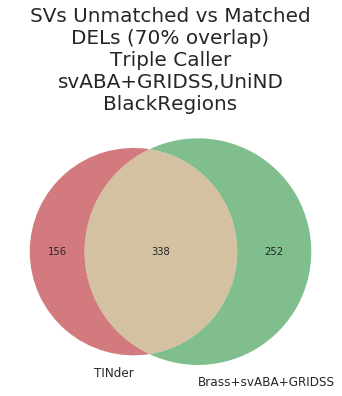

In [778]:
venn2(subsets = (156,252,338), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND\nBlackRegions',fontsize=20)
plt.show()

# - Caller Combinations:

In [118]:
tinder_full_set_DEL_DETECT
triple_full_info_dup_DEL_DETECT

In [119]:
print(tinder_full_set_DEL_DETECT.shape)
tinder_full_set_DEL_DETECT.head(1)

(500, 13)


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,Detected


In [120]:
print(triple_full_info_dup_DEL_DETECT.shape)
triple_full_info_dup_DEL_DETECT.head(1)

(789, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8,12_110895557_110907163_IID_H158612_T01_01_WG01,Detected


In [121]:
#Function to apply calls from SV-detectors
def label_caller (row):
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])>0)):
        return 'Brass,GRIDSS,SvABA'
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])==0)):
        return 'Brass,GRIDSS'
    if ((int(row['brass_PS'])>0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])==0)):
        return 'Brass,SvABA'
    if ((int(row['brass_PS'])==0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])>0)):
        return 'GRIDSS,SvABA'

In [122]:
tinder_full_set_DEL_DETECT['Callers']=tinder_full_set_DEL_DETECT.apply(lambda row: label_caller(row), axis=1)
triple_full_info_dup_DEL_DETECT['Callers']=triple_full_info_dup_DEL_DETECT.apply(lambda row: label_caller(row), axis=1)

- TINder :

In [123]:
countsTIN=tinder_full_set_DEL_DETECT.groupby(['Detection','Callers']).size()
countsTIN=pd.DataFrame(countsTIN).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTIN.columns = ['SV Events TINder']
countsTIN

SV Events TINder
Detection    Callers                             
Non Detected Brass,SvABA                       28
             Brass,GRIDSS,SvABA               116
             Brass,GRIDSS                      15
Detected     Brass,SvABA                       19
             Brass,GRIDSS,SvABA               315
             Brass,GRIDSS                       7

- TRIPLE:

In [124]:
countsTRI=triple_full_info_dup_DEL_DETECT.groupby(['Detection','Callers']).size()
countsTRI=pd.DataFrame(countsTRI).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTRI.columns = ['SV Events TRIPLE']
countsTRI

SV Events TRIPLE
Detection    Callers                             
Non Detected GRIDSS,SvABA                      65
             Brass,SvABA                       84
             Brass,GRIDSS,SvABA               248
             Brass,GRIDSS                      28
Detected     GRIDSS,SvABA                      33
             Brass,SvABA                       15
             Brass,GRIDSS,SvABA               312
             Brass,GRIDSS                       4

In [125]:
comb=pd.concat([countsTIN, countsTRI], axis=1, sort=False)
comb['SV Events TINder']=countsTIN['SV Events TINder'].map(str)
comb['SV Events TRIPLE']=countsTRI['SV Events TRIPLE'].map(str)
comb

SV Events TINder SV Events TRIPLE
Detection    Callers                                             
Detected     Brass,GRIDSS                      7                4
             Brass,GRIDSS,SvABA              315              312
             Brass,SvABA                      19               15
             GRIDSS,SvABA                    NaN               33
Non Detected Brass,GRIDSS                     15               28
             Brass,GRIDSS,SvABA              116              248
             Brass,SvABA                      28               84
             GRIDSS,SvABA                    NaN               65

In [126]:
#Detected
comb_plot1=comb.loc['Detected']
comb_plot1['Detection']='Detected'
comb_plot1_TIN=comb_plot1[['SV Events TINder','Detection']]
comb_plot1_TIN.columns=['SV Events','Detection']
comb_plot1_TIN['Method']='TINder'
comb_plot1_TRI=comb_plot1[['SV Events TRIPLE','Detection']]
comb_plot1_TRI.columns=['SV Events','Detection']
comb_plot1_TRI['Method']='TRIPLE'
comb_plot1_plot=pd.concat([comb_plot1_TIN, comb_plot1_TRI], axis=0, sort=False)
comb_plot1_plot=comb_plot1_plot.fillna(0)
comb_plot1_plot['Callers']=comb_plot1_plot.index
comb_plot1_plot['SV Events']=comb_plot1_plot['SV Events'].map(int)

#Non Detected
comb_plot2=comb.loc['Non Detected']
comb_plot2['Detection']='Non Detected'
comb_plot2_TIN=comb_plot2[['SV Events TINder','Detection']]
comb_plot2_TIN.columns=['SV Events','Detection']
comb_plot2_TIN['Method']='TINder'
comb_plot2_TRI=comb_plot2[['SV Events TRIPLE','Detection']]
comb_plot2_TRI.columns=['SV Events','Detection']
comb_plot2_TRI['Method']='TRIPLE'
comb_plot2_plot=pd.concat([comb_plot2_TIN, comb_plot2_TRI], axis=0, sort=False)
comb_plot2_plot=comb_plot2_plot.fillna(0)
comb_plot2_plot['Callers']=comb_plot2_plot.index
comb_plot2_plot['SV Events']=comb_plot2_plot['SV Events'].map(int)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


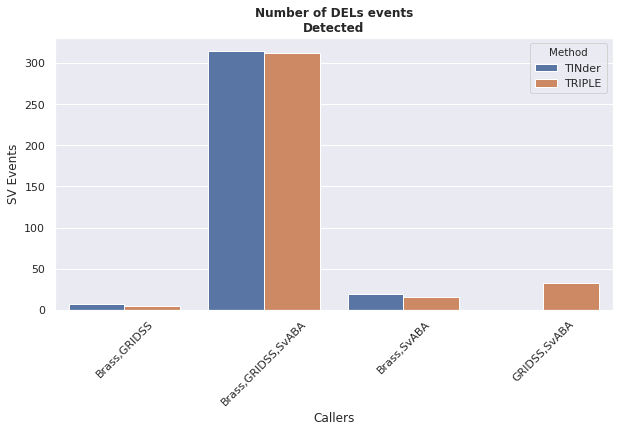

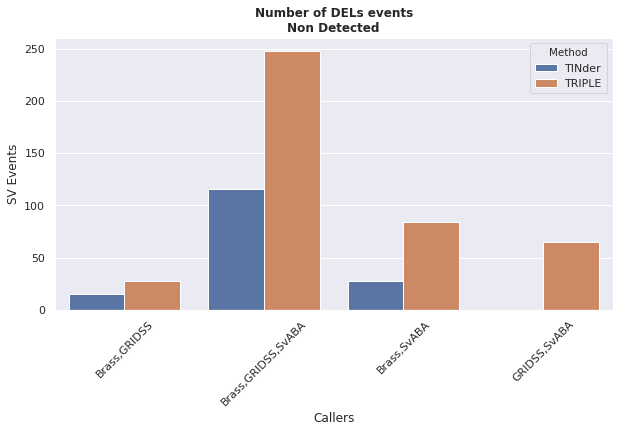

In [127]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot1_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DELs events\nDetected',weight='bold')
plt.xticks(rotation=45)
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot2_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DELs events\nNon Detected',weight='bold')
plt.xticks(rotation=45)
plt.show()

# - Caller Combinations: blacklist

In [128]:
TRIPLE_noBLACK_DELs
TINDER_noBLACK_DELs

,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
7,Detected,0.005078999791294336,0.005808,14,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,66.0,14_22866689_14_23004506_IID_H158604_T01_01_WG01,38.0
8,Non Detected,-1,-1.000000,14,362080.0,49067540.0,49429620.0,DEL,IID_H158604_T01_01_WG01,61.0,78.0,14_49067540_14_49429620_IID_H158604_T01_01_WG01,33.0
10,Detected,-1,-1.000000,14,3810081.0,102562994.0,106373075.0,DEL,IID_H158604_T01_01_WG01,36.0,62.0,14_102562994_14_106373075_IID_H158604_T01_01_WG01,32.0
42,Detected,0.005078999791294336,0.005808,14,110420.0,22892030.0,23002450.0,DEL,IID_H158605_T01_01_WG01,25.0,33.0,14_22892030_14_23002450_IID_H158605_T01_01_WG01,25.0
62,Non Detected,4.70000013592653e-05,0.000561,5,92540.0,60201995.0,60294535.0,DEL,IID_H158605_T01_01_WG01,47.0,65.0,5_60201995_5_60294535_IID_H158605_T01_01_WG01,34.0
64,Non Detected,-1,-1.000000,7,111634.0,110382221.0,110493855.0,DEL,IID_H158605_T01_01_WG01,33.0,48.0,7_110382221_7_110493855_IID_H158605_T01_01_WG01,30.0
68,Detected,-1,-1.000000,9,6956328.0,15424528.0,22380856.0,DEL,IID_H158605_T01_01_WG01,39.0,59.0,9_15424528_9_22380856_IID_H158605_T01_01_WG01,33.0
69,Detected,-1,-1.000000,9,33843.0,21975806.0,22009649.0,DEL,IID_H158605_T01_01_WG01,37.0,48.0,9_21975806_9_22009649_IID_H158605_T01_01_WG01,26.0
74,Detected,-1,-1.000000,10,26766.0,28821260.0,28848026.0,DEL,IID_H158606_T01_01_WG01,48.0,61.0,10_28821260_10_28848026_IID_H158606_T01_01_WG01,24.0
76,Non Detected,-1,-1.000000,11,5049.0,68782074.0,68787123.0,DEL,IID_H158606_T01_01_WG01,57.0,73.0,11_68782074_11_68787123_IID_H158606_T01_01_WG01,55.0


In [129]:
print(TINDER_noBLACK_DELs.shape)
TINDER_noBLACK_DELs.head(1)

(471, 13)


,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
7,Detected,0.005078999791294336,0.005808,14,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,66.0,14_22866689_14_23004506_IID_H158604_T01_01_WG01,38.0


In [130]:
print(TRIPLE_noBLACK_DELs.shape)
TRIPLE_noBLACK_DELs.head(1)

(589, 11)


,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8.0,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8.0


In [131]:
#Function to apply calls from SV-detectors
def label_caller (row):
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])>0)):
        return 'Brass,GRIDSS,SvABA'
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])==0)):
        return 'Brass,GRIDSS'
    if ((int(row['brass_PS'])>0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])==0)):
        return 'Brass,SvABA'
    if ((int(row['brass_PS'])==0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])>0)):
        return 'GRIDSS,SvABA'

In [132]:
TINDER_noBLACK_DELs['Callers']=TINDER_noBLACK_DELs.apply(lambda row: label_caller(row), axis=1)
TRIPLE_noBLACK_DELs['Callers']=TRIPLE_noBLACK_DELs.apply(lambda row: label_caller(row), axis=1)

- TINder :

In [133]:
countsTIN=TINDER_noBLACK_DELs.groupby(['Detection','Callers']).size()
countsTIN=pd.DataFrame(countsTIN).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTIN.columns = ['SV Events TINder']
countsTIN

SV Events TINder
Detection    Callers                             
Non Detected Brass,SvABA                       24
             Brass,GRIDSS,SvABA               115
             Brass,GRIDSS                      15
Detected     Brass,SvABA                       15
             Brass,GRIDSS,SvABA               296
             Brass,GRIDSS                       6

- TRIPLE:

In [134]:
countsTRI=TRIPLE_noBLACK_DELs.groupby(['Detection','Callers']).size()
countsTRI=pd.DataFrame(countsTRI).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTRI.columns = ['SV Events TRIPLE']
countsTRI

SV Events TRIPLE
Detection    Callers                             
Non Detected GRIDSS,SvABA                      21
             Brass,SvABA                       54
             Brass,GRIDSS,SvABA               170
             Brass,GRIDSS                       7
Detected     GRIDSS,SvABA                      30
             Brass,SvABA                       11
             Brass,GRIDSS,SvABA               292
             Brass,GRIDSS                       4

In [135]:
comb=pd.concat([countsTIN, countsTRI], axis=1, sort=False)
comb['SV Events TINder']=countsTIN['SV Events TINder'].map(str)
comb['SV Events TRIPLE']=countsTRI['SV Events TRIPLE'].map(str)
comb

SV Events TINder SV Events TRIPLE
Detection    Callers                                             
Detected     Brass,GRIDSS                      6                4
             Brass,GRIDSS,SvABA              296              292
             Brass,SvABA                      15               11
             GRIDSS,SvABA                    NaN               30
Non Detected Brass,GRIDSS                     15                7
             Brass,GRIDSS,SvABA              115              170
             Brass,SvABA                      24               54
             GRIDSS,SvABA                    NaN               21

In [136]:
#Detected
comb_plot1=comb.loc['Detected']
comb_plot1['Detection']='Detected'
comb_plot1_TIN=comb_plot1[['SV Events TINder','Detection']]
comb_plot1_TIN.columns=['SV Events','Detection']
comb_plot1_TIN['Method']='TINder'
comb_plot1_TRI=comb_plot1[['SV Events TRIPLE','Detection']]
comb_plot1_TRI.columns=['SV Events','Detection']
comb_plot1_TRI['Method']='TRIPLE'
comb_plot1_plot=pd.concat([comb_plot1_TIN, comb_plot1_TRI], axis=0, sort=False)
comb_plot1_plot=comb_plot1_plot.fillna(0)
comb_plot1_plot['Callers']=comb_plot1_plot.index
comb_plot1_plot['SV Events']=comb_plot1_plot['SV Events'].map(int)

#Non Detected
comb_plot2=comb.loc['Non Detected']
comb_plot2['Detection']='Non Detected'
comb_plot2_TIN=comb_plot2[['SV Events TINder','Detection']]
comb_plot2_TIN.columns=['SV Events','Detection']
comb_plot2_TIN['Method']='TINder'
comb_plot2_TRI=comb_plot2[['SV Events TRIPLE','Detection']]
comb_plot2_TRI.columns=['SV Events','Detection']
comb_plot2_TRI['Method']='TRIPLE'
comb_plot2_plot=pd.concat([comb_plot2_TIN, comb_plot2_TRI], axis=0, sort=False)
comb_plot2_plot=comb_plot2_plot.fillna(0)
comb_plot2_plot['Callers']=comb_plot2_plot.index
comb_plot2_plot['SV Events']=comb_plot2_plot['SV Events'].map(int)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


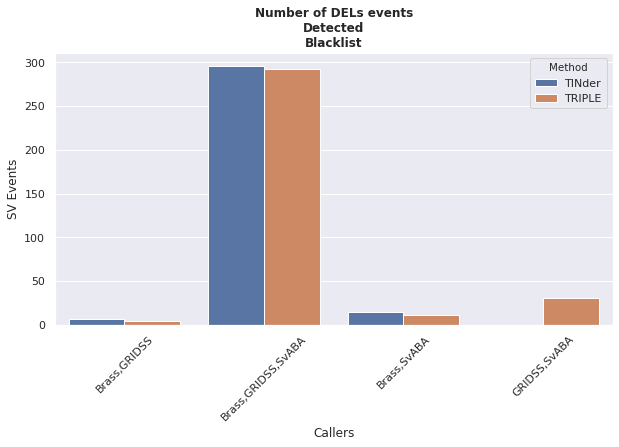

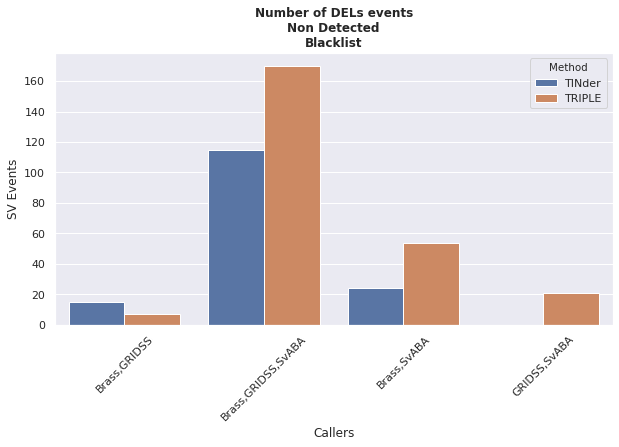

In [137]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot1_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DELs events\nDetected\nBlacklist',weight='bold')
plt.xticks(rotation=45)
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot2_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DELs events\nNon Detected\nBlacklist',weight='bold')
plt.xticks(rotation=45)
plt.show()

# B) Intersection Duplication:

In [138]:
tinder_full_set_DUP=tinder_full_set_keys[tinder_full_set_keys['SV type']=='DUP']
tinder_full_set_DUP_2intersect=tinder_full_set_DUP[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','keys']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_DUP_2intersect['SV chrom']=tinder_full_set_DUP_2intersect['SV chrom'].map(str)
tinder_full_set_DUP_2intersect['SV length']=tinder_full_set_DUP_2intersect['SV length'].map(int)
tinder_full_set_DUP_2intersect['GD_AF']=tinder_full_set_DUP_2intersect['GD_AF'].map(str)
tinder_full_set_DUP_2intersect['GD_POPMAX_AF']=tinder_full_set_DUP_2intersect['GD_POPMAX_AF'].map(str)
tinder_full_set_DUP_2intersect['brass_PS']=tinder_full_set_DUP_2intersect['brass_PS'].map(str)
tinder_full_set_DUP_2intersect['gridss_VF']=tinder_full_set_DUP_2intersect['gridss_VF'].map(str)
tinder_full_set_DUP_2intersect['svaba_AD']=tinder_full_set_DUP_2intersect['svaba_AD'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_DUP_2intersect.shape)
tinder_full_set_DUP_2intersect.head()

(206, 12)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01
29,8,83891490,83893303,1813,DUP,IID_H158604_T01_01_WG01,9.7999996796716e-05,0.00044900001375935993,26,52,0,8_83891490_8_83893303_IID_H158604_T01_01_WG01
41,13,58011247,58016252,5005,DUP,IID_H158605_T01_01_WG01,-1,-1.0,40,64,41,13_58011247_13_58016252_IID_H158605_T01_01_WG01
45,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.0010760000441223383,0.0015529999509453802,34,46,46,14_106382716_14_106552283_IID_H158605_T01_01_WG01
66,8,101179292,101181852,2560,DUP,IID_H158605_T01_01_WG01,0.000977999996393919,0.00236900011077523,41,49,48,8_101179292_8_101181852_IID_H158605_T01_01_WG01


In [139]:
triple_full_info_dup.head(2)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9


In [140]:
triple_full_info_dup_DUP=triple_full_info_dup[triple_full_info_dup['SV type']=='DUP']
print(triple_full_info_dup_DUP.shape)
triple_full_info_dup_DUP.head()

(86, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8
47,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,20,0,14
151,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,67,26
155,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,61,47
158,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,55,70,39


In [141]:
triple_full_info_dup_DUP_2intersect=triple_full_info_dup_DUP.copy()
triple_full_info_dup_DUP_2intersect['keys']=triple_full_info_dup_DUP_2intersect['ID']+'_'+triple_full_info_dup_DUP_2intersect['Sample']

triple_full_info_dup_DUP_2intersect['to_index']=triple_full_info_dup_DUP_2intersect['keys']
triple_full_info_dup_DUP_2intersect.index = triple_full_info_dup_DUP_2intersect['to_index']
triple_full_info_dup_DUP_2intersect=triple_full_info_dup_DUP_2intersect[['SV chrom','SV start','SV end','ID','SV type','Sample','brass_PS','gridss_VF','svaba_AD']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
triple_full_info_dup_DUP_2intersect.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
to_index,,,,,,,,,
12_95588243_12_95589486_DUP_-+_IID_H158635_T01_01_WG01,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8
6_32452838_6_32512203_DUP_-+_IID_H158635_T01_01_WG01,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,20,0,14
2_204224087_2_204237921_DUP_-+_IID_H158632_T01_01_WG01,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,67,26
2_204237518_2_204248875_DUP_-+_IID_H158632_T01_01_WG01,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,61,47
3_15596176_3_15601901_DUP_-+_IID_H158632_T01_01_WG01,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,55,70,39


In [142]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(tinder_full_set_DUP_2intersect.values.tolist())
list_bed_cytobands=BedTool(triple_full_info_dup_DUP_2intersect.values.tolist())

I_duplications = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','size','SVtype','Sample','GD_AF','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','key','chr_band', 'start_band', 'end_band','ID','SV type','Sample.1','brass_PS.tr','gridss_VF.tr','svaba_AD.tr'])
#I = I[I.chr_band!="X"]
print(I_duplications.shape)
I_duplications.head()

(326, 21)


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,gridss_VF.tr,svaba_AD.tr
0,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.001076,0.001553,34,46,46,14_106382716_14_106552283_IID_H158605_T01_01_WG01,14,106382716,106552283,14_106382716_14_106552283_DUP_-+,DUP,IID_H158605_T01_01_WG01,34,46,46
1,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.001076,0.001553,34,46,46,14_106382716_14_106552283_IID_H158605_T01_01_WG01,14,106478109,107048698,14_106478109_14_107048698_DUP_-+,DUP,IID_H158622_T01_01_WG01,22,0,57
2,11,77932829,77939621,6792,DUP,IID_H158606_T01_01_WG01,-1.000000,-1.000000,21,29,25,11_77932829_11_77939621_IID_H158606_T01_01_WG01,11,77932829,77939621,11_77932829_11_77939621_DUP_-+,DUP,IID_H158606_T01_01_WG01,21,29,25
3,11,77932829,77939621,6792,DUP,IID_H158606_T01_01_WG01,-1.000000,-1.000000,21,29,25,11_77932829_11_77939621_IID_H158606_T01_01_WG01,11,36492836,106436144,11_36492836_11_106436144_DUP_-+,DUP,IID_H158638_T01_01_WG01,0,11,10
4,6,25909421,25913762,4341,DUP,IID_H158606_T01_01_WG01,-1.000000,-1.000000,8,11,0,6_25909421_6_25913762_IID_H158606_T01_01_WG01,6,25909421,25913762,6_25909421_6_25913762_DUP_-+,DUP,IID_H158606_T01_01_WG01,8,11,0


In [143]:
I_duplications_PATIENT=I_duplications[I_duplications['Sample']==I_duplications['Sample.1']]
I_duplications_PATIENT['keys']=I_duplications_PATIENT['chr_seg'].map(str)+'_'+I_duplications_PATIENT['start_seg'].map(str)+'_'+I_duplications_PATIENT['end_seg'].map(str)+'_'+I_duplications_PATIENT['Sample'].map(str)
print(I_duplications_PATIENT.shape)
print(len(I_duplications_PATIENT['keys'].unique()))
I_duplications_PATIENT.head()

(215, 22)
67


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
0,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.001076,0.001553,34,46,46,14_106382716_14_106552283_IID_H158605_T01_01_WG01,14,106382716,106552283,14_106382716_14_106552283_DUP_-+,DUP,IID_H158605_T01_01_WG01,34,46,46,14_106382716_106552283_IID_H158605_T01_01_WG01
2,11,77932829,77939621,6792,DUP,IID_H158606_T01_01_WG01,-1.000000,-1.000000,21,29,25,11_77932829_11_77939621_IID_H158606_T01_01_WG01,11,77932829,77939621,11_77932829_11_77939621_DUP_-+,DUP,IID_H158606_T01_01_WG01,21,29,25,11_77932829_77939621_IID_H158606_T01_01_WG01
4,6,25909421,25913762,4341,DUP,IID_H158606_T01_01_WG01,-1.000000,-1.000000,8,11,0,6_25909421_6_25913762_IID_H158606_T01_01_WG01,6,25909421,25913762,6_25909421_6_25913762_DUP_-+,DUP,IID_H158606_T01_01_WG01,8,11,0,6_25909421_25913762_IID_H158606_T01_01_WG01
5,12,115909573,115910799,1226,DUP,IID_H158608_T01_01_WG01,-1.000000,-1.000000,29,46,44,12_115909573_12_115910799_IID_H158608_T01_01_WG01,12,115909573,115910799,12_115909573_12_115910799_DUP_-+,DUP,IID_H158608_T01_01_WG01,29,46,44,12_115909573_115910799_IID_H158608_T01_01_WG01
6,2,89161441,89214587,53146,DUP,IID_H158608_T01_01_WG01,0.000047,0.000561,48,63,46,2_89161441_2_89214587_IID_H158608_T01_01_WG01,2,89161441,89214587,2_89161441_2_89214587_DUP_-+,DUP,IID_H158608_T01_01_WG01,48,63,30,2_89161441_89214587_IID_H158608_T01_01_WG01


- Overlapping of deletions around 70%:

In [144]:
I_duplications_PATIENT['start_seg']=I_duplications_PATIENT['start_seg'].astype(int)
I_duplications_PATIENT['end_seg']=I_duplications_PATIENT['end_seg'].astype(int)
I_duplications_PATIENT['start_band']=I_duplications_PATIENT['start_band'].astype(int)
I_duplications_PATIENT['end_band']=I_duplications_PATIENT['end_band'].astype(int) 

I_duplications_70_PATIENT=[]
for index,row in I_duplications_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_duplications_70_PATIENT.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_duplications_70_PATIENT.append(row)

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_duplications_70_PATIENT.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_duplications_70_PATIENT.append(row)
   

I_duplications_70_PATIENT=pd.DataFrame(I_duplications_70_PATIENT)
print(I_duplications_70_PATIENT.shape)
print(len(I_duplications_70_PATIENT['keys'].unique()))
I_duplications_70_PATIENT.head()

(120, 22)
61


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py

,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
0,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.001076,0.001553,34,46,46,14_106382716_14_106552283_IID_H158605_T01_01_WG01,14,106382716,106552283,14_106382716_14_106552283_DUP_-+,DUP,IID_H158605_T01_01_WG01,34,46,46,14_106382716_106552283_IID_H158605_T01_01_WG01
2,11,77932829,77939621,6792,DUP,IID_H158606_T01_01_WG01,-1.000000,-1.000000,21,29,25,11_77932829_11_77939621_IID_H158606_T01_01_WG01,11,77932829,77939621,11_77932829_11_77939621_DUP_-+,DUP,IID_H158606_T01_01_WG01,21,29,25,11_77932829_77939621_IID_H158606_T01_01_WG01
4,6,25909421,25913762,4341,DUP,IID_H158606_T01_01_WG01,-1.000000,-1.000000,8,11,0,6_25909421_6_25913762_IID_H158606_T01_01_WG01,6,25909421,25913762,6_25909421_6_25913762_DUP_-+,DUP,IID_H158606_T01_01_WG01,8,11,0,6_25909421_25913762_IID_H158606_T01_01_WG01
5,12,115909573,115910799,1226,DUP,IID_H158608_T01_01_WG01,-1.000000,-1.000000,29,46,44,12_115909573_12_115910799_IID_H158608_T01_01_WG01,12,115909573,115910799,12_115909573_12_115910799_DUP_-+,DUP,IID_H158608_T01_01_WG01,29,46,44,12_115909573_115910799_IID_H158608_T01_01_WG01
6,2,89161441,89214587,53146,DUP,IID_H158608_T01_01_WG01,0.000047,0.000561,48,63,46,2_89161441_2_89214587_IID_H158608_T01_01_WG01,2,89161441,89214587,2_89161441_2_89214587_DUP_-+,DUP,IID_H158608_T01_01_WG01,48,63,30,2_89161441_89214587_IID_H158608_T01_01_WG01


- Detected/NonDetected:

In [145]:
tinder_full_set_DUP.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD,keys
2,10,120303654,10,120305644,1990,DUP,NaN,-1,-1.0,IID_H158604_T01_01_WG01,30,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01


In [146]:
tinder_full_set_DUP_DETECT=tinder_full_set_DUP[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','keys']]
tinder_full_set_DUP_DETECT.head()

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.000000,30,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01
29,8,83891490,83893303,1813,DUP,IID_H158604_T01_01_WG01,9.7999996796716e-05,0.000449,26,52,0,8_83891490_8_83893303_IID_H158604_T01_01_WG01
41,13,58011247,58016252,5005,DUP,IID_H158605_T01_01_WG01,-1,-1.000000,40,64,41,13_58011247_13_58016252_IID_H158605_T01_01_WG01
45,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.0010760000441223383,0.001553,34,46,46,14_106382716_14_106552283_IID_H158605_T01_01_WG01
66,8,101179292,101181852,2560,DUP,IID_H158605_T01_01_WG01,0.000977999996393919,0.002369,41,49,48,8_101179292_8_101181852_IID_H158605_T01_01_WG01


In [147]:
detection=[]
for index,row in tinder_full_set_DUP_DETECT.iterrows():
    if (str(row['keys']) in I_duplications_70_PATIENT['key'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
tinder_full_set_DUP_DETECT['Detection']=detection
tinder_full_set_DUP_DETECT[tinder_full_set_DUP_DETECT['Detection']=='Non Detected'].head()

206


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.000000,30,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01,Non Detected
29,8,83891490,83893303,1813,DUP,IID_H158604_T01_01_WG01,9.7999996796716e-05,0.000449,26,52,0,8_83891490_8_83893303_IID_H158604_T01_01_WG01,Non Detected
41,13,58011247,58016252,5005,DUP,IID_H158605_T01_01_WG01,-1,-1.000000,40,64,41,13_58011247_13_58016252_IID_H158605_T01_01_WG01,Non Detected
66,8,101179292,101181852,2560,DUP,IID_H158605_T01_01_WG01,0.000977999996393919,0.002369,41,49,48,8_101179292_8_101181852_IID_H158605_T01_01_WG01,Non Detected
97,2,203281241,203286817,5576,DUP,IID_H158606_T01_01_WG01,0.0004900000058114529,0.000940,60,0,61,2_203281241_2_203286817_IID_H158606_T01_01_WG01,Non Detected


In [148]:
print(tinder_full_set_DUP_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DUP_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(206, 13)
61 145


In [287]:
#Joe
tinder_full_set_DUP_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DUP_DETECT.tsv',sep='\t')

### 2.2) Precision: TripleCaller calls in TINder: yellow and green areas

In [149]:
tinder_full_set.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
2,10,120303654,10,120305644,1990,DUP,NaN,-1,-1.0,IID_H158604_T01_01_WG01,30,62,36


In [150]:
tinder_full_set_DUP=tinder_full_set[tinder_full_set['SV type']=='DUP']
tinder_full_set_DUP_2intersect=tinder_full_set_DUP[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_DUP_2intersect['SV length']=tinder_full_set_DUP_2intersect['SV length'].map(int)
tinder_full_set_DUP_2intersect['GD_AF']=tinder_full_set_DUP_2intersect['GD_AF'].map(str)
tinder_full_set_DUP_2intersect['GD_POPMAX_AF']=tinder_full_set_DUP_2intersect['GD_POPMAX_AF'].map(str)
tinder_full_set_DUP_2intersect['brass_PS']=tinder_full_set_DUP_2intersect['brass_PS'].map(str)
tinder_full_set_DUP_2intersect['gridss_VF']=tinder_full_set_DUP_2intersect['gridss_VF'].map(str)
tinder_full_set_DUP_2intersect['svaba_AD']=tinder_full_set_DUP_2intersect['svaba_AD'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_DUP_2intersect.shape)
tinder_full_set_DUP_2intersect.head()

(206, 11)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,62,36
29,8,83891490,83893303,1813,DUP,IID_H158604_T01_01_WG01,9.7999996796716e-05,0.00044900001375935993,26,52,0
41,13,58011247,58016252,5005,DUP,IID_H158605_T01_01_WG01,-1,-1.0,40,64,41
45,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.0010760000441223383,0.0015529999509453802,34,46,46
66,8,101179292,101181852,2560,DUP,IID_H158605_T01_01_WG01,0.000977999996393919,0.00236900011077523,41,49,48


In [151]:
tinder_full_set_DUP_2intersect
#keys
keys=[]
for index,row in tinder_full_set_DUP_2intersect.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV start2'])+'_'+row['Sample'])
tinder_full_set_DUP_2intersect['keys']=keys
tinder_full_set_DUP_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,62,36,10_120303654_120305644_IID_H158604_T01_01_WG01
29,8,83891490,83893303,1813,DUP,IID_H158604_T01_01_WG01,9.7999996796716e-05,0.00044900001375935993,26,52,0,8_83891490_83893303_IID_H158604_T01_01_WG01
41,13,58011247,58016252,5005,DUP,IID_H158605_T01_01_WG01,-1,-1.0,40,64,41,13_58011247_58016252_IID_H158605_T01_01_WG01
45,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.0010760000441223383,0.0015529999509453802,34,46,46,14_106382716_106552283_IID_H158605_T01_01_WG01
66,8,101179292,101181852,2560,DUP,IID_H158605_T01_01_WG01,0.000977999996393919,0.00236900011077523,41,49,48,8_101179292_101181852_IID_H158605_T01_01_WG01


In [152]:
tinder_full_set_DUP_2intersect2=tinder_full_set_DUP_2intersect.copy()
tinder_full_set_DUP_2intersect2['to_index']=tinder_full_set_DUP_2intersect['keys']
tinder_full_set_DUP_2intersect2.index = tinder_full_set_DUP_2intersect2['to_index']
tinder_full_set_DUP_2intersect2=tinder_full_set_DUP_2intersect2[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','keys']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
tinder_full_set_DUP_2intersect2.head()

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
to_index,,,,,,,,,,,
10_120303654_120305644_IID_H158604_T01_01_WG01,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1.0,30,62,36,10_120303654_120305644_IID_H158604_T01_01_WG01
8_83891490_83893303_IID_H158604_T01_01_WG01,8,83891490,83893303,1813,DUP,IID_H158604_T01_01_WG01,0.00044900001375935993,26,52,0,8_83891490_83893303_IID_H158604_T01_01_WG01
13_58011247_58016252_IID_H158605_T01_01_WG01,13,58011247,58016252,5005,DUP,IID_H158605_T01_01_WG01,-1.0,40,64,41,13_58011247_58016252_IID_H158605_T01_01_WG01
14_106382716_106552283_IID_H158605_T01_01_WG01,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.0015529999509453802,34,46,46,14_106382716_106552283_IID_H158605_T01_01_WG01
8_101179292_101181852_IID_H158605_T01_01_WG01,8,101179292,101181852,2560,DUP,IID_H158605_T01_01_WG01,0.00236900011077523,41,49,48,8_101179292_101181852_IID_H158605_T01_01_WG01


In [153]:
print(triple_full_info_dup_DUP.shape)
triple_full_info_dup_DUP.head(2)

(86, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8
47,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,20,0,14


In [154]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_DUP.values.tolist())
list_bed_cytobands=BedTool(tinder_full_set_DUP_2intersect2.values.tolist())

I_duplications_TC = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg', 'end_seg','ID','SV type','Sample','brass_PS','gridss_VF','svaba_AD','chr_band', 'start_band','end_band','size','SVtype','Sample.1','GD_POPMAX_AF','brass_PS.tr','gridss_VF.tr','svaba_AD.tr','keys'])
#I = I[I.chr_band!="X"]
print(I_duplications_TC.shape)
I_duplications_TC.head()

(326, 20)


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
0,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8,12,69547381,118732981,49185600,DUP,IID_H158639_T01_01_WG01,-1.0,29,32,45,12_69547381_118732981_IID_H158639_T01_01_WG01
1,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8,12,69547381,118732981,49185600,DUP,IID_H158671_T01_01_WG01,-1.0,17,60,72,12_69547381_118732981_IID_H158671_T01_01_WG01
2,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8,12,25956276,104359837,78403561,DUP,IID_H158644_T01_01_WG01,-1.0,20,0,21,12_25956276_104359837_IID_H158644_T01_01_WG01
3,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8,12,25956255,104359832,78403577,DUP,IID_H158668_T01_01_WG01,-1.0,16,0,17,12_25956255_104359832_IID_H158668_T01_01_WG01
4,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,67,26,2,204224086,204248954,24868,DUP,IID_H158632_T01_01_WG01,-1.0,10,0,10,2_204224086_204248954_IID_H158632_T01_01_WG01


In [155]:
I_duplications_TC_PATIENT=I_duplications_TC[I_duplications_TC['Sample']==I_duplications_TC['Sample.1']]
I_duplications_TC_PATIENT['keys']=I_duplications_TC_PATIENT['chr_seg'].map(str)+'_'+I_duplications_TC_PATIENT['start_seg'].map(str)+'_'+I_duplications_TC_PATIENT['end_seg'].map(str)+'_'+I_duplications_TC_PATIENT['Sample'].map(str)
print(I_duplications_TC_PATIENT.shape)
print(len(I_duplications_TC_PATIENT['keys'].unique()))
I_duplications_TC_PATIENT.head()

(215, 20)
67


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
4,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,67,26,2,204224086,204248954,24868,DUP,IID_H158632_T01_01_WG01,-1.0,10,0,10,2_204224087_204237921_IID_H158632_T01_01_WG01
5,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,67,26,2,204224087,204237979,13892,DUP,IID_H158632_T01_01_WG01,-1.0,25,67,26,2_204224087_204237921_IID_H158632_T01_01_WG01
6,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,67,26,2,204237518,204248875,11357,DUP,IID_H158632_T01_01_WG01,-1.0,27,61,47,2_204224087_204237921_IID_H158632_T01_01_WG01
7,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,61,47,2,204224086,204248954,24868,DUP,IID_H158632_T01_01_WG01,-1.0,10,0,10,2_204237518_204248875_IID_H158632_T01_01_WG01
8,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,61,47,2,204224087,204237979,13892,DUP,IID_H158632_T01_01_WG01,-1.0,25,67,26,2_204237518_204248875_IID_H158632_T01_01_WG01


- Overlapping of duplications around 70%:

In [156]:
I_duplications_TC_PATIENT['start_seg']=I_duplications_TC_PATIENT['start_seg'].astype(int)
I_duplications_TC_PATIENT['end_seg']=I_duplications_TC_PATIENT['end_seg'].astype(int)
I_duplications_TC_PATIENT['start_band']=I_duplications_TC_PATIENT['start_band'].astype(int)
I_duplications_TC_PATIENT['end_band']=I_duplications_TC_PATIENT['end_band'].astype(int) 

I_duplications_TC_70_PATIENT=[]
for index,row in I_duplications_TC_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_duplications_TC_70_PATIENT.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_duplications_TC_70_PATIENT.append(row)

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_duplications_TC_70_PATIENT.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_duplications_TC_70_PATIENT.append(row)
   

I_duplications_TC_70_PATIENT=pd.DataFrame(I_duplications_TC_70_PATIENT)
print(I_duplications_TC_70_PATIENT.shape)
print(len(I_duplications_TC_70_PATIENT['keys'].unique()))
I_duplications_TC_70_PATIENT.head()

(123, 20)
61


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py

,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
4,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,67,26,2,204224086,204248954,24868,DUP,IID_H158632_T01_01_WG01,-1.0,10,0,10,2_204224087_204237921_IID_H158632_T01_01_WG01
5,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,67,26,2,204224087,204237979,13892,DUP,IID_H158632_T01_01_WG01,-1.0,25,67,26,2_204224087_204237921_IID_H158632_T01_01_WG01
5,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,67,26,2,204224087,204237979,13892,DUP,IID_H158632_T01_01_WG01,-1.0,25,67,26,2_204224087_204237921_IID_H158632_T01_01_WG01
7,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,61,47,2,204224086,204248954,24868,DUP,IID_H158632_T01_01_WG01,-1.0,10,0,10,2_204237518_204248875_IID_H158632_T01_01_WG01
9,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,61,47,2,204237518,204248875,11357,DUP,IID_H158632_T01_01_WG01,-1.0,27,61,47,2_204237518_204248875_IID_H158632_T01_01_WG01


- Detected/NonDetected:

In [157]:
triple_full_info_dup_DUP_DETECT=triple_full_info_dup_DUP.copy()
keys=[]
for index,row in triple_full_info_dup_DUP_DETECT.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV end'])+'_'+row['Sample'])
triple_full_info_dup_DUP_DETECT['keys']=keys

In [158]:
detection=[]
for index,row in triple_full_info_dup_DUP_DETECT.iterrows():
    if (str(row['keys']) in I_duplications_TC_70_PATIENT['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
triple_full_info_dup_DUP_DETECT['Detection']=detection
triple_full_info_dup_DUP_DETECT[triple_full_info_dup_DUP_DETECT['Detection']=='Detected'].head(10)

86


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
151,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,67,26,2_204224087_204237921_IID_H158632_T01_01_WG01,Detected
155,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,61,47,2_204237518_204248875_IID_H158632_T01_01_WG01,Detected
158,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,55,70,39,3_15596176_15601901_IID_H158632_T01_01_WG01,Detected
568,9,21191503,32532021,9_21191503_9_32532021_DUP_-+,DUP,IID_H158625_T01_01_WG01,40,58,43,9_21191503_32532021_IID_H158625_T01_01_WG01,Detected
662,9,32341087,32345901,9_32341087_9_32345901_DUP_-+,DUP,IID_H158625_T01_01_WG01,61,75,60,9_32341087_32345901_IID_H158625_T01_01_WG01,Detected
2,12,115909573,115910799,12_115909573_12_115910799_DUP_-+,DUP,IID_H158608_T01_01_WG01,29,46,44,12_115909573_115910799_IID_H158608_T01_01_WG01,Detected
16,2,89161441,89214587,2_89161441_2_89214587_DUP_-+,DUP,IID_H158608_T01_01_WG01,48,63,30,2_89161441_89214587_IID_H158608_T01_01_WG01,Detected
476,17,53624213,74434948,17_53624213_17_74434948_DUP_-+,DUP,IID_H158631_T01_01_WG01,0,46,45,17_53624213_74434948_IID_H158631_T01_01_WG01,Detected
779,17,57483548,75487029,17_57483548_17_75487029_DUP_-+,DUP,IID_H158631_T01_01_WG01,0,16,15,17_57483548_75487029_IID_H158631_T01_01_WG01,Detected
3491,1,77681791,78381685,1_77681791_1_78381685_DUP_-+,DUP,IID_H158613_T01_01_WG01,22,28,14,1_77681791_78381685_IID_H158613_T01_01_WG01,Detected


In [285]:
#Joe
triple_full_info_dup_DUP_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/joe_files_svs/triple_full_info_dup_DUP_DETECT.tsv',sep='\t')

In [286]:
print(triple_full_info_dup_DUP_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DUP_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(86, 12)
61 25


In [162]:
print(tinder_full_set_DUP_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DUP_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(206, 13)
61 145


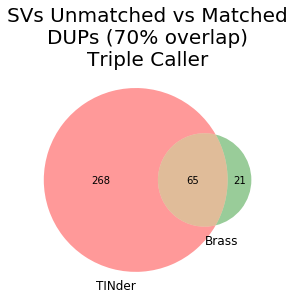

In [137]:
venn2(subsets = (268,21,65), set_labels = ('TINder', 'Brass'))
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller',fontsize=20)
plt.show()

- Scores: 
    - 130/268 (49%) in only TINder and 24/65 (37%) in common have duphold>1.3 in TINder.
    - 165/268 (62%) in only TINder and 56/65 (86%) in common have brass>10 in TINder.
    - 19/21 (90%) in only Triple and 61/65 (94%) in common have at least one caller with score>10.
    - 5/21 (24%) in only Triple and 30/65 (46%) in common have  brass>10 in Triple.

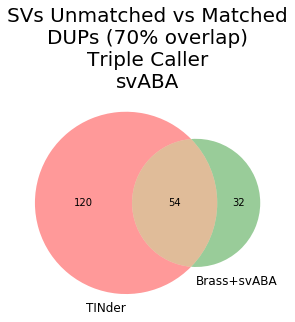

In [138]:
venn2(subsets = (120,32,54), set_labels = ('TINder', 'Brass+svABA'))
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller\nsvABA',fontsize=20)
plt.show()

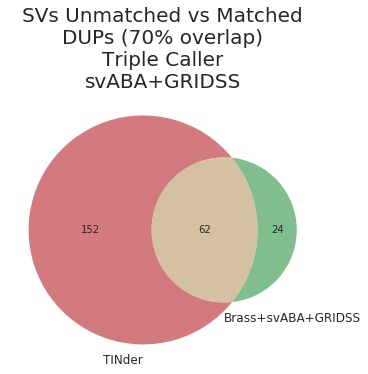

In [250]:
venn2(subsets = (152,24,62), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller\nsvABA+GRIDSS',fontsize=20)
plt.show()

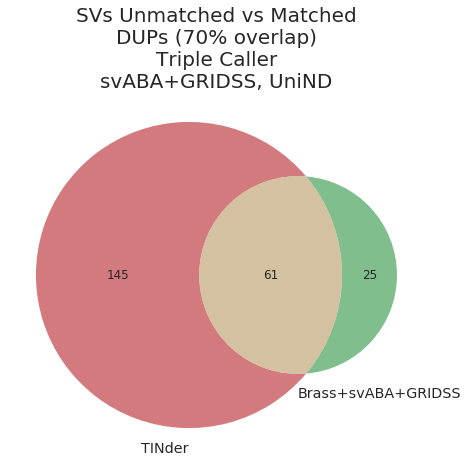

In [149]:
venn2(subsets = (145,25,61), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller\nsvABA+GRIDSS, UniND',fontsize=20)
plt.show()

- green area:

In [163]:
triple_full_info_dup_DUP_DETECT_check=triple_full_info_dup_DUP_DETECT[~((triple_full_info_dup_DUP_DETECT['SV chrom']=='X') | (triple_full_info_dup_DUP_DETECT['SV chrom']=='Y'))]

triple_full_info_dup_DUP_DETECT_check['SV start']=triple_full_info_dup_DUP_DETECT_check['SV start'].map(int)
triple_full_info_dup_DUP_DETECT_check['SV chrom']=triple_full_info_dup_DUP_DETECT_check['SV chrom'].map(int)

triple_full_info_dup_DUP_DETECT_check[triple_full_info_dup_DUP_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,0,1,8768030,8775099,1_8768030_1_8775099_DUP_-+,DUP,IID_H158621_T01_01_WG01,37,50,22,1_8768030_8775099_IID_H158621_T01_01_WG01,Non Detected
1,3501,1,77971370,106639460,1_77971370_1_106639460_DUP_-+,DUP,IID_H158613_T01_01_WG01,9,19,18,1_77971370_106639460_IID_H158613_T01_01_WG01,Non Detected
2,0,1,246407292,246410776,1_246407292_1_246410776_DUP_-+,DUP,IID_H158637_T01_01_WG01,18,0,17,1_246407292_246410776_IID_H158637_T01_01_WG01,Non Detected
3,156,2,89161436,89265778,2_89161436_2_89265778_DUP_-+,DUP,IID_H158617_T01_01_WG01,45,57,20,2_89161436_89265778_IID_H158617_T01_01_WG01,Non Detected
4,24,4,93567358,93570162,4_93567358_4_93570162_DUP_-+,DUP,IID_H158666_T01_01_WG01,22,43,0,4_93567358_93570162_IID_H158666_T01_01_WG01,Non Detected
5,28,4,93567358,93570162,4_93567358_4_93570162_DUP_-+,DUP,IID_H158650_T01_01_WG01,16,32,0,4_93567358_93570162_IID_H158650_T01_01_WG01,Non Detected
6,22,5,135054046,135092251,5_135054046_5_135092251_DUP_-+,DUP,IID_H158662_T01_01_WG01,55,67,27,5_135054046_135092251_IID_H158662_T01_01_WG01,Non Detected
7,36,6,32451354,32523412,6_32451354_6_32523412_DUP_-+,DUP,IID_H158650_T01_01_WG01,8,0,9,6_32451354_32523412_IID_H158650_T01_01_WG01,Non Detected
8,47,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,20,0,14,6_32452838_32512203_IID_H158635_T01_01_WG01,Non Detected
9,42,6,51846112,101194085,6_51846112_6_101194085_DUP_-+,DUP,IID_H158650_T01_01_WG01,9,0,10,6_51846112_101194085_IID_H158650_T01_01_WG01,Non Detected


- red area:

In [164]:
tinder_full_set_DUP_DETECT_check=tinder_full_set_DUP_DETECT[~((tinder_full_set_DUP_DETECT['SV chrom']=='X') | (tinder_full_set_DUP_DETECT['SV chrom']=='Y'))]

tinder_full_set_DUP_DETECT_check['SV start']=tinder_full_set_DUP_DETECT_check['SV start'].map(int)
tinder_full_set_DUP_DETECT_check['SV chrom']=tinder_full_set_DUP_DETECT_check['SV chrom'].map(int)

tinder_full_set_DUP_DETECT_check[tinder_full_set_DUP_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,3029,1,1381103,1432704,51601,DUP,IID_H158669_T01_01_WG01,4.8999998398358e-05,0.000134,10,0,9,1_1381103_1_1432704_IID_H158669_T01_01_WG01,Non Detected
1,1257,1,16875148,145382613,128507465,DUP,IID_H158627_T01_01_WG01,-1,-1.000000,9,0,17,1_16875148_1_145382613_IID_H158627_T01_01_WG01,Non Detected
2,1728,1,16875156,145382616,128507460,DUP,IID_H158636_T01_01_WG01,-1,-1.000000,8,0,16,1_16875156_1_145382616_IID_H158636_T01_01_WG01,Non Detected
3,1011,1,21243153,21716289,473136,DUP,IID_H158623_T01_01_WG01,-1,-1.000000,19,0,25,1_21243153_1_21716289_IID_H158623_T01_01_WG01,Non Detected
4,1166,1,23351172,23354476,3304,DUP,IID_H158625_T01_01_WG01,-1,-1.000000,28,59,40,1_23351172_1_23354476_IID_H158625_T01_01_WG01,Non Detected
5,1013,1,25882871,26108837,225966,DUP,IID_H158623_T01_01_WG01,-1,-1.000000,59,73,28,1_25882871_1_26108837_IID_H158623_T01_01_WG01,Non Detected
6,2759,1,27679204,27681309,2105,DUP,IID_H158664_T01_01_WG01,0.0002789999998640269,0.000658,37,0,37,1_27679204_1_27681309_IID_H158664_T01_01_WG01,Non Detected
7,2930,1,56531160,56541547,10387,DUP,IID_H158668_T01_01_WG01,4.8999998398358e-05,0.000134,55,77,38,1_56531160_1_56541547_IID_H158668_T01_01_WG01,Non Detected
8,2273,1,72544579,72554613,10034,DUP,IID_H158644_T01_01_WG01,0.0006370000191964209,0.001209,36,43,0,1_72544579_1_72554613_IID_H158644_T01_01_WG01,Non Detected
9,1908,1,102775061,102779915,4854,DUP,IID_H158638_T01_01_WG01,4.8999998398358e-05,0.000754,19,0,18,1_102775061_1_102779915_IID_H158638_T01_01_WG01,Non Detected


#### - Brass score >10:

In [165]:
print(tinder_full_set_DUP_DETECT.shape)
tinder_full_set_DUP_DETECT.head(1)

(206, 13)


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01,Non Detected


In [166]:
tinder_full_set_DUP_DETECT_score=tinder_full_set_DUP_DETECT[tinder_full_set_DUP_DETECT['brass_PS']>=10]
print(tinder_full_set_DUP_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DUP_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(184, 13)
52 132


In [167]:
print(triple_full_info_dup_DUP_DETECT.shape)
triple_full_info_dup_DUP_DETECT.head(1)

(86, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8,12_95588243_95589486_IID_H158635_T01_01_WG01,Non Detected


In [168]:
triple_full_info_dup_DUP_DETECT['brass_PS']=triple_full_info_dup_DUP_DETECT['brass_PS'].map(int)
triple_full_info_dup_DUP_DETECT['gridss_VF']=triple_full_info_dup_DUP_DETECT['gridss_VF'].map(int)
triple_full_info_dup_DUP_DETECT['svaba_AD']=triple_full_info_dup_DUP_DETECT['svaba_AD'].map(int)

triple_full_info_dup_DUP_DETECT_score=triple_full_info_dup_DUP_DETECT[(triple_full_info_dup_DUP_DETECT['brass_PS']>=10) | (triple_full_info_dup_DUP_DETECT['gridss_VF']>=10) | (triple_full_info_dup_DUP_DETECT['svaba_AD']>=10)]

print(triple_full_info_dup_DUP_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DUP_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(81, 11)
58 23


In [169]:
triple_full_info_dup_DUP_DETECT['brass_PS']=triple_full_info_dup_DUP_DETECT['brass_PS'].map(int)
#triple_full_info_dup_DEL_DETECT['gridss_VF']=triple_full_info_dup_DEL_DETECT['gridss_VF'].map(int)
#triple_full_info_dup_DEL_DETECT['svaba_AD']=triple_full_info_dup_DEL_DETECT['svaba_AD'].map(int)

triple_full_info_dup_DUP_DETECT_scorebrass=triple_full_info_dup_DUP_DETECT[(triple_full_info_dup_DUP_DETECT['brass_PS']>=10)]

print(triple_full_info_dup_DUP_DETECT_scorebrass.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DUP_DETECT_scorebrass.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(66, 11)
48 18


#### - Sizes:

In [170]:
tinder_full_set_DUP_DETECT.head(1)

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01,Non Detected


In [171]:
tinder_full_set_DUP_DETECT_size=tinder_full_set_DUP_DETECT.copy()
tinder_full_set_DUP_DETECT_size['SV length']=tinder_full_set_DUP_DETECT_size['SV length'].map(int)

triple_full_info_dup_DUP_DETECT_size=triple_full_info_dup_DUP_DETECT.copy()
triple_full_info_dup_DUP_DETECT_size['SV length']=triple_full_info_dup_DUP_DETECT_size['SV end']-triple_full_info_dup_DUP_DETECT_size['SV start']

In [172]:
onlyTINder_DUPs=tinder_full_set_DUP_DETECT_size[tinder_full_set_DUP_DETECT_size['Detection']=='Non Detected']
common_DUPs=tinder_full_set_DUP_DETECT_size[tinder_full_set_DUP_DETECT_size['Detection']=='Detected']
onlyTRIPLE_DUPs=triple_full_info_dup_DUP_DETECT_size[triple_full_info_dup_DUP_DETECT_size['Detection']=='Non Detected']

In [173]:
#TINder
average_size=sum(onlyTINder_DUPs['SV length'])/len(onlyTINder_DUPs['SV length'])
print('onlyTINDER_DELs Size average\t',average_size)

#BTG
average_size=sum(onlyTRIPLE_DUPs['SV length'])/len(onlyTRIPLE_DUPs['SV length'])
print('onlyTRIPLE_DELs Size average\t',average_size)

#Common
average_size=sum(common_DUPs['SV length'])/len(common_DUPs['SV length'])
print('common_DELs Size average\t',average_size)

onlyTINDER_DELs Size average	 7593108.337931034
onlyTRIPLE_DELs Size average	 4370021.4
common_DELs Size average	 15519155.180327868


In [174]:
sizes_TINder_df=pd.DataFrame(onlyTINder_DUPs,columns=['SV length'])
sizes_TINder_df['Group']='TINder'

sizes_TRIPLE_df=pd.DataFrame(onlyTRIPLE_DUPs,columns=['SV length'])
sizes_TRIPLE_df['Group']='TRIPLE'

sizes_COMMON_df=pd.DataFrame(common_DUPs,columns=['SV length'])
sizes_COMMON_df['Group']='COMMON'

In [175]:
sizes_TOTAL_df=sizes_TINder_df.copy()
sizes_TOTAL_df=sizes_TOTAL_df.append(sizes_TRIPLE_df,ignore_index=True)
sizes_TOTAL_df=sizes_TOTAL_df.append(sizes_COMMON_df,ignore_index=True)
#sizes_TOTAL_df

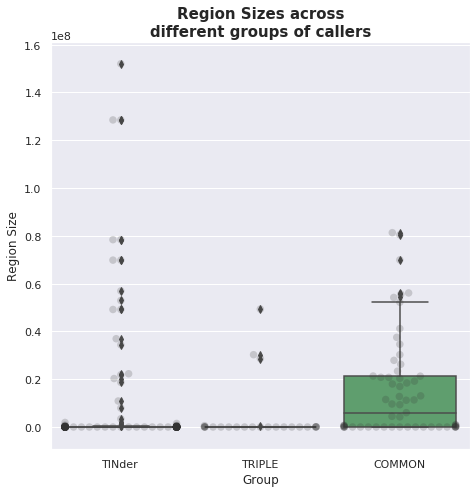

In [176]:
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='SV length', data=sizes_TOTAL_df,order=['TINder','TRIPLE','COMMON'])
ax = sns.swarmplot(x='Group',y='SV length',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['TINder','TRIPLE','COMMON'])
ax.set_title('Region Sizes across\ndifferent groups of callers',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

### - Black regions:

### A- TRIPLE:

In [177]:
triple_full_info_dup_DUP_DETECT.head(1)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8,12_95588243_95589486_IID_H158635_T01_01_WG01,Non Detected


In [178]:
triple_full_info_dup_DUP_DETECT_2intersectBLACK=triple_full_info_dup_DUP_DETECT[['SV chrom','SV start','SV end','SV type','Sample','keys','Detection','brass_PS','gridss_VF','svaba_AD']]
triple_full_info_dup_DUP_DETECT_2intersectBLACK['brass_PS']=triple_full_info_dup_DUP_DETECT_2intersectBLACK['brass_PS'].map(str)
triple_full_info_dup_DUP_DETECT_2intersectBLACK['gridss_VF']=triple_full_info_dup_DUP_DETECT_2intersectBLACK['gridss_VF'].map(str)
triple_full_info_dup_DUP_DETECT_2intersectBLACK['svaba_AD']=triple_full_info_dup_DUP_DETECT_2intersectBLACK['svaba_AD'].map(str)

triple_full_info_dup_DUP_DETECT_2intersectBLACK.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/sit

,SV chrom,SV start,SV end,SV type,Sample,keys,Detection,brass_PS,gridss_VF,svaba_AD
6,12,95588243,95589486,DUP,IID_H158635_T01_01_WG01,12_95588243_95589486_IID_H158635_T01_01_WG01,Non Detected,6,0,8
47,6,32452838,32512203,DUP,IID_H158635_T01_01_WG01,6_32452838_32512203_IID_H158635_T01_01_WG01,Non Detected,20,0,14
151,2,204224087,204237921,DUP,IID_H158632_T01_01_WG01,2_204224087_204237921_IID_H158632_T01_01_WG01,Detected,25,67,26
155,2,204237518,204248875,DUP,IID_H158632_T01_01_WG01,2_204237518_204248875_IID_H158632_T01_01_WG01,Detected,27,61,47
158,3,15596176,15601901,DUP,IID_H158632_T01_01_WG01,3_15596176_15601901_IID_H158632_T01_01_WG01,Detected,55,70,39


In [179]:
black_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist/blacklist_regions.bed',sep='\t',header=None,names=['chromosome','start','end'])
#blue_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist_uk_dan/blacklist_regions_uk_dan.bed',sep='\t',header=None,names=['chromosome','start','end'])

#black_bed=black_bed.append(blue_bed)

key_list=[]
for index,row in black_bed.iterrows():
    key_list.append(str(row['chromosome'])+'_'+str(row['start'])+'_'+str(row['end']))

black_bed['to_index']=key_list 
black_bed_2intersect=black_bed.copy()
black_bed_2intersect.index=black_bed_2intersect['to_index']
black_bed_2intersect.head()

,chromosome,start,end,to_index
to_index,,,,
1_1_840000,1,1,840000,1_1_840000
1_1560001_1605000,1,1560001,1605000,1_1560001_1605000
1_1620001_1680000,1,1620001,1680000,1_1620001_1680000
1_2580001_2700000,1,2580001,2700000,1_2580001_2700000
1_3855001_3990000,1,3855001,3990000,1_3855001_3990000


In [180]:
#1- Black list

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_DUP_DETECT_2intersectBLACK.values.tolist())
list_bed_cytobands=BedTool(black_bed_2intersect.values.tolist())

I_focal_blacklist = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','SV type','Sample','keys','Detection','brass_PS','gridss_VF','svaba_AD','chr_band','start_band', 'end_band','keys2' ])
#I = I[I.chr_band!="X"]
print(triple_full_info_dup_DUP_DETECT_2intersectBLACK.shape)
print(I_focal_blacklist.shape)
I_focal_blacklist.head()

(86, 10)
(380, 14)


,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2
0,6,32452838,32512203,DUP,IID_H158635_T01_01_WG01,6_32452838_32512203_IID_H158635_T01_01_WG01,Non Detected,20,0,14,6,32445001,32655000,6_32445001_32655000
1,9,21191503,32532021,DUP,IID_H158625_T01_01_WG01,9_21191503_32532021_IID_H158625_T01_01_WG01,Detected,40,58,43,9,21180001,21210000,9_21180001_21210000
2,9,21191503,32532021,DUP,IID_H158625_T01_01_WG01,9_21191503_32532021_IID_H158625_T01_01_WG01,Detected,40,58,43,9,23355001,23385000,9_23355001_23385000
3,2,89161441,89214587,DUP,IID_H158608_T01_01_WG01,2_89161441_89214587_IID_H158608_T01_01_WG01,Detected,48,63,30,2,89130001,90105000,2_89130001_90105000
4,17,53624213,74434948,DUP,IID_H158631_T01_01_WG01,17_53624213_74434948_IID_H158631_T01_01_WG01,Detected,0,46,45,17,58005001,58035000,17_58005001_58035000


In [181]:
I_focal_blacklist['start_seg']=I_focal_blacklist['start_seg'].map(int)
I_focal_blacklist['end_seg']=I_focal_blacklist['end_seg'].map(int)
I_focal_blacklist['start_band']=I_focal_blacklist['start_band'].map(int)
I_focal_blacklist['end_band']=I_focal_blacklist['end_band'].map(int)

In [182]:
## 70% of overlapping between the segment and the band
#I_cytobands_to70=I_cytobands[~( (I_cytobands['start_seg']<I_cytobands['start_band']) & (I_cytobands['end_seg']>I_cytobands['end_band']) )]
I_focal_blacklist_70=[]
percentage=[]

for index,row in I_focal_blacklist.iterrows():
    
    #Cases in which the segment starts before the beginning of the band and finishes after the end (100%)
    if((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
        
    #Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_seg']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue

    #Cases in which the segment starts after the beginning of the band and finisihes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_seg']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
      
    #Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] > row['end_seg'])):
        I_focal_blacklist_70.append(row)
        percentage.append(1)
        continue
                
I_focal_blacklist_70=pd.DataFrame(I_focal_blacklist_70)
I_focal_blacklist_70['Percentage']=percentage
print(I_focal_blacklist_70.shape)
I_focal_blacklist_70.sort_values(by=['chr_seg','start_seg']).reset_index().head()

(380, 15)


,index,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2,Percentage
0,26,1,77971370,106639460,DUP,IID_H158613_T01_01_WG01,1_77971370_106639460_IID_H158613_T01_01_WG01,Non Detected,9,19,18,1,104400001,104430000,1_104400001_104430000,0.001046
1,27,1,77971370,106639460,DUP,IID_H158613_T01_01_WG01,1_77971370_106639460_IID_H158613_T01_01_WG01,Non Detected,9,19,18,1,106005001,106035000,1_106005001_106035000,0.001046
2,28,1,77971370,106639460,DUP,IID_H158613_T01_01_WG01,1_77971370_106639460_IID_H158613_T01_01_WG01,Non Detected,9,19,18,1,82695001,82725000,1_82695001_82725000,0.001046
3,29,1,77971370,106639460,DUP,IID_H158613_T01_01_WG01,1_77971370_106639460_IID_H158613_T01_01_WG01,Non Detected,9,19,18,1,103920001,104010000,1_103920001_104010000,0.003139
4,30,1,77971370,106639460,DUP,IID_H158613_T01_01_WG01,1_77971370_106639460_IID_H158613_T01_01_WG01,Non Detected,9,19,18,1,104130001,104295000,1_104130001_104295000,0.005755


In [184]:
I_focal_blacklist_70_detected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Detected']
I_focal_blacklist_70_nondetected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Non Detected']

- Detected:

In [185]:
print(len(I_focal_blacklist_70_detected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_detected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

34
9_21191503_32532021_IID_H158625_T01_01_WG01 	 0.004276347870529371
2_89161441_89214587_IID_H158608_T01_01_WG01 	 1.0
17_53624213_74434948_IID_H158631_T01_01_WG01 	 0.040363254829778955
17_57483548_75487029_IID_H158631_T01_01_WG01 	 0.04665703260386145
1_80270241_93307117_IID_H158613_T01_01_WG01 	 0.032216076919041034
1_91351809_104129509_IID_H158613_T01_01_WG01 	 0.016434726124419888
22_18113784_40429270_IID_H158613_T01_01_WG01 	 0.1035144831710141
22_18162700_38953659_IID_H158613_T01_01_WG01 	 0.10894047744502794
22_41343925_47349511_IID_H158613_T01_01_WG01 	 0.004995182818129654
13_31476926_42683945_IID_H158617_T01_01_WG01 	 0.0026768045989749817
5_22503451_63694222_IID_H158616_T01_01_WG01 	 0.10742666118097181
5_26261588_178257462_IID_H158616_T01_01_WG01 	 0.05072483743867942
5_75581792_129806283_IID_H158616_T01_01_WG01 	 0.009681750631831658
7_70936968_94311945_IID_H158616_T01_01_WG01 	 0.11294094535365745
14_106382716_106552283_IID_H158605_T01_01_WG01 	 1.0
11_36492836_10643614

In [186]:
scatter_plot.head()

,Sample,Percentage
0,9_21191503_32532021_IID_H158625_T01_01_WG01,0.004276
1,2_89161441_89214587_IID_H158608_T01_01_WG01,1.000000
2,17_53624213_74434948_IID_H158631_T01_01_WG01,0.040363
3,17_57483548_75487029_IID_H158631_T01_01_WG01,0.046657
4,1_80270241_93307117_IID_H158613_T01_01_WG01,0.032216


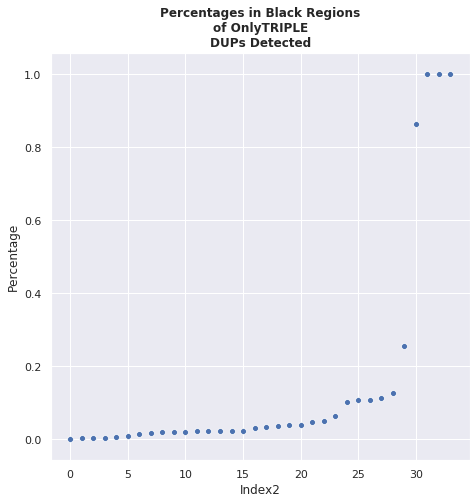

In [187]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTRIPLE\nDUPs Detected',weight='bold')
plt.show()

In [188]:
YELLOW_TRIPLE_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(YELLOW_TRIPLE_BLACK))
YELLOW_TRIPLE_BLACK

4


['2_89161441_89214587_IID_H158608_T01_01_WG01',
 '14_106382716_106552283_IID_H158605_T01_01_WG01',
 '9_38327562_75852185_IID_H158638_T01_01_WG01',
 '14_106327314_106330074_IID_H158620_T01_01_WG01']

- Non Detected:

In [189]:
print(len(I_focal_blacklist_70_nondetected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_nondetected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

9
6_32452838_32512203_IID_H158635_T01_01_WG01 	 1.0
1_77971370_106639460_IID_H158613_T01_01_WG01 	 0.029823821538163164
2_89161436_89265778_IID_H158617_T01_01_WG01 	 1.0
14_106478109_107048698_IID_H158622_T01_01_WG01 	 0.9211288685901762
5_135054046_135092251_IID_H158662_T01_01_WG01 	 0.05889281507656066
6_32451354_32523412_IID_H158650_T01_01_WG01 	 1.0
6_51846112_101194085_IID_H158650_T01_01_WG01 	 0.10638706477366355
13_72467248_102737237_IID_H158646_T01_01_WG01 	 0.005450877435072738
7_75759026_75761393_IID_H158614_T01_01_WG01 	 1.0


In [190]:
scatter_plot.head()

,Sample,Percentage
0,6_32452838_32512203_IID_H158635_T01_01_WG01,1.000000
1,1_77971370_106639460_IID_H158613_T01_01_WG01,0.029824
2,2_89161436_89265778_IID_H158617_T01_01_WG01,1.000000
3,14_106478109_107048698_IID_H158622_T01_01_WG01,0.921129
4,5_135054046_135092251_IID_H158662_T01_01_WG01,0.058893


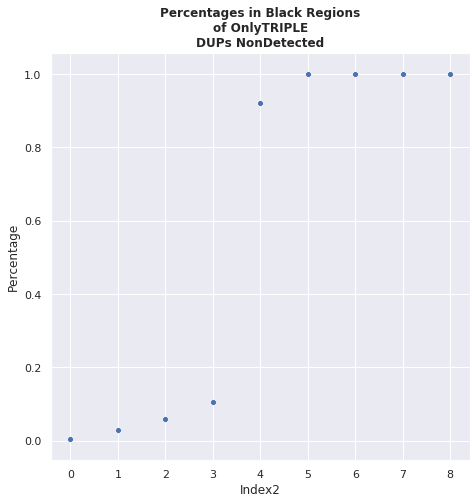

In [191]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTRIPLE\nDUPs NonDetected',weight='bold')
plt.show()

In [192]:
GREEN_TRIPLE_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(GREEN_TRIPLE_BLACK))
GREEN_TRIPLE_BLACK

5


['6_32452838_32512203_IID_H158635_T01_01_WG01',
 '2_89161436_89265778_IID_H158617_T01_01_WG01',
 '14_106478109_107048698_IID_H158622_T01_01_WG01',
 '6_32451354_32523412_IID_H158650_T01_01_WG01',
 '7_75759026_75761393_IID_H158614_T01_01_WG01']

In [193]:
TRIPLE_noBLACK_DUPs=pd.DataFrame()
triple_keys=YELLOW_TRIPLE_BLACK+GREEN_TRIPLE_BLACK

for index,row in triple_full_info_dup_DUP_DETECT.iterrows():
    if row['keys'] not in triple_keys:
        TRIPLE_noBLACK_DUPs=TRIPLE_noBLACK_DUPs.append(row)

print(TRIPLE_noBLACK_DUPs.shape)
TRIPLE_noBLACK_DUPs.head()

(77, 11)


,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
6,Non Detected,12_95588243_12_95589486_DUP_-+,12,95589486.0,95588243.0,DUP,IID_H158635_T01_01_WG01,6.0,0.0,12_95588243_95589486_IID_H158635_T01_01_WG01,8.0
151,Detected,2_204224087_2_204237921_DUP_-+,2,204237921.0,204224087.0,DUP,IID_H158632_T01_01_WG01,25.0,67.0,2_204224087_204237921_IID_H158632_T01_01_WG01,26.0
155,Detected,2_204237518_2_204248875_DUP_-+,2,204248875.0,204237518.0,DUP,IID_H158632_T01_01_WG01,27.0,61.0,2_204237518_204248875_IID_H158632_T01_01_WG01,47.0
158,Detected,3_15596176_3_15601901_DUP_-+,3,15601901.0,15596176.0,DUP,IID_H158632_T01_01_WG01,55.0,70.0,3_15596176_15601901_IID_H158632_T01_01_WG01,39.0
568,Detected,9_21191503_9_32532021_DUP_-+,9,32532021.0,21191503.0,DUP,IID_H158625_T01_01_WG01,40.0,58.0,9_21191503_32532021_IID_H158625_T01_01_WG01,43.0


In [284]:
#Joe
TRIPLE_noBLACK_DUPs.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/joe_files_svs/triple_full_info_dup_DUP_DETECT_noBLACK.tsv',sep='\t')

In [394]:
#For chr distrib plot
TRIPLE_noBLACK_DUPs.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/chr_distrib/triple_full_info_dup_DUP_DETECT_noBLACK.tsv',sep='\t')

### B- TINDER:

In [195]:
tinder_full_set_DUP_DETECT.head(1)

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01,Non Detected


In [196]:
tinder_full_set_DUP_DETECT_2intersectBLACK=tinder_full_set_DUP_DETECT[['SV chrom','SV start','SV start2','SV type','Sample','keys','Detection','brass_PS','gridss_VF','svaba_AD']]
tinder_full_set_DUP_DETECT_2intersectBLACK['brass_PS']=tinder_full_set_DUP_DETECT_2intersectBLACK['brass_PS'].map(str)
tinder_full_set_DUP_DETECT_2intersectBLACK['gridss_VF']=tinder_full_set_DUP_DETECT_2intersectBLACK['gridss_VF'].map(str)
tinder_full_set_DUP_DETECT_2intersectBLACK['svaba_AD']=tinder_full_set_DUP_DETECT_2intersectBLACK['svaba_AD'].map(str)

tinder_full_set_DUP_DETECT_2intersectBLACK.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/sit

,SV chrom,SV start,SV start2,SV type,Sample,keys,Detection,brass_PS,gridss_VF,svaba_AD
2,10,120303654,120305644,DUP,IID_H158604_T01_01_WG01,10_120303654_10_120305644_IID_H158604_T01_01_WG01,Non Detected,30,62,36
29,8,83891490,83893303,DUP,IID_H158604_T01_01_WG01,8_83891490_8_83893303_IID_H158604_T01_01_WG01,Non Detected,26,52,0
41,13,58011247,58016252,DUP,IID_H158605_T01_01_WG01,13_58011247_13_58016252_IID_H158605_T01_01_WG01,Non Detected,40,64,41
45,14,106382716,106552283,DUP,IID_H158605_T01_01_WG01,14_106382716_14_106552283_IID_H158605_T01_01_WG01,Detected,34,46,46
66,8,101179292,101181852,DUP,IID_H158605_T01_01_WG01,8_101179292_8_101181852_IID_H158605_T01_01_WG01,Non Detected,41,49,48


In [197]:
black_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist/blacklist_regions.bed',sep='\t',header=None,names=['chromosome','start','end'])
#blue_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist_uk_dan/blacklist_regions_uk_dan.bed',sep='\t',header=None,names=['chromosome','start','end'])

#black_bed=black_bed.append(blue_bed)

key_list=[]
for index,row in black_bed.iterrows():
    key_list.append(str(row['chromosome'])+'_'+str(row['start'])+'_'+str(row['end']))

black_bed['to_index']=key_list 
black_bed_2intersect=black_bed.copy()
black_bed_2intersect.index=black_bed_2intersect['to_index']
black_bed_2intersect.head()

,chromosome,start,end,to_index
to_index,,,,
1_1_840000,1,1,840000,1_1_840000
1_1560001_1605000,1,1560001,1605000,1_1560001_1605000
1_1620001_1680000,1,1620001,1680000,1_1620001_1680000
1_2580001_2700000,1,2580001,2700000,1_2580001_2700000
1_3855001_3990000,1,3855001,3990000,1_3855001_3990000


In [198]:
#1- Black list

#list2intersection

list_patient_contig=BedTool(tinder_full_set_DUP_DETECT_2intersectBLACK.values.tolist())
list_bed_cytobands=BedTool(black_bed_2intersect.values.tolist())

I_focal_blacklist = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','SV type','Sample','keys','Detection','brass_PS','gridss_VF','svaba_AD','chr_band','start_band', 'end_band','keys2' ])
#I = I[I.chr_band!="X"]
print(tinder_full_set_DUP_DETECT_2intersectBLACK.shape)
print(I_focal_blacklist.shape)
I_focal_blacklist.head()

(206, 10)
(596, 14)


,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2
0,14,106382716,106552283,DUP,IID_H158605_T01_01_WG01,14_106382716_14_106552283_IID_H158605_T01_01_WG01,Detected,34,46,46,14,106245001,106920000,14_106245001_106920000
1,2,89161441,89214587,DUP,IID_H158608_T01_01_WG01,2_89161441_2_89214587_IID_H158608_T01_01_WG01,Detected,48,63,46,2,89130001,90105000,2_89130001_90105000
2,1,80270241,93307117,DUP,IID_H158613_T01_01_WG01,1_80270241_1_93307117_IID_H158613_T01_01_WG01,Detected,34,49,24,1,82695001,82725000,1_82695001_82725000
3,1,80270241,93307117,DUP,IID_H158613_T01_01_WG01,1_80270241_1_93307117_IID_H158613_T01_01_WG01,Detected,34,49,24,1,85980001,86010000,1_85980001_86010000
4,1,80270241,93307117,DUP,IID_H158613_T01_01_WG01,1_80270241_1_93307117_IID_H158613_T01_01_WG01,Detected,34,49,24,1,83595001,83955000,1_83595001_83955000


In [199]:
I_focal_blacklist['start_seg']=I_focal_blacklist['start_seg'].map(int)
I_focal_blacklist['end_seg']=I_focal_blacklist['end_seg'].map(int)
I_focal_blacklist['start_band']=I_focal_blacklist['start_band'].map(int)
I_focal_blacklist['end_band']=I_focal_blacklist['end_band'].map(int)

In [200]:
## 70% of overlapping between the segment and the band
#I_cytobands_to70=I_cytobands[~( (I_cytobands['start_seg']<I_cytobands['start_band']) & (I_cytobands['end_seg']>I_cytobands['end_band']) )]
I_focal_blacklist_70=[]
percentage=[]

for index,row in I_focal_blacklist.iterrows():
    
    #Cases in which the segment starts before the beginning of the band and finishes after the end (100%)
    if((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
        
    #Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_seg']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue

    #Cases in which the segment starts after the beginning of the band and finisihes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_seg']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
      
    #Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] > row['end_seg'])):
        I_focal_blacklist_70.append(row)
        percentage.append(1)
        continue
                
I_focal_blacklist_70=pd.DataFrame(I_focal_blacklist_70)
I_focal_blacklist_70['Percentage']=percentage
print(I_focal_blacklist_70.shape)
I_focal_blacklist_70.sort_values(by=['chr_seg','start_seg']).reset_index().head()

(596, 15)


,index,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2,Percentage
0,135,1,16875148,145382613,DUP,IID_H158627_T01_01_WG01,1_16875148_1_145382613_IID_H158627_T01_01_WG01,Non Detected,9,0,17,1,22290001,22350000,1_22290001_22350000,0.000467
1,136,1,16875148,145382613,DUP,IID_H158627_T01_01_WG01,1_16875148_1_145382613_IID_H158627_T01_01_WG01,Non Detected,9,0,17,1,24255001,24375000,1_24255001_24375000,0.000934
2,137,1,16875148,145382613,DUP,IID_H158627_T01_01_WG01,1_16875148_1_145382613_IID_H158627_T01_01_WG01,Non Detected,9,0,17,1,25590001,25665000,1_25590001_25665000,0.000584
3,138,1,16875148,145382613,DUP,IID_H158627_T01_01_WG01,1_16875148_1_145382613_IID_H158627_T01_01_WG01,Non Detected,9,0,17,1,47385001,47415000,1_47385001_47415000,0.000233
4,139,1,16875148,145382613,DUP,IID_H158627_T01_01_WG01,1_16875148_1_145382613_IID_H158627_T01_01_WG01,Non Detected,9,0,17,1,47595001,47640000,1_47595001_47640000,0.000350


In [201]:
I_focal_blacklist_70_detected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Detected']
I_focal_blacklist_70_nondetected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Non Detected']

- Detected:

In [202]:
print(len(I_focal_blacklist_70_detected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_detected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

36
14_106382716_14_106552283_IID_H158605_T01_01_WG01 	 1.0
2_89161441_2_89214587_IID_H158608_T01_01_WG01 	 1.0
1_80270241_1_93307117_IID_H158613_T01_01_WG01 	 0.032216076919041034
1_91351809_1_104129509_IID_H158613_T01_01_WG01 	 0.016434726124419888
22_18162700_22_38953659_IID_H158613_T01_01_WG01 	 0.10894047744502794
22_41343925_22_47349511_IID_H158613_T01_01_WG01 	 0.004995182818129654
5_22503451_5_63694219_IID_H158616_T01_01_WG01 	 0.10742666900505472
5_75581792_5_129806283_IID_H158616_T01_01_WG01 	 0.009681750631831658
7_70936968_7_94311945_IID_H158616_T01_01_WG01 	 0.11294094535365745
13_31476926_13_42683945_IID_H158617_T01_01_WG01 	 0.0026768045989749817
14_106327314_14_106330074_IID_H158620_T01_01_WG01 	 1.0
9_21191503_9_32532021_IID_H158625_T01_01_WG01 	 0.004276347870529371
1_147092403_1_156443099_IID_H158630_T01_01_WG01 	 0.2550604789204996
17_49281590_17_77184553_IID_H158631_T01_01_WG01 	 0.030103935556951424
17_53624213_17_74434948_IID_H158631_T01_01_WG01 	 0.04036325482977

In [203]:
scatter_plot.head()

,Sample,Percentage
0,14_106382716_14_106552283_IID_H158605_T01_01_WG01,1.000000
1,2_89161441_2_89214587_IID_H158608_T01_01_WG01,1.000000
2,1_80270241_1_93307117_IID_H158613_T01_01_WG01,0.032216
3,1_91351809_1_104129509_IID_H158613_T01_01_WG01,0.016435
4,22_18162700_22_38953659_IID_H158613_T01_01_WG01,0.108940


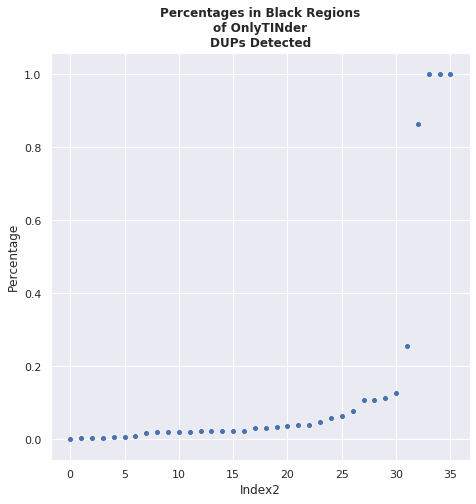

In [204]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTINder\nDUPs Detected',weight='bold')
plt.show()

In [205]:
YELLOW_TINDER_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(YELLOW_TINDER_BLACK))
YELLOW_TINDER_BLACK

4


['14_106382716_14_106552283_IID_H158605_T01_01_WG01',
 '2_89161441_2_89214587_IID_H158608_T01_01_WG01',
 '14_106327314_14_106330074_IID_H158620_T01_01_WG01',
 '9_38327562_9_75852185_IID_H158638_T01_01_WG01']

- Non Detected:

In [206]:
print(len(I_focal_blacklist_70_nondetected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_nondetected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

27
1_226089727_1_229530677_IID_H158614_T01_01_WG01 	 0.030513956901437107
11_49219228_11_49221071_IID_H158616_T01_01_WG01 	 1.0
5_26261588_5_178257467_IID_H158616_T01_01_WG01 	 0.050724835770053996
17_25538297_17_33465423_IID_H158617_T01_01_WG01 	 0.05487423815390344
5_19606200_5_89451660_IID_H158618_T01_01_WG01 	 0.10201061028161315
6_31377393_6_31472068_IID_H158619_T01_01_WG01 	 0.3443992606284658
1_16875148_1_145382613_IID_H158627_T01_01_WG01 	 0.2119707131410615
16_33418847_16_33520581_IID_H158627_T01_01_WG01 	 1.0
1_145251479_1_147164213_IID_H158630_T01_01_WG01 	 0.4749850214405139
16_53545465_16_75842461_IID_H158630_T01_01_WG01 	 0.03901843997281069
1_16875156_1_145382616_IID_H158636_T01_01_WG01 	 0.2119706591352751
8_83255520_8_101931142_IID_H158636_T01_01_WG01 	 0.01686680100935862
1_237182720_1_248070505_IID_H158638_T01_01_WG01 	 0.04959640551315075
5_59387596_5_79680023_IID_H158638_T01_01_WG01 	 0.09757319811967292
12_9553663_12_31407917_IID_H158639_T01_01_WG01 	 0.0206519060

In [207]:
scatter_plot.head()

,Sample,Percentage
0,1_226089727_1_229530677_IID_H158614_T01_01_WG01,0.030514
1,11_49219228_11_49221071_IID_H158616_T01_01_WG01,1.000000
2,5_26261588_5_178257467_IID_H158616_T01_01_WG01,0.050725
3,17_25538297_17_33465423_IID_H158617_T01_01_WG01,0.054874
4,5_19606200_5_89451660_IID_H158618_T01_01_WG01,0.102011


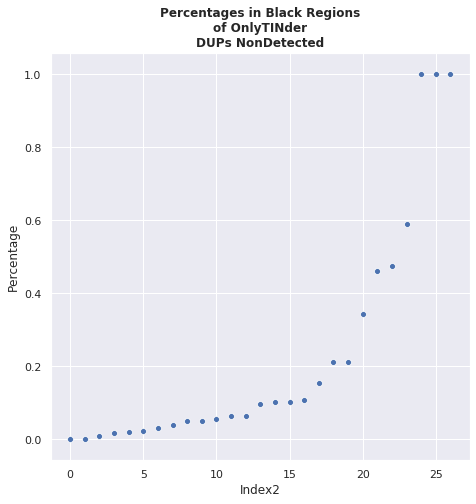

In [208]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTINder\nDUPs NonDetected',weight='bold')
plt.show()

In [209]:
RED_TINDER_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(RED_TINDER_BLACK))
RED_TINDER_BLACK

3


['11_49219228_11_49221071_IID_H158616_T01_01_WG01',
 '16_33418847_16_33520581_IID_H158627_T01_01_WG01',
 '8_12432835_8_12485729_IID_H158668_T01_01_WG01']

In [210]:
TINDER_noBLACK_DUPs=pd.DataFrame()
tinder_keys=YELLOW_TINDER_BLACK+RED_TINDER_BLACK

for index,row in tinder_full_set_DUP_DETECT.iterrows():
    if row['keys'] not in tinder_keys:
        TINDER_noBLACK_DUPs=TINDER_noBLACK_DUPs.append(row)

print(TINDER_noBLACK_DUPs.shape)
TINDER_noBLACK_DUPs.head()

(199, 13)


,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
2,Non Detected,-1,-1.000000,10,1990.0,120303654.0,120305644.0,DUP,IID_H158604_T01_01_WG01,30.0,62.0,10_120303654_10_120305644_IID_H158604_T01_01_WG01,36.0
29,Non Detected,9.7999996796716e-05,0.000449,8,1813.0,83891490.0,83893303.0,DUP,IID_H158604_T01_01_WG01,26.0,52.0,8_83891490_8_83893303_IID_H158604_T01_01_WG01,0.0
41,Non Detected,-1,-1.000000,13,5005.0,58011247.0,58016252.0,DUP,IID_H158605_T01_01_WG01,40.0,64.0,13_58011247_13_58016252_IID_H158605_T01_01_WG01,41.0
66,Non Detected,0.000977999996393919,0.002369,8,2560.0,101179292.0,101181852.0,DUP,IID_H158605_T01_01_WG01,41.0,49.0,8_101179292_8_101181852_IID_H158605_T01_01_WG01,48.0
77,Detected,-1,-1.000000,11,6792.0,77932829.0,77939621.0,DUP,IID_H158606_T01_01_WG01,21.0,29.0,11_77932829_11_77939621_IID_H158606_T01_01_WG01,25.0


In [283]:
#Joe
TINDER_noBLACK_DUPs.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DUP_DETECT_noBLACK.tsv',sep='\t')

In [395]:
#For chr distribution plot
TINDER_noBLACK_DUPs.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/chr_distrib/tinder_full_set_DUP_DETECT_noBLACK.tsv',sep='\t')

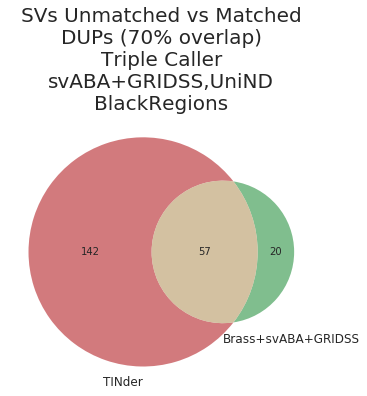

In [779]:
venn2(subsets = (142,20,57), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND\nBlackRegions',fontsize=20)
plt.show()

# - Caller Combinations:

In [213]:
tinder_full_set_DUP_DETECT
triple_full_info_dup_DUP_DETECT

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8,12_95588243_95589486_IID_H158635_T01_01_WG01,Non Detected
47,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,20,0,14,6_32452838_32512203_IID_H158635_T01_01_WG01,Non Detected
151,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,67,26,2_204224087_204237921_IID_H158632_T01_01_WG01,Detected
155,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,61,47,2_204237518_204248875_IID_H158632_T01_01_WG01,Detected
158,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,55,70,39,3_15596176_15601901_IID_H158632_T01_01_WG01,Detected
568,9,21191503,32532021,9_21191503_9_32532021_DUP_-+,DUP,IID_H158625_T01_01_WG01,40,58,43,9_21191503_32532021_IID_H158625_T01_01_WG01,Detected
662,9,32341087,32345901,9_32341087_9_32345901_DUP_-+,DUP,IID_H158625_T01_01_WG01,61,75,60,9_32341087_32345901_IID_H158625_T01_01_WG01,Detected
2,12,115909573,115910799,12_115909573_12_115910799_DUP_-+,DUP,IID_H158608_T01_01_WG01,29,46,44,12_115909573_115910799_IID_H158608_T01_01_WG01,Detected
16,2,89161441,89214587,2_89161441_2_89214587_DUP_-+,DUP,IID_H158608_T01_01_WG01,48,63,30,2_89161441_89214587_IID_H158608_T01_01_WG01,Detected
82,19,4842214,4909757,19_4842214_19_4909757_DUP_-+,DUP,IID_H158618_T01_01_WG01,49,67,48,19_4842214_4909757_IID_H158618_T01_01_WG01,Non Detected


In [214]:
print(tinder_full_set_DUP_DETECT.shape)
tinder_full_set_DUP_DETECT.head(1)

(206, 13)


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01,Non Detected


In [215]:
print(triple_full_info_dup_DUP_DETECT.shape)
triple_full_info_dup_DUP_DETECT.head(1)

(86, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8,12_95588243_95589486_IID_H158635_T01_01_WG01,Non Detected


In [216]:
#Function to apply calls from SV-detectors
def label_caller (row):
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])>0)):
        return 'Brass,GRIDSS,SvABA'
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])==0)):
        return 'Brass,GRIDSS'
    if ((int(row['brass_PS'])>0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])==0)):
        return 'Brass,SvABA'
    if ((int(row['brass_PS'])==0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])>0)):
        return 'GRIDSS,SvABA'

In [217]:
tinder_full_set_DUP_DETECT['Callers']=tinder_full_set_DUP_DETECT.apply(lambda row: label_caller(row), axis=1)
triple_full_info_dup_DUP_DETECT['Callers']=triple_full_info_dup_DUP_DETECT.apply(lambda row: label_caller(row), axis=1)

- TINder :

In [218]:
countsTIN=tinder_full_set_DUP_DETECT.groupby(['Detection','Callers']).size()
countsTIN=pd.DataFrame(countsTIN).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTIN.columns = ['SV Events TINder']
countsTIN

SV Events TINder
Detection    Callers                             
Non Detected Brass,SvABA                       36
             Brass,GRIDSS,SvABA                84
             Brass,GRIDSS                      25
Detected     Brass,SvABA                        8
             Brass,GRIDSS,SvABA                48
             Brass,GRIDSS                       5

- TRIPLE:

In [219]:
countsTRI=triple_full_info_dup_DUP_DETECT.groupby(['Detection','Callers']).size()
countsTRI=pd.DataFrame(countsTRI).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTRI.columns = ['SV Events TRIPLE']
countsTRI

SV Events TRIPLE
Detection    Callers                             
Non Detected GRIDSS,SvABA                       3
             Brass,SvABA                        6
             Brass,GRIDSS,SvABA                13
             Brass,GRIDSS                       3
Detected     GRIDSS,SvABA                       7
             Brass,SvABA                        8
             Brass,GRIDSS,SvABA                43
             Brass,GRIDSS                       3

In [222]:
comb=pd.concat([countsTIN, countsTRI], axis=1, sort=False)
comb['SV Events TINder']=countsTIN['SV Events TINder'].map(str)
comb['SV Events TRIPLE']=countsTRI['SV Events TRIPLE'].map(str)
comb

SV Events TINder SV Events TRIPLE
Detection    Callers                                             
Detected     Brass,GRIDSS                      5                3
             Brass,GRIDSS,SvABA               48               43
             Brass,SvABA                       8                8
             GRIDSS,SvABA                    NaN                7
Non Detected Brass,GRIDSS                     25                3
             Brass,GRIDSS,SvABA               84               13
             Brass,SvABA                      36                6
             GRIDSS,SvABA                    NaN                3

In [223]:
#Detected
comb_plot1=comb.loc['Detected']
comb_plot1['Detection']='Detected'
comb_plot1_TIN=comb_plot1[['SV Events TINder','Detection']]
comb_plot1_TIN.columns=['SV Events','Detection']
comb_plot1_TIN['Method']='TINder'
comb_plot1_TRI=comb_plot1[['SV Events TRIPLE','Detection']]
comb_plot1_TRI.columns=['SV Events','Detection']
comb_plot1_TRI['Method']='TRIPLE'
comb_plot1_plot=pd.concat([comb_plot1_TIN, comb_plot1_TRI], axis=0, sort=False)
comb_plot1_plot=comb_plot1_plot.fillna(0)
comb_plot1_plot['Callers']=comb_plot1_plot.index
comb_plot1_plot['SV Events']=comb_plot1_plot['SV Events'].map(int)

#Non Detected
comb_plot2=comb.loc['Non Detected']
comb_plot2['Detection']='Non Detected'
comb_plot2_TIN=comb_plot2[['SV Events TINder','Detection']]
comb_plot2_TIN.columns=['SV Events','Detection']
comb_plot2_TIN['Method']='TINder'
comb_plot2_TRI=comb_plot2[['SV Events TRIPLE','Detection']]
comb_plot2_TRI.columns=['SV Events','Detection']
comb_plot2_TRI['Method']='TRIPLE'
comb_plot2_plot=pd.concat([comb_plot2_TIN, comb_plot2_TRI], axis=0, sort=False)
comb_plot2_plot=comb_plot2_plot.fillna(0)
comb_plot2_plot['Callers']=comb_plot2_plot.index
comb_plot2_plot['SV Events']=comb_plot2_plot['SV Events'].map(int)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


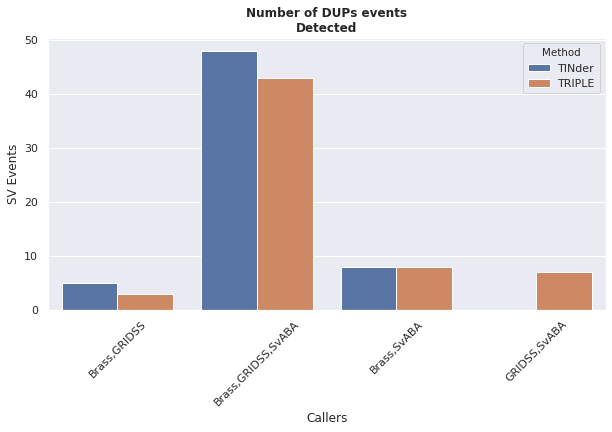

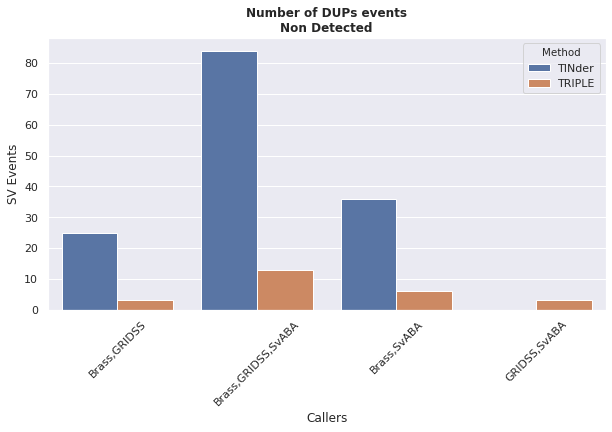

In [224]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot1_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DUPs events\nDetected',weight='bold')
plt.xticks(rotation=45)
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot2_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DUPs events\nNon Detected',weight='bold')
plt.xticks(rotation=45)
plt.show()

# - Caller Combinations:

In [ ]:
TRIPLE_noBLACK_DUPs
TINDER_noBLACK_DUPs

In [225]:
print(TINDER_noBLACK_DUPs.shape)
TINDER_noBLACK_DUPs.head(1)

(199, 13)


,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
2,Non Detected,-1,-1.0,10,1990.0,120303654.0,120305644.0,DUP,IID_H158604_T01_01_WG01,30.0,62.0,10_120303654_10_120305644_IID_H158604_T01_01_WG01,36.0


In [226]:
print(TRIPLE_noBLACK_DUPs.shape)
TRIPLE_noBLACK_DUPs.head(1)

(77, 11)


,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
6,Non Detected,12_95588243_12_95589486_DUP_-+,12,95589486.0,95588243.0,DUP,IID_H158635_T01_01_WG01,6.0,0.0,12_95588243_95589486_IID_H158635_T01_01_WG01,8.0


In [227]:
#Function to apply calls from SV-detectors
def label_caller (row):
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])>0)):
        return 'Brass,GRIDSS,SvABA'
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])==0)):
        return 'Brass,GRIDSS'
    if ((int(row['brass_PS'])>0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])==0)):
        return 'Brass,SvABA'
    if ((int(row['brass_PS'])==0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])>0)):
        return 'GRIDSS,SvABA'

In [228]:
TINDER_noBLACK_DUPs['Callers']=TINDER_noBLACK_DUPs.apply(lambda row: label_caller(row), axis=1)
TRIPLE_noBLACK_DUPs['Callers']=TRIPLE_noBLACK_DUPs.apply(lambda row: label_caller(row), axis=1)

- TINder :

In [229]:
countsTIN=TINDER_noBLACK_DUPs.groupby(['Detection','Callers']).size()
countsTIN=pd.DataFrame(countsTIN).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTIN.columns = ['SV Events TINder']
countsTIN

SV Events TINder
Detection    Callers                             
Non Detected Brass,SvABA                       34
             Brass,GRIDSS,SvABA                84
             Brass,GRIDSS                      24
Detected     Brass,SvABA                        8
             Brass,GRIDSS,SvABA                44
             Brass,GRIDSS                       5

- TRIPLE:

In [230]:
countsTRI=TRIPLE_noBLACK_DUPs.groupby(['Detection','Callers']).size()
countsTRI=pd.DataFrame(countsTRI).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTRI.columns = ['SV Events TRIPLE']
countsTRI

SV Events TRIPLE
Detection    Callers                             
Non Detected GRIDSS,SvABA                       3
             Brass,SvABA                        3
             Brass,GRIDSS,SvABA                11
             Brass,GRIDSS                       3
Detected     GRIDSS,SvABA                       7
             Brass,SvABA                        8
             Brass,GRIDSS,SvABA                39
             Brass,GRIDSS                       3

In [231]:
comb=pd.concat([countsTIN, countsTRI], axis=1, sort=False)
comb['SV Events TINder']=countsTIN['SV Events TINder'].map(str)
comb['SV Events TRIPLE']=countsTRI['SV Events TRIPLE'].map(str)
comb

SV Events TINder SV Events TRIPLE
Detection    Callers                                             
Detected     Brass,GRIDSS                      5                3
             Brass,GRIDSS,SvABA               44               39
             Brass,SvABA                       8                8
             GRIDSS,SvABA                    NaN                7
Non Detected Brass,GRIDSS                     24                3
             Brass,GRIDSS,SvABA               84               11
             Brass,SvABA                      34                3
             GRIDSS,SvABA                    NaN                3

In [232]:
#Detected
comb_plot1=comb.loc['Detected']
comb_plot1['Detection']='Detected'
comb_plot1_TIN=comb_plot1[['SV Events TINder','Detection']]
comb_plot1_TIN.columns=['SV Events','Detection']
comb_plot1_TIN['Method']='TINder'
comb_plot1_TRI=comb_plot1[['SV Events TRIPLE','Detection']]
comb_plot1_TRI.columns=['SV Events','Detection']
comb_plot1_TRI['Method']='TRIPLE'
comb_plot1_plot=pd.concat([comb_plot1_TIN, comb_plot1_TRI], axis=0, sort=False)
comb_plot1_plot=comb_plot1_plot.fillna(0)
comb_plot1_plot['Callers']=comb_plot1_plot.index
comb_plot1_plot['SV Events']=comb_plot1_plot['SV Events'].map(int)

#Non Detected
comb_plot2=comb.loc['Non Detected']
comb_plot2['Detection']='Non Detected'
comb_plot2_TIN=comb_plot2[['SV Events TINder','Detection']]
comb_plot2_TIN.columns=['SV Events','Detection']
comb_plot2_TIN['Method']='TINder'
comb_plot2_TRI=comb_plot2[['SV Events TRIPLE','Detection']]
comb_plot2_TRI.columns=['SV Events','Detection']
comb_plot2_TRI['Method']='TRIPLE'
comb_plot2_plot=pd.concat([comb_plot2_TIN, comb_plot2_TRI], axis=0, sort=False)
comb_plot2_plot=comb_plot2_plot.fillna(0)
comb_plot2_plot['Callers']=comb_plot2_plot.index
comb_plot2_plot['SV Events']=comb_plot2_plot['SV Events'].map(int)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


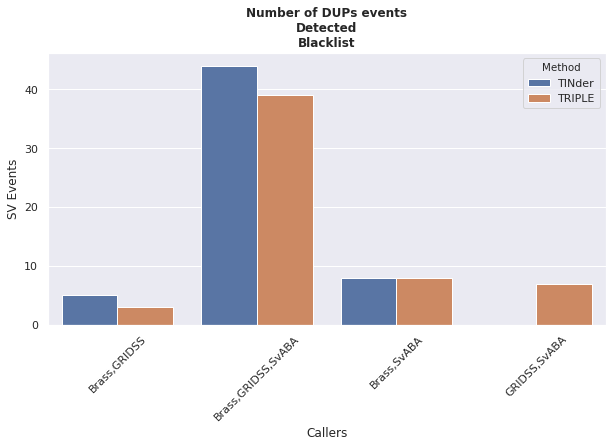

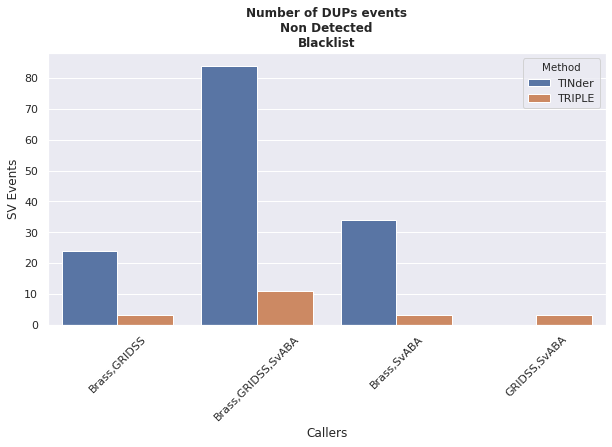

In [233]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot1_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DUPs events\nDetected\nBlacklist',weight='bold')
plt.xticks(rotation=45)
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot2_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DUPs events\nNon Detected\nBlacklist',weight='bold')
plt.xticks(rotation=45)
plt.show()

### C) Intersection Inversion:

In [234]:
tinder_full_set_INV=tinder_full_set_keys[tinder_full_set_keys['SV type']=='INV']
tinder_full_set_INV_2intersect=tinder_full_set_INV[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','keys']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_INV_2intersect['SV chrom']=tinder_full_set_INV_2intersect['SV chrom'].map(str)
tinder_full_set_INV_2intersect['SV length']=tinder_full_set_INV_2intersect['SV length'].map(int)
tinder_full_set_INV_2intersect['GD_AF']=tinder_full_set_INV_2intersect['GD_AF'].map(str)
tinder_full_set_INV_2intersect['GD_POPMAX_AF']=tinder_full_set_INV_2intersect['GD_POPMAX_AF'].map(str)
tinder_full_set_INV_2intersect['brass_PS']=tinder_full_set_INV_2intersect['brass_PS'].map(str)
tinder_full_set_INV_2intersect['gridss_VF']=tinder_full_set_INV_2intersect['gridss_VF'].map(str)
tinder_full_set_INV_2intersect['svaba_AD']=tinder_full_set_INV_2intersect['svaba_AD'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_INV_2intersect.shape)
tinder_full_set_INV_2intersect.head()

(325, 12)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01
36,11,4123049,4248897,125848,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,16,0,39,11_4123049_11_4248897_IID_H158605_T01_01_WG01
44,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1,-1.0,23,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01
46,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1,-1.0,35,54,51,14_106385364_14_106552284_IID_H158605_T01_01_WG01
53,3,50170156,50172449,2293,INV,IID_H158605_T01_01_WG01,-1,-1.0,43,57,0,3_50170156_3_50172449_IID_H158605_T01_01_WG01


In [235]:
triple_full_info_dup.head(2)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,14,9


In [236]:
triple_full_info_dup_INV=triple_full_info_dup[triple_full_info_dup['SV type']=='INV']
print(triple_full_info_dup_INV.shape)
triple_full_info_dup_INV.head()

(188, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,36,0
53,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,48,53
16,2,89160453,90249423,2_89160453_2_90249423_INV_++,INV,IID_H158609_T01_01_WG01,0,33,23
22,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26
319,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,30,41,29


In [237]:
triple_full_info_dup_INV_2intersect=triple_full_info_dup_INV.copy()
triple_full_info_dup_INV_2intersect['keys']=triple_full_info_dup_INV_2intersect['ID']+'_'+triple_full_info_dup_INV_2intersect['Sample']

triple_full_info_dup_INV_2intersect['to_index']=triple_full_info_dup_INV_2intersect['keys']
triple_full_info_dup_INV_2intersect.index = triple_full_info_dup_INV_2intersect['to_index']
triple_full_info_dup_INV_2intersect=triple_full_info_dup_INV_2intersect[['SV chrom','SV start','SV end','ID','SV type','Sample','brass_PS','gridss_VF','svaba_AD']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
triple_full_info_dup_INV_2intersect.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
to_index,,,,,,,,,
13_89110965_13_89112603_INV_--_IID_H158635_T01_01_WG01,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,36,0
7_142190647_7_142494053_INV_--_IID_H158635_T01_01_WG01,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,48,53
2_89160453_2_90249423_INV_++_IID_H158609_T01_01_WG01,2,89160453,90249423,2_89160453_2_90249423_INV_++,INV,IID_H158609_T01_01_WG01,0,33,23
2_11317205_2_49115205_INV_--_IID_H158625_T01_01_WG01,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26
2_34040568_2_57113494_INV_++_IID_H158625_T01_01_WG01,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,30,41,29


In [238]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(tinder_full_set_INV_2intersect.values.tolist())
list_bed_cytobands=BedTool(triple_full_info_dup_INV_2intersect.values.tolist())

I_inversions = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','size','SVtype','Sample','GD_AF','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','key','chr_band', 'start_band', 'end_band','ID','SV type','Sample.1','brass_PS.tr','gridss_VF.tr','svaba_AD.tr'])
#I = I[I.chr_band!="X"]
print(I_inversions.shape)
I_inversions.head()

(1448, 21)


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,gridss_VF.tr,svaba_AD.tr
0,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,23,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106328720,106330842,14_106328720_14_106330842_INV_++,INV,IID_H158607_T01_01_WG01,43,62,0
1,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,23,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106329450,106330073,14_106329450_14_106330073_INV_++,INV,IID_H158664_T01_01_WG01,23,37,25
2,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,23,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106329450,106385361,14_106329450_14_106385361_INV_++,INV,IID_H158605_T01_01_WG01,23,49,24
3,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,23,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106329471,106346912,14_106329471_14_106346912_INV_--,INV,IID_H158664_T01_01_WG01,14,24,24
4,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,23,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106329471,106368530,14_106329471_14_106368530_INV_--,INV,IID_H158639_T01_01_WG01,25,62,60


In [239]:
I_inversions_PATIENT=I_inversions[I_inversions['Sample']==I_inversions['Sample.1']]
I_inversions_PATIENT['keys']=I_inversions_PATIENT['chr_seg'].map(str)+'_'+I_inversions_PATIENT['start_seg'].map(str)+'_'+I_inversions_PATIENT['end_seg'].map(str)+'_'+I_inversions_PATIENT['Sample'].map(str)
print(I_inversions_PATIENT.shape)
print(len(I_inversions_PATIENT['keys'].unique()))
I_inversions_PATIENT.head()

(674, 22)
158


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
2,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.000000,-1.000000,23,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106329450,106385361,14_106329450_14_106385361_INV_++,INV,IID_H158605_T01_01_WG01,23,49,24,14_106329450_106385361_IID_H158605_T01_01_WG01
12,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1.000000,-1.000000,35,54,51,14_106385364_14_106552284_IID_H158605_T01_01_WG01,14,106385364,106552284,14_106385364_14_106552284_INV_--,INV,IID_H158605_T01_01_WG01,35,54,51,14_106385364_106552284_IID_H158605_T01_01_WG01
24,14,106328720,106330842,2122,INV,IID_H158607_T01_01_WG01,-1.000000,-1.000000,43,62,0,14_106328720_14_106330842_IID_H158607_T01_01_WG01,14,106328720,106330842,14_106328720_14_106330842_INV_++,INV,IID_H158607_T01_01_WG01,43,62,0,14_106328720_106330842_IID_H158607_T01_01_WG01
31,2,89197302,89214600,17298,INV,IID_H158608_T01_01_WG01,-1.000000,-1.000000,37,62,58,2_89197302_2_89214600_IID_H158608_T01_01_WG01,2,89197302,89214600,2_89197302_2_89214600_INV_--,INV,IID_H158608_T01_01_WG01,37,62,58,2_89197302_89214600_IID_H158608_T01_01_WG01
48,12,49472166,83299587,33827421,INV,IID_H158611_T01_01_WG01,0.000093,0.000132,10,23,22,12_49472166_12_83299587_IID_H158611_T01_01_WG01,12,49472166,83299587,12_49472166_12_83299587_INV_--,INV,IID_H158611_T01_01_WG01,0,23,22,12_49472166_83299587_IID_H158611_T01_01_WG01


- Overlapping of deletions around 70%:

In [240]:
I_inversions_PATIENT['start_seg']=I_inversions_PATIENT['start_seg'].astype(int)
I_inversions_PATIENT['end_seg']=I_inversions_PATIENT['end_seg'].astype(int)
I_inversions_PATIENT['start_band']=I_inversions_PATIENT['start_band'].astype(int)
I_inversions_PATIENT['end_band']=I_inversions_PATIENT['end_band'].astype(int) 

I_inversions_70_PATIENT=[]
for index,row in I_inversions_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_inversions_70_PATIENT.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_inversions_70_PATIENT.append(row)

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_inversions_70_PATIENT.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_inversions_70_PATIENT.append(row)
   

I_inversions_70_PATIENT=pd.DataFrame(I_inversions_70_PATIENT)
print(I_inversions_70_PATIENT.shape)
print(len(I_inversions_70_PATIENT['keys'].unique()))
I_inversions_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py

(378, 22)
148


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
2,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.000000,-1.000000,23,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106329450,106385361,14_106329450_14_106385361_INV_++,INV,IID_H158605_T01_01_WG01,23,49,24,14_106329450_106385361_IID_H158605_T01_01_WG01
12,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1.000000,-1.000000,35,54,51,14_106385364_14_106552284_IID_H158605_T01_01_WG01,14,106385364,106552284,14_106385364_14_106552284_INV_--,INV,IID_H158605_T01_01_WG01,35,54,51,14_106385364_106552284_IID_H158605_T01_01_WG01
24,14,106328720,106330842,2122,INV,IID_H158607_T01_01_WG01,-1.000000,-1.000000,43,62,0,14_106328720_14_106330842_IID_H158607_T01_01_WG01,14,106328720,106330842,14_106328720_14_106330842_INV_++,INV,IID_H158607_T01_01_WG01,43,62,0,14_106328720_106330842_IID_H158607_T01_01_WG01
31,2,89197302,89214600,17298,INV,IID_H158608_T01_01_WG01,-1.000000,-1.000000,37,62,58,2_89197302_2_89214600_IID_H158608_T01_01_WG01,2,89197302,89214600,2_89197302_2_89214600_INV_--,INV,IID_H158608_T01_01_WG01,37,62,58,2_89197302_89214600_IID_H158608_T01_01_WG01
48,12,49472166,83299587,33827421,INV,IID_H158611_T01_01_WG01,0.000093,0.000132,10,23,22,12_49472166_12_83299587_IID_H158611_T01_01_WG01,12,49472166,83299587,12_49472166_12_83299587_INV_--,INV,IID_H158611_T01_01_WG01,0,23,22,12_49472166_83299587_IID_H158611_T01_01_WG01


- Detected/NonDetected:

In [241]:
tinder_full_set_INV.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD,keys
9,14,49407635,14,49461451,53816,INV,NaN,-1,-1.0,IID_H158604_T01_01_WG01,21,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01


In [242]:
tinder_full_set_INV_DETECT=tinder_full_set_INV[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','keys']]
tinder_full_set_INV_DETECT.head()

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01
36,11,4123049,4248897,125848,INV,IID_H158605_T01_01_WG01,-1,-1.0,16,0,39,11_4123049_11_4248897_IID_H158605_T01_01_WG01
44,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1,-1.0,23,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01
46,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1,-1.0,35,54,51,14_106385364_14_106552284_IID_H158605_T01_01_WG01
53,3,50170156,50172449,2293,INV,IID_H158605_T01_01_WG01,-1,-1.0,43,57,0,3_50170156_3_50172449_IID_H158605_T01_01_WG01


In [243]:
detection=[]
for index,row in tinder_full_set_INV_DETECT.iterrows():
    if (str(row['keys']) in I_inversions_70_PATIENT['key'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
tinder_full_set_INV_DETECT['Detection']=detection
tinder_full_set_INV_DETECT[tinder_full_set_INV_DETECT['Detection']=='Non Detected'].head()

325


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01,Non Detected
36,11,4123049,4248897,125848,INV,IID_H158605_T01_01_WG01,-1,-1.0,16,0,39,11_4123049_11_4248897_IID_H158605_T01_01_WG01,Non Detected
53,3,50170156,50172449,2293,INV,IID_H158605_T01_01_WG01,-1,-1.0,43,57,0,3_50170156_3_50172449_IID_H158605_T01_01_WG01,Non Detected
54,3,50170169,50171891,1722,INV,IID_H158605_T01_01_WG01,-1,-1.0,46,63,63,3_50170169_3_50171891_IID_H158605_T01_01_WG01,Non Detected
67,9,12014638,12200280,185642,INV,IID_H158605_T01_01_WG01,-1,-1.0,47,68,65,9_12014638_9_12200280_IID_H158605_T01_01_WG01,Non Detected


In [244]:
print(tinder_full_set_DUP_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_INV_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(206, 14)
148 177


In [245]:
#Joe
tinder_full_set_INV_DETECT.to_csv('/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_INV_DETECT.tsv','\t')

In [397]:
#For chr distrib plot
tinder_full_set_INV_DETECT.to_csv('/work/isabl/home/gutierj2/uk_all/chr_distrib/tinder_full_set_INV_DETECT.tsv','\t')

### 1.2) Precision: TripleCaller calls in TINder: yellow and green areas

In [246]:
tinder_full_set.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
2,10,120303654,10,120305644,1990,DUP,NaN,-1,-1.0,IID_H158604_T01_01_WG01,30,62,36


In [247]:
tinder_full_set_INV=tinder_full_set[tinder_full_set['SV type']=='INV']
tinder_full_set_INV_2intersect=tinder_full_set_INV[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_INV_2intersect['SV length']=tinder_full_set_INV_2intersect['SV length'].map(int)
tinder_full_set_INV_2intersect['GD_AF']=tinder_full_set_INV_2intersect['GD_AF'].map(str)
tinder_full_set_INV_2intersect['GD_POPMAX_AF']=tinder_full_set_INV_2intersect['GD_POPMAX_AF'].map(str)
tinder_full_set_INV_2intersect['brass_PS']=tinder_full_set_INV_2intersect['brass_PS'].map(str)
tinder_full_set_INV_2intersect['gridss_VF']=tinder_full_set_INV_2intersect['gridss_VF'].map(str)
tinder_full_set_INV_2intersect['svaba_AD']=tinder_full_set_INV_2intersect['svaba_AD'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_INV_2intersect.shape)
tinder_full_set_INV_2intersect.head()

(325, 11)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,40,40
36,11,4123049,4248897,125848,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,16,0,39
44,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1,-1.0,23,49,24
46,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1,-1.0,35,54,51
53,3,50170156,50172449,2293,INV,IID_H158605_T01_01_WG01,-1,-1.0,43,57,0


In [248]:
tinder_full_set_INV_2intersect
#keys
keys=[]
for index,row in tinder_full_set_INV_2intersect.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV start2'])+'_'+row['Sample'])
tinder_full_set_INV_2intersect['keys']=keys
tinder_full_set_INV_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,40,40,14_49407635_49461451_IID_H158604_T01_01_WG01
36,11,4123049,4248897,125848,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,16,0,39,11_4123049_4248897_IID_H158605_T01_01_WG01
44,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1,-1.0,23,49,24,14_106329450_106385361_IID_H158605_T01_01_WG01
46,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1,-1.0,35,54,51,14_106385364_106552284_IID_H158605_T01_01_WG01
53,3,50170156,50172449,2293,INV,IID_H158605_T01_01_WG01,-1,-1.0,43,57,0,3_50170156_50172449_IID_H158605_T01_01_WG01


In [249]:
tinder_full_set_INV_2intersect2=tinder_full_set_INV_2intersect.copy()
tinder_full_set_INV_2intersect2['to_index']=tinder_full_set_INV_2intersect['keys']
tinder_full_set_INV_2intersect2.index = tinder_full_set_INV_2intersect2['to_index']
tinder_full_set_INV_2intersect2=tinder_full_set_INV_2intersect2[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','keys']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
tinder_full_set_INV_2intersect2.head()

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
to_index,,,,,,,,,,,
14_49407635_49461451_IID_H158604_T01_01_WG01,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1.0,21,40,40,14_49407635_49461451_IID_H158604_T01_01_WG01
11_4123049_4248897_IID_H158605_T01_01_WG01,11,4123049,4248897,125848,INV,IID_H158605_T01_01_WG01,-1.0,16,0,39,11_4123049_4248897_IID_H158605_T01_01_WG01
14_106329450_106385361_IID_H158605_T01_01_WG01,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.0,23,49,24,14_106329450_106385361_IID_H158605_T01_01_WG01
14_106385364_106552284_IID_H158605_T01_01_WG01,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1.0,35,54,51,14_106385364_106552284_IID_H158605_T01_01_WG01
3_50170156_50172449_IID_H158605_T01_01_WG01,3,50170156,50172449,2293,INV,IID_H158605_T01_01_WG01,-1.0,43,57,0,3_50170156_50172449_IID_H158605_T01_01_WG01


In [250]:
print(triple_full_info_dup_INV.shape)
triple_full_info_dup_INV.head(2)

(188, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,36,0
53,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,48,53


In [251]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_INV.values.tolist())
list_bed_cytobands=BedTool(tinder_full_set_INV_2intersect2.values.tolist())

I_inversions_TC = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg', 'end_seg','ID','SV type','Sample','brass_PS','gridss_VF','svaba_AD','chr_band', 'start_band','end_band','size','SVtype','Sample.1','GD_POPMAX_AF','brass_PS.tr','gridss_VF.tr','svaba_AD.tr','keys'])
#I = I[I.chr_band!="X"]
print(I_inversions_TC.shape)
I_inversions_TC.head()

(1448, 20)


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
0,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,36,0,13,38261788,98014550,59752762,INV,IID_H158646_T01_01_WG01,-1.0,33,51,51,13_38261788_98014550_IID_H158646_T01_01_WG01
1,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,36,0,13,45063390,97452941,52389551,INV,IID_H158663_T01_01_WG01,-1.0,10,13,10,13_45063390_97452941_IID_H158663_T01_01_WG01
2,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,48,53,7,142190647,142494053,303406,INV,IID_H158635_T01_01_WG01,-1.0,38,48,53,7_142190647_142494053_IID_H158635_T01_01_WG01
3,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,48,53,7,142247111,142495143,248032,INV,IID_H158663_T01_01_WG01,-1.0,15,22,17,7_142247111_142495143_IID_H158663_T01_01_WG01
4,2,89160453,90249423,2_89160453_2_90249423_INV_++,INV,IID_H158609_T01_01_WG01,0,33,23,2,89475816,89478555,2739,INV,IID_H158642_T01_01_WG01,-1.0,24,0,42,2_89475816_89478555_IID_H158642_T01_01_WG01


In [252]:
I_inversions_TC_PATIENT=I_inversions_TC[I_inversions_TC['Sample']==I_inversions_TC['Sample.1']]
I_inversions_TC_PATIENT['keys']=I_inversions_TC_PATIENT['chr_seg'].map(str)+'_'+I_inversions_TC_PATIENT['start_seg'].map(str)+'_'+I_inversions_TC_PATIENT['end_seg'].map(str)+'_'+I_inversions_TC_PATIENT['Sample'].map(str)
print(I_inversions_TC_PATIENT.shape)
print(len(I_inversions_TC_PATIENT['keys'].unique()))
I_inversions_TC_PATIENT.head()

(674, 20)
152


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
2,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,48,53,7,142190647,142494053,303406,INV,IID_H158635_T01_01_WG01,-1.000000,38,48,53,7_142190647_142494053_IID_H158635_T01_01_WG01
25,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26,2,11317205,49115205,37798000,INV,IID_H158625_T01_01_WG01,-1.000000,17,28,26,2_11317205_49115205_IID_H158625_T01_01_WG01
26,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26,2,34040566,57113494,23072928,INV,IID_H158625_T01_01_WG01,0.000105,30,41,30,2_11317205_49115205_IID_H158625_T01_01_WG01
29,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,30,41,29,2,53583899,57312212,3728313,INV,IID_H158625_T01_01_WG01,-1.000000,61,73,73,2_34040568_57113494_IID_H158625_T01_01_WG01
30,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,30,41,29,2,11317205,49115205,37798000,INV,IID_H158625_T01_01_WG01,-1.000000,17,28,26,2_34040568_57113494_IID_H158625_T01_01_WG01


- Overlapping of deletions around 70%:

In [253]:
I_inversions_TC_PATIENT['start_seg']=I_inversions_TC_PATIENT['start_seg'].astype(int)
I_inversions_TC_PATIENT['end_seg']=I_inversions_TC_PATIENT['end_seg'].astype(int)
I_inversions_TC_PATIENT['start_band']=I_inversions_TC_PATIENT['start_band'].astype(int)
I_inversions_TC_PATIENT['end_band']=I_inversions_TC_PATIENT['end_band'].astype(int) 

I_inversions_TC_70_PATIENT=[]
for index,row in I_inversions_TC_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_inversions_TC_70_PATIENT.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_inversions_TC_70_PATIENT.append(row)

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_inversions_TC_70_PATIENT.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_inversions_TC_70_PATIENT.append(row)
   

I_inversions_TC_70_PATIENT=pd.DataFrame(I_inversions_TC_70_PATIENT)
print(I_inversions_TC_70_PATIENT.shape)
print(len(I_inversions_TC_70_PATIENT['keys'].unique()))
I_inversions_TC_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py

(389, 20)
149


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,gridss_VF.tr,svaba_AD.tr,keys
2,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,48,53,7,142190647,142494053,303406,INV,IID_H158635_T01_01_WG01,-1.000000,38,48,53,7_142190647_142494053_IID_H158635_T01_01_WG01
25,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26,2,11317205,49115205,37798000,INV,IID_H158625_T01_01_WG01,-1.000000,17,28,26,2_11317205_49115205_IID_H158625_T01_01_WG01
31,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,30,41,29,2,34040566,57113494,23072928,INV,IID_H158625_T01_01_WG01,0.000105,30,41,30,2_34040568_57113494_IID_H158625_T01_01_WG01
31,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,30,41,29,2,34040566,57113494,23072928,INV,IID_H158625_T01_01_WG01,0.000105,30,41,30,2_34040568_57113494_IID_H158625_T01_01_WG01
37,2,53583898,57312212,2_53583898_2_57312212_INV_--,INV,IID_H158625_T01_01_WG01,61,73,73,2,34040566,57113494,23072928,INV,IID_H158625_T01_01_WG01,0.000105,30,41,30,2_53583898_57312212_IID_H158625_T01_01_WG01


- Detected/NonDetected:

In [254]:
triple_full_info_dup_INV_DETECT=triple_full_info_dup_INV.copy()
keys=[]
for index,row in triple_full_info_dup_INV_DETECT.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV end'])+'_'+row['Sample'])
triple_full_info_dup_INV_DETECT['keys']=keys

In [255]:
detection=[]
for index,row in triple_full_info_dup_INV_DETECT.iterrows():
    if (str(row['keys']) in I_inversions_TC_70_PATIENT['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
triple_full_info_dup_INV_DETECT['Detection']=detection
triple_full_info_dup_INV_DETECT[triple_full_info_dup_INV_DETECT['Detection']=='Detected'].head(10)

188


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
53,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,48,53,7_142190647_142494053_IID_H158635_T01_01_WG01,Detected
22,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26,2_11317205_49115205_IID_H158625_T01_01_WG01,Detected
319,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,30,41,29,2_34040568_57113494_IID_H158625_T01_01_WG01,Detected
482,2,53583898,57312212,2_53583898_2_57312212_INV_--,INV,IID_H158625_T01_01_WG01,61,73,73,2_53583898_57312212_IID_H158625_T01_01_WG01,Detected
616,9,21192521,31921207,9_21192521_9_31921207_INV_++,INV,IID_H158625_T01_01_WG01,61,77,63,9_21192521_31921207_IID_H158625_T01_01_WG01,Detected
663,9,32344735,32531333,9_32344735_9_32531333_INV_--,INV,IID_H158625_T01_01_WG01,77,92,88,9_32344735_32531333_IID_H158625_T01_01_WG01,Detected
17,2,89197302,89214600,2_89197302_2_89214600_INV_--,INV,IID_H158608_T01_01_WG01,37,62,58,2_89197302_89214600_IID_H158608_T01_01_WG01,Detected
0,14,54008865,60182797,14_54008865_14_60182797_INV_++,INV,IID_H158618_T01_01_WG01,39,69,45,14_54008865_60182797_IID_H158618_T01_01_WG01,Detected
96,5,151776042,163025157,5_151776042_5_163025157_INV_++,INV,IID_H158618_T01_01_WG01,46,57,0,5_151776042_163025157_IID_H158618_T01_01_WG01,Detected
169,5,151776042,163025158,5_151776042_5_163025158_INV_--,INV,IID_H158618_T01_01_WG01,59,83,81,5_151776042_163025158_IID_H158618_T01_01_WG01,Detected


In [231]:
print(triple_full_info_dup_INV_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_INV_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(188, 11)
149 39


In [232]:
print(tinder_full_set_INV_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_INV_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(325, 13)
148 177


In [257]:
#Joe
triple_full_info_dup_INV_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/joe_files_svs/triple_full_info_dup_INV_DETECT.tsv',sep='\t')

In [396]:
#For chr distrib plot
triple_full_info_dup_INV_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/chr_distrib/triple_full_info_dup_INV_DETECT.tsv',sep='\t')

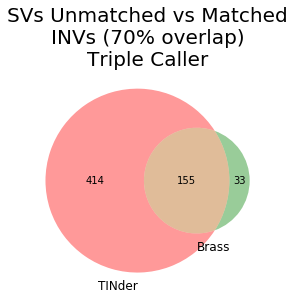

In [621]:
venn2(subsets = (414,33,155), set_labels = ('TINder', 'Brass'))
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nINVs (70% overlap)\nTriple Caller',fontsize=20)
plt.show()

- Scores: 
    - 216/414 (52%) in only TINder and 143/155 (92%) in common have brass>10 in TINder.
    - 31/33 (93%) in only Triple and 151/155 (97%) in common have at least one caller with score>10.
    - 5/33 (15%) in only Triple and 67/155 (43%) in common have  brass>10 in Triple.

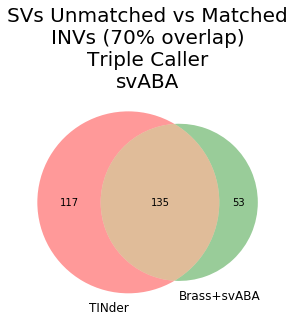

In [169]:
venn2(subsets = (117,53,135), set_labels = ('TINder', 'Brass+svABA'))
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nINVs (70% overlap)\nTriple Caller\nsvABA',fontsize=20)
plt.show()

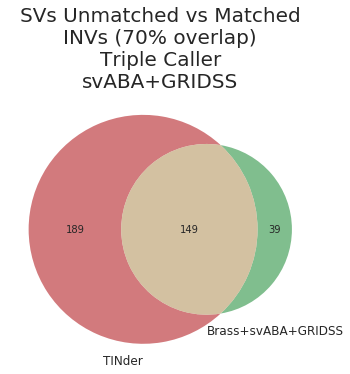

In [291]:
venn2(subsets = (189,39,149), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nINVs (70% overlap)\nTriple Caller\nsvABA+GRIDSS',fontsize=20)
plt.show()

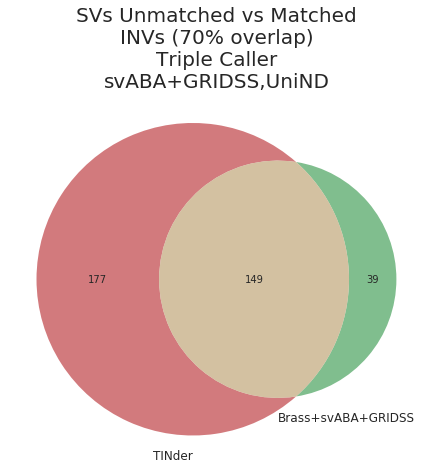

In [234]:
venn2(subsets = (177,39,149), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nINVs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND',fontsize=20)
plt.show()

- green area:

In [258]:
triple_full_info_dup_INV_DETECT_check=triple_full_info_dup_INV_DETECT[~((triple_full_info_dup_INV_DETECT['SV chrom']=='X') | (triple_full_info_dup_INV_DETECT['SV chrom']=='Y'))]

triple_full_info_dup_INV_DETECT_check['SV start']=triple_full_info_dup_INV_DETECT_check['SV start'].map(int)
triple_full_info_dup_INV_DETECT_check['SV chrom']=triple_full_info_dup_INV_DETECT_check['SV chrom'].map(int)

triple_full_info_dup_INV_DETECT_check[triple_full_info_dup_INV_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,4,1,44059311,44059954,1_44059311_1_44059954_INV_--,INV,IID_H158650_T01_01_WG01,0,44,17,1_44059311_44059954_IID_H158650_T01_01_WG01,Non Detected
1,7,2,89132272,89185668,2_89132272_2_89185668_INV_++,INV,IID_H158621_T01_01_WG01,5,8,0,2_89132272_89185668_IID_H158621_T01_01_WG01,Non Detected
2,15,2,89132284,89185668,2_89132284_2_89185668_INV_++,INV,IID_H158608_T01_01_WG01,51,72,50,2_89132284_89185668_IID_H158608_T01_01_WG01,Non Detected
3,126,2,89159117,89185672,2_89159117_2_89185672_INV_++,INV,IID_H158649_T01_01_WG01,20,31,16,2_89159117_89185672_IID_H158649_T01_01_WG01,Non Detected
4,91,2,89159145,89185704,2_89159145_2_89185704_INV_++,INV,IID_H158618_T01_01_WG01,0,16,12,2_89159145_89185704_IID_H158618_T01_01_WG01,Non Detected
5,516,2,89160435,89197304,2_89160435_2_89197304_INV_--,INV,IID_H158625_T01_01_WG01,48,79,67,2_89160435_89197304_IID_H158625_T01_01_WG01,Non Detected
6,16,2,89160453,90249423,2_89160453_2_90249423_INV_++,INV,IID_H158609_T01_01_WG01,0,33,23,2_89160453_90249423_IID_H158609_T01_01_WG01,Non Detected
7,517,2,89160764,89185671,2_89160764_2_89185671_INV_++,INV,IID_H158625_T01_01_WG01,15,65,35,2_89160764_89185671_IID_H158625_T01_01_WG01,Non Detected
8,8,2,89160770,89185670,2_89160770_2_89185670_INV_++,INV,IID_H158621_T01_01_WG01,25,38,22,2_89160770_89185670_IID_H158621_T01_01_WG01,Non Detected
9,8,2,89160984,89197302,2_89160984_2_89197302_INV_++,INV,IID_H158640_T01_01_WG01,11,17,9,2_89160984_89197302_IID_H158640_T01_01_WG01,Non Detected


- red area:

In [259]:
tinder_full_set_INV_DETECT_check=tinder_full_set_INV_DETECT[~((tinder_full_set_INV_DETECT['SV chrom']=='X') | (tinder_full_set_INV_DETECT['SV chrom']=='Y'))]

tinder_full_set_INV_DETECT_check['SV start']=tinder_full_set_INV_DETECT_check['SV start'].map(int)
tinder_full_set_INV_DETECT_check['SV chrom']=tinder_full_set_INV_DETECT_check['SV chrom'].map(int)

tinder_full_set_INV_DETECT_check[tinder_full_set_INV_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,1099,1,46868353,46889690,21337,INV,IID_H158624_T01_01_WG01,4.7e-05,0.000449,63,75,62,1_46868353_1_46889690_IID_H158624_T01_01_WG01,Non Detected
1,1100,1,46868805,46899619,30814,INV,IID_H158624_T01_01_WG01,4.7e-05,0.000449,53,67,47,1_46868805_1_46899619_IID_H158624_T01_01_WG01,Non Detected
2,386,1,80411505,80473110,61605,INV,IID_H158613_T01_01_WG01,4.70000013592653e-05,0.000449,14,21,14,1_80411505_1_80473110_IID_H158613_T01_01_WG01,Non Detected
3,1630,1,114846413,114847249,836,INV,IID_H158634_T01_01_WG01,-1,-1.000000,48,73,0,1_114846413_1_114847249_IID_H158634_T01_01_WG01,Non Detected
4,526,1,209431760,209438696,6936,INV,IID_H158615_T01_01_WG01,-1,-1.000000,50,72,48,1_209431760_1_209438696_IID_H158615_T01_01_WG01,Non Detected
5,527,1,209438059,209452512,14453,INV,IID_H158615_T01_01_WG01,-1,-1.000000,51,64,62,1_209438059_1_209452512_IID_H158615_T01_01_WG01,Non Detected
6,1794,1,238509143,248400237,9891094,INV,IID_H158636_T01_01_WG01,-1,-1.000000,31,37,29,1_238509143_1_248400237_IID_H158636_T01_01_WG01,Non Detected
7,2507,2,12725463,12728038,2575,INV,IID_H158648_T01_01_WG01,-1,-1.000000,44,61,60,2_12725463_2_12728038_IID_H158648_T01_01_WG01,Non Detected
8,2508,2,12725885,12727003,1118,INV,IID_H158648_T01_01_WG01,-1,-1.000000,33,58,32,2_12725885_2_12727003_IID_H158648_T01_01_WG01,Non Detected
9,1191,2,34040566,57113494,23072928,INV,IID_H158625_T01_01_WG01,4.70000013592653e-05,0.000105,30,41,30,2_34040566_2_57113494_IID_H158625_T01_01_WG01,Non Detected


#### - Brass score >10:

In [260]:
print(tinder_full_set_INV_DETECT.shape)
tinder_full_set_INV_DETECT.head(1)

(325, 13)


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01,Non Detected


In [261]:
tinder_full_set_INV_DETECT_score=tinder_full_set_INV_DETECT[tinder_full_set_INV_DETECT['brass_PS']>=10]
print(tinder_full_set_INV_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_INV_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(295, 13)
133 162


In [262]:
print(triple_full_info_dup_INV_DETECT.shape)
triple_full_info_dup_INV_DETECT.head(1)

(188, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,36,0,13_89110965_89112603_IID_H158635_T01_01_WG01,Non Detected


In [263]:
triple_full_info_dup_INV_DETECT['brass_PS']=triple_full_info_dup_INV_DETECT['brass_PS'].map(int)
triple_full_info_dup_INV_DETECT['gridss_VF']=triple_full_info_dup_INV_DETECT['gridss_VF'].map(int)
triple_full_info_dup_INV_DETECT['svaba_AD']=triple_full_info_dup_INV_DETECT['svaba_AD'].map(int)

triple_full_info_dup_INV_DETECT_score=triple_full_info_dup_INV_DETECT[(triple_full_info_dup_INV_DETECT['brass_PS']>=10) | (triple_full_info_dup_INV_DETECT['gridss_VF']>=10) | (triple_full_info_dup_INV_DETECT['svaba_AD']>=10)]

print(triple_full_info_dup_INV_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_INV_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(183, 11)
146 37


In [264]:
triple_full_info_dup_INV_DETECT['brass_PS']=triple_full_info_dup_INV_DETECT['brass_PS'].map(int)
#triple_full_info_dup_DEL_DETECT['gridss_VF']=triple_full_info_dup_DEL_DETECT['gridss_VF'].map(int)
#triple_full_info_dup_DEL_DETECT['svaba_AD']=triple_full_info_dup_DEL_DETECT['svaba_AD'].map(int)

triple_full_info_dup_INV_DETECT_scorebrass=triple_full_info_dup_INV_DETECT[(triple_full_info_dup_INV_DETECT['brass_PS']>=10)]

print(triple_full_info_dup_INV_DETECT_scorebrass.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_INV_DETECT_scorebrass.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(148, 11)
121 27


#### - Sizes:

In [265]:
tinder_full_set_INV_DETECT.head(1)

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01,Non Detected


In [266]:
tinder_full_set_INV_DETECT_size=tinder_full_set_INV_DETECT.copy()
tinder_full_set_INV_DETECT_size['SV length']=tinder_full_set_INV_DETECT_size['SV length'].map(int)

triple_full_info_dup_INV_DETECT_size=triple_full_info_dup_INV_DETECT.copy()
triple_full_info_dup_INV_DETECT_size['SV length']=triple_full_info_dup_INV_DETECT_size['SV end']-triple_full_info_dup_INV_DETECT_size['SV start']

In [267]:
onlyTINder_INVs=tinder_full_set_INV_DETECT_size[tinder_full_set_INV_DETECT_size['Detection']=='Non Detected']
common_INVs=tinder_full_set_INV_DETECT_size[tinder_full_set_INV_DETECT_size['Detection']=='Detected']
onlyTRIPLE_INVs=triple_full_info_dup_INV_DETECT_size[triple_full_info_dup_INV_DETECT_size['Detection']=='Non Detected']

In [268]:
#TINder
average_size=sum(onlyTINder_INVs['SV length'])/len(onlyTINder_INVs['SV length'])
print('onlyTINDER_DELs Size average\t',average_size)

#BTG
average_size=sum(onlyTRIPLE_INVs['SV length'])/len(onlyTRIPLE_INVs['SV length'])
print('onlyTRIPLE_DELs Size average\t',average_size)

#Common
average_size=sum(common_INVs['SV length'])/len(common_INVs['SV length'])
print('common_DELs Size average\t',average_size)

onlyTINDER_DELs Size average	 3210691.4915254237
onlyTRIPLE_DELs Size average	 3951706.128205128
common_DELs Size average	 17887144.891891893


In [269]:
sizes_TINder_df=pd.DataFrame(onlyTINder_INVs,columns=['SV length'])
sizes_TINder_df['Group']='TINder'

sizes_TRIPLE_df=pd.DataFrame(onlyTRIPLE_INVs,columns=['SV length'])
sizes_TRIPLE_df['Group']='TRIPLE'

sizes_COMMON_df=pd.DataFrame(common_INVs,columns=['SV length'])
sizes_COMMON_df['Group']='COMMON'

In [270]:
sizes_TOTAL_df=sizes_TINder_df.copy()
sizes_TOTAL_df=sizes_TOTAL_df.append(sizes_TRIPLE_df,ignore_index=True)
sizes_TOTAL_df=sizes_TOTAL_df.append(sizes_COMMON_df,ignore_index=True)
#sizes_TOTAL_df

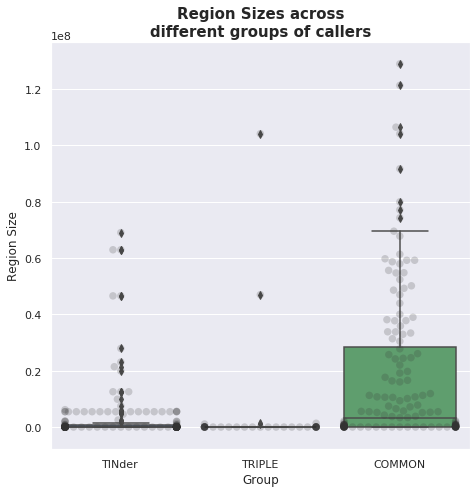

In [271]:
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='SV length', data=sizes_TOTAL_df,order=['TINder','TRIPLE','COMMON'])
ax = sns.swarmplot(x='Group',y='SV length',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['TINder','TRIPLE','COMMON'])
ax.set_title('Region Sizes across\ndifferent groups of callers',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

# - Caller Combinations:

In [273]:
tinder_full_set_INV_DETECT
triple_full_info_dup_INV_DETECT

In [274]:
print(tinder_full_set_INV_DETECT.shape)
tinder_full_set_INV_DETECT.head(1)

(325, 13)


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01,Non Detected


In [275]:
print(triple_full_info_dup_INV_DETECT.shape)
triple_full_info_dup_INV_DETECT.head(1)

(188, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,36,0,13_89110965_89112603_IID_H158635_T01_01_WG01,Non Detected


In [276]:
#Function to apply calls from SV-detectors
def label_caller (row):
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])>0)):
        return 'Brass,GRIDSS,SvABA'
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])==0)):
        return 'Brass,GRIDSS'
    if ((int(row['brass_PS'])>0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])==0)):
        return 'Brass,SvABA'
    if ((int(row['brass_PS'])==0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])>0)):
        return 'GRIDSS,SvABA'

In [277]:
tinder_full_set_INV_DETECT['Callers']=tinder_full_set_INV_DETECT.apply(lambda row: label_caller(row), axis=1)
triple_full_info_dup_INV_DETECT['Callers']=triple_full_info_dup_INV_DETECT.apply(lambda row: label_caller(row), axis=1)

- TINder :

In [278]:
countsTIN=tinder_full_set_INV_DETECT.groupby(['Detection','Callers']).size()
countsTIN=pd.DataFrame(countsTIN).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTIN.columns = ['SV Events TINder']
countsTIN

SV Events TINder
Detection    Callers                             
Non Detected Brass,SvABA                       62
             Brass,GRIDSS,SvABA                88
             Brass,GRIDSS                      27
Detected     Brass,SvABA                       14
             Brass,GRIDSS,SvABA               116
             Brass,GRIDSS                      18

- TRIPLE:

In [279]:
countsTRI=triple_full_info_dup_INV_DETECT.groupby(['Detection','Callers']).size()
countsTRI=pd.DataFrame(countsTRI).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTRI.columns = ['SV Events TRIPLE']
countsTRI

SV Events TRIPLE
Detection    Callers                             
Non Detected GRIDSS,SvABA                       7
             Brass,SvABA                       10
             Brass,GRIDSS,SvABA                14
             Brass,GRIDSS                       8
Detected     GRIDSS,SvABA                      20
             Brass,SvABA                       10
             Brass,GRIDSS,SvABA               107
             Brass,GRIDSS                      12

In [280]:
comb=pd.concat([countsTIN, countsTRI], axis=1, sort=False)
comb['SV Events TINder']=countsTIN['SV Events TINder'].map(str)
comb['SV Events TRIPLE']=countsTRI['SV Events TRIPLE'].map(str)
comb

SV Events TINder SV Events TRIPLE
Detection    Callers                                             
Detected     Brass,GRIDSS                     18               12
             Brass,GRIDSS,SvABA              116              107
             Brass,SvABA                      14               10
             GRIDSS,SvABA                    NaN               20
Non Detected Brass,GRIDSS                     27                8
             Brass,GRIDSS,SvABA               88               14
             Brass,SvABA                      62               10
             GRIDSS,SvABA                    NaN                7

In [281]:
#Detected
comb_plot1=comb.loc['Detected']
comb_plot1['Detection']='Detected'
comb_plot1_TIN=comb_plot1[['SV Events TINder','Detection']]
comb_plot1_TIN.columns=['SV Events','Detection']
comb_plot1_TIN['Method']='TINder'
comb_plot1_TRI=comb_plot1[['SV Events TRIPLE','Detection']]
comb_plot1_TRI.columns=['SV Events','Detection']
comb_plot1_TRI['Method']='TRIPLE'
comb_plot1_plot=pd.concat([comb_plot1_TIN, comb_plot1_TRI], axis=0, sort=False)
comb_plot1_plot=comb_plot1_plot.fillna(0)
comb_plot1_plot['Callers']=comb_plot1_plot.index
comb_plot1_plot['SV Events']=comb_plot1_plot['SV Events'].map(int)

#Non Detected
comb_plot2=comb.loc['Non Detected']
comb_plot2['Detection']='Non Detected'
comb_plot2_TIN=comb_plot2[['SV Events TINder','Detection']]
comb_plot2_TIN.columns=['SV Events','Detection']
comb_plot2_TIN['Method']='TINder'
comb_plot2_TRI=comb_plot2[['SV Events TRIPLE','Detection']]
comb_plot2_TRI.columns=['SV Events','Detection']
comb_plot2_TRI['Method']='TRIPLE'
comb_plot2_plot=pd.concat([comb_plot2_TIN, comb_plot2_TRI], axis=0, sort=False)
comb_plot2_plot=comb_plot2_plot.fillna(0)
comb_plot2_plot['Callers']=comb_plot2_plot.index
comb_plot2_plot['SV Events']=comb_plot2_plot['SV Events'].map(int)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


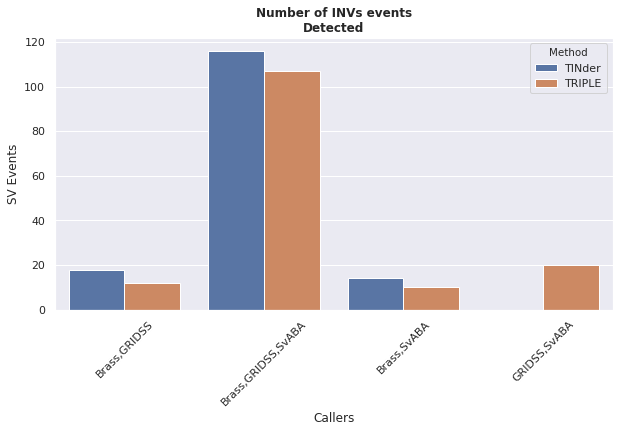

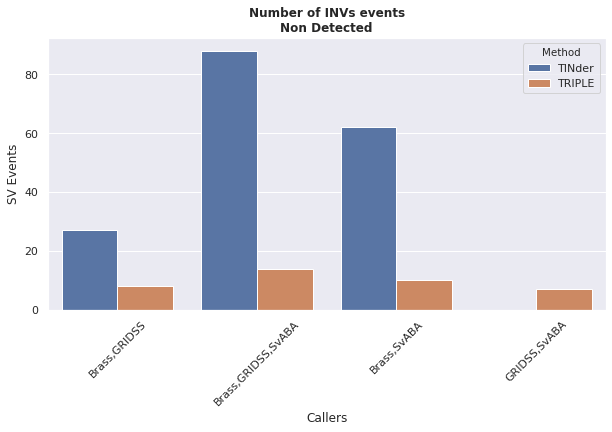

In [282]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot1_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of INVs events\nDetected',weight='bold')
plt.xticks(rotation=45)
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot2_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of INVs events\nNon Detected',weight='bold')
plt.xticks(rotation=45)
plt.show()

### D) Intersection Translocations:

### 1.1) TINder calls in TRIPLE CALLER.

In [292]:
tinder_full_set_TRA=tinder_full_set[tinder_full_set['SV type']=='TRA']
print(tinder_full_set_TRA.shape)
tinder_full_set_TRA.head()

(328, 13)


,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
5,12,6791754,22,41528146,NaN,TRA,ZNF384,-1,-1.0,IID_H158604_T01_01_WG01,45,60,43
20,3,57440299,6,56757781,NaN,TRA,DNAH12,-1,-1.0,IID_H158604_T01_01_WG01,33,37,32
22,6,29814678,12,133066751,NaN,TRA,NaN,-1,-1.0,IID_H158604_T01_01_WG01,15,21,18
26,7,30484963,X,133854098,NaN,TRA,NOD1,-1,-1.0,IID_H158604_T01_01_WG01,6,0,11
117,8,66514692,11,55053049,NaN,TRA,ARMC1,-1,-1.0,IID_H158606_T01_01_WG01,22,0,21


In [293]:
#Formatting
tinder_full_set_TRA_only=pd.DataFrame(columns=['SV chrom','SV start','SV chrom2','SV start2','SV type','GD_AF','GD_POPMAX_AF','Sample','Gene name','brass_PS','gridss_VF','svaba_AD'])
dict_keys={}
list_keys=[]
for index,row in tinder_full_set_TRA.iterrows():
    #Sex
    if( (row['SV chrom']=='X') | (row['SV chrom2']=='X') | (row['SV chrom']=='Y') | (row['SV chrom2']=='Y')):
        if( (row['SV chrom']=='X') | (row['SV chrom']=='Y') ):
            key=str(row['SV chrom2'])+'_'+str(row['SV chrom2'])+'_'+str(row['SV chrom'])+'_'+str(row['SV chrom'])+'_'+row['Sample']
        else:
            key=str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV chrom2'])+'_'+str(row['SV start2'])+'_'+row['Sample']
    else:   
        if (int(row['SV chrom'])<int(row['SV chrom2'])):
            key=str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV chrom2'])+'_'+str(row['SV start2'])+'_'+row['Sample']
        else:
            key=str(row['SV chrom2'])+'_'+str(row['SV start2'])+'_'+str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+row['Sample']
    
    
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        tinder_full_set_TRA_only=tinder_full_set_TRA_only.append(row)
        list_keys.append(key)

tinder_full_set_TRA_only=tinder_full_set_TRA_only[['SV chrom','SV start','SV chrom2','SV start2','SV type','GD_AF','GD_POPMAX_AF','Sample','Gene name','brass_PS','gridss_VF','svaba_AD']]
tinder_full_set_TRA_only['keys']=list_keys       

In [294]:
print(tinder_full_set_TRA_only.shape)
tinder_full_set_TRA_only.head()

(328, 13)


,SV chrom,SV start,SV chrom2,SV start2,SV type,GD_AF,GD_POPMAX_AF,Sample,Gene name,brass_PS,gridss_VF,svaba_AD,keys
5,12,6791754,22,41528146,TRA,-1,-1.0,IID_H158604_T01_01_WG01,ZNF384,45,60,43,12_6791754_22_41528146_IID_H158604_T01_01_WG01
20,3,57440299,6,56757781,TRA,-1,-1.0,IID_H158604_T01_01_WG01,DNAH12,33,37,32,3_57440299_6_56757781_IID_H158604_T01_01_WG01
22,6,29814678,12,133066751,TRA,-1,-1.0,IID_H158604_T01_01_WG01,NaN,15,21,18,6_29814678_12_133066751_IID_H158604_T01_01_WG01
26,7,30484963,X,133854098,TRA,-1,-1.0,IID_H158604_T01_01_WG01,NOD1,6,0,11,7_30484963_X_133854098_IID_H158604_T01_01_WG01
117,8,66514692,11,55053049,TRA,-1,-1.0,IID_H158606_T01_01_WG01,ARMC1,22,0,21,8_66514692_11_55053049_IID_H158606_T01_01_WG01


In [295]:
#Lower chromosome always in the first column:
tinder_full_set_TRA_only_order=tinder_full_set_TRA_only.copy()

#Separate Sex
tinder_full_set_TRA_only_orderNum=tinder_full_set_TRA_only_order[~ ((tinder_full_set_TRA_only_order['SV chrom']=='X')|(tinder_full_set_TRA_only_order['SV chrom']=='Y')| (tinder_full_set_TRA_only_order['SV chrom2']=='X')|(tinder_full_set_TRA_only_order['SV chrom2']=='Y') )]
tinder_full_set_TRA_only_orderSex=tinder_full_set_TRA_only_order[((tinder_full_set_TRA_only_order['SV chrom']=='X')|(tinder_full_set_TRA_only_order['SV chrom']=='Y')| (tinder_full_set_TRA_only_order['SV chrom2']=='X')|(tinder_full_set_TRA_only_order['SV chrom2']=='Y') )]

#Num
tinder_full_set_TRA_only_orderNum['SV chrom']=tinder_full_set_TRA_only_orderNum['SV chrom'].map(int)
tinder_full_set_TRA_only_orderNum['SV chrom2']=tinder_full_set_TRA_only_orderNum['SV chrom2'].map(int)
idx = (tinder_full_set_TRA_only_orderNum['SV chrom'] > tinder_full_set_TRA_only_orderNum['SV chrom'])
tinder_full_set_TRA_only_orderNum.loc[idx,['SV chrom','SV chrom2','SV start','SV start2']] = tinder_full_set_TRA_only_orderNum.loc[idx,['SV chrom2','SV chrom','SV start2','SV start']].values

#Sex
idxx1 = (tinder_full_set_TRA_only_orderSex['SV chrom'] == 'X')
idxx2 = (tinder_full_set_TRA_only_orderSex['SV chrom'] == 'Y')
tinder_full_set_TRA_only_orderSex.loc[idxx1,['SV chrom','SV chrom2','SV start','SV start2']] = tinder_full_set_TRA_only_orderSex.loc[idxx1,['SV chrom2','SV chrom','SV start2','SV start']].values
tinder_full_set_TRA_only_orderSex.loc[idxx2,['SV chrom','SV chrom2','SV start','SV start2']] = tinder_full_set_TRA_only_orderSex.loc[idxx2,['SV chrom2','SV chrom','SV start2','SV start']].values

#Merge
tinder_full_set_TRA_only_order=tinder_full_set_TRA_only_orderNum.append(tinder_full_set_TRA_only_orderSex).reset_index()
print(tinder_full_set_TRA_only_order.shape)
tinder_full_set_TRA_only_order.head()

(328, 14)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site

,index,SV chrom,SV start,SV chrom2,SV start2,SV type,GD_AF,GD_POPMAX_AF,Sample,Gene name,brass_PS,gridss_VF,svaba_AD,keys
0,5,12,6791754,22,41528146,TRA,-1,-1.0,IID_H158604_T01_01_WG01,ZNF384,45,60,43,12_6791754_22_41528146_IID_H158604_T01_01_WG01
1,20,3,57440299,6,56757781,TRA,-1,-1.0,IID_H158604_T01_01_WG01,DNAH12,33,37,32,3_57440299_6_56757781_IID_H158604_T01_01_WG01
2,22,6,29814678,12,133066751,TRA,-1,-1.0,IID_H158604_T01_01_WG01,NaN,15,21,18,6_29814678_12_133066751_IID_H158604_T01_01_WG01
3,117,8,66514692,11,55053049,TRA,-1,-1.0,IID_H158606_T01_01_WG01,ARMC1,22,0,21,8_66514692_11_55053049_IID_H158606_T01_01_WG01
4,145,6,125420822,19,52800303,TRA,-1,-1.0,IID_H158607_T01_01_WG01,NaN,6,0,11,6_125420822_19_52800303_IID_H158607_T01_01_WG01


In [296]:
tinder_full_set_TRA_only_order_2intersect=tinder_full_set_TRA_only_order[['SV chrom','SV start','SV chrom2','SV start2','GD_AF','GD_POPMAX_AF','SV type','Sample','keys','brass_PS','gridss_VF','svaba_AD']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_TRA_only_order_2intersect['GD_AF']=tinder_full_set_TRA_only_order_2intersect['GD_AF'].map(int)
tinder_full_set_TRA_only_order_2intersect['GD_POPMAX_AF']=tinder_full_set_TRA_only_order_2intersect['GD_POPMAX_AF'].map(int)

#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_TRA_only_order_2intersect.shape)
tinder_full_set_TRA_only_order_2intersect.head()

(328, 12)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD
0,12,6791754,22,41528146,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791754_22_41528146_IID_H158604_T01_01_WG01,45,60,43
1,3,57440299,6,56757781,-1,-1,TRA,IID_H158604_T01_01_WG01,3_57440299_6_56757781_IID_H158604_T01_01_WG01,33,37,32
2,6,29814678,12,133066751,-1,-1,TRA,IID_H158604_T01_01_WG01,6_29814678_12_133066751_IID_H158604_T01_01_WG01,15,21,18
3,8,66514692,11,55053049,-1,-1,TRA,IID_H158606_T01_01_WG01,8_66514692_11_55053049_IID_H158606_T01_01_WG01,22,0,21
4,6,125420822,19,52800303,-1,-1,TRA,IID_H158607_T01_01_WG01,6_125420822_19_52800303_IID_H158607_T01_01_WG01,6,0,11


In [297]:
tinder_full_set_TRA_only_order_2intersect[tinder_full_set_TRA_only_order_2intersect['Sample']=='IID_H158604_T01_01_WG01']

,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD
0,12,6791754,22,41528146,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791754_22_41528146_IID_H158604_T01_01_WG01,45,60,43
1,3,57440299,6,56757781,-1,-1,TRA,IID_H158604_T01_01_WG01,3_57440299_6_56757781_IID_H158604_T01_01_WG01,33,37,32
2,6,29814678,12,133066751,-1,-1,TRA,IID_H158604_T01_01_WG01,6_29814678_12_133066751_IID_H158604_T01_01_WG01,15,21,18
297,7,30484963,X,133854098,-1,-1,TRA,IID_H158604_T01_01_WG01,7_30484963_X_133854098_IID_H158604_T01_01_WG01,6,0,11


### - IMPORTANT: sort before remove duplicates, in order to eliminate just the rows in which brass, gridss and svaaba are equal to cero.

In [298]:
triple_full_info_dup_TRA=triple_full_info_dup[triple_full_info_dup['SV type']=='TRA']
print(triple_full_info_dup_TRA.shape)
triple_full_info_dup_TRA.head()

(424, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
39,5,91140686,91140687,5_91140686_7_32355672_TRA_+-,TRA,IID_H158612_T01_01_WG01,10,11,11
40,5,121735582,121735583,5_121735582_7_39434467_TRA_-+,TRA,IID_H158612_T01_01_WG01,15,22,21
239,7,32355672,32355673,5_91140686_7_32355672_TRA_+-,TRA,IID_H158612_T01_01_WG01,0,0,0
244,7,39434467,39434468,5_121735582_7_39434467_TRA_-+,TRA,IID_H158612_T01_01_WG01,0,0,0
3,14,106329704,106329705,14_106329704_20_48820040_TRA_++,TRA,IID_H158619_T01_01_WG01,44,63,42


In [299]:
tra2_chr=[]
tra2_pos=[]

for index,row in triple_full_info_dup_TRA.iterrows():
    chrom1=row['ID'].split('_')[0]
    pos1=row['ID'].split('_')[1]   
    chrom2=row['ID'].split('_')[2]
    pos2=row['ID'].split('_')[3]
    
    if (str(row['SV chrom'])==str(chrom1)):  
        tra2_chr.append(chrom2)
        tra2_pos.append(pos2)
    else:
        #print(row['SV chrom'],chrom1)
        tra2_chr.append(chrom1)
        tra2_pos.append(pos1)

triple_full_info_dup_TRA['SV chrom2']=tra2_chr
triple_full_info_dup_TRA['SV start2']=tra2_pos

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [300]:
triple_full_info_dup_TRA=triple_full_info_dup_TRA.sort_values(by=['brass_PS','gridss_VF','svaba_AD'],ascending=False)
triple_full_info_dup_TRA.drop_duplicates(subset='ID',keep='first',inplace=True)
triple_full_info_dup_TRA.shape

(212, 11)

In [301]:
keys=[]
for index,row in triple_full_info_dup_TRA.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV chrom2'])+'_'+str(row['SV start2'])+'_'+row['Sample'])
triple_full_info_dup_TRA_key=triple_full_info_dup_TRA.copy()
triple_full_info_dup_TRA_key['keys']=keys
triple_full_info_dup_TRA_key.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,SV chrom2,SV start2,keys
182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,118,53,8,128756921,6_89259203_8_128756921_IID_H158617_T01_01_WG01
20673,4,31299869,31299870,4_31299869_11_116966714_TRA_--,TRA,IID_H158636_T01_01_WG01,9,44,0,11,116966714,4_31299869_11_116966714_IID_H158636_T01_01_WG01
0,1,3689668,3689669,1_3689668_5_174621621_TRA_--,TRA,IID_H158613_T01_01_WG01,9,22,13,5,174621621,1_3689668_5_174621621_IID_H158613_T01_01_WG01
3,12,46124335,46124336,12_46124335_14_22984604_TRA_+-,TRA,IID_H158641_T01_01_WG01,9,14,8,14,22984604,12_46124335_14_22984604_IID_H158641_T01_01_WG01
2,12,6793843,6793844,12_6793843_22_41530230_TRA_++,TRA,IID_H158669_T01_01_WG01,9,14,13,22,41530230,12_6793843_22_41530230_IID_H158669_T01_01_WG01


In [302]:
#Lower chromosome always in the first column:
triple_full_info_dup_TRA_order=triple_full_info_dup_TRA_key.copy()

#Separate Sex
triple_full_info_dup_TRA_key_orderNum=triple_full_info_dup_TRA_key[~ ((triple_full_info_dup_TRA_key['SV chrom']=='X')|(triple_full_info_dup_TRA_key['SV chrom']=='Y')| (triple_full_info_dup_TRA_key['SV chrom2']=='X')|(triple_full_info_dup_TRA_key['SV chrom2']=='Y') )]
triple_full_info_dup_TRA_key_orderSex=triple_full_info_dup_TRA_key[((triple_full_info_dup_TRA_key['SV chrom']=='X')|(triple_full_info_dup_TRA_key['SV chrom']=='Y')| (triple_full_info_dup_TRA_key['SV chrom2']=='X')|(triple_full_info_dup_TRA_key['SV chrom2']=='Y') )]

#Num
triple_full_info_dup_TRA_key_orderNum['SV chrom']=triple_full_info_dup_TRA_key_orderNum['SV chrom'].map(int)
triple_full_info_dup_TRA_key_orderNum['SV chrom2']=triple_full_info_dup_TRA_key_orderNum['SV chrom2'].map(int)
idx = (triple_full_info_dup_TRA_key_orderNum['SV chrom'] > triple_full_info_dup_TRA_key_orderNum['SV chrom'])
triple_full_info_dup_TRA_key_orderNum.loc[idx,['SV chrom','SV chrom2','SV start','SV start2']] = triple_full_info_dup_TRA_key_orderNum.loc[idx,['SV chrom2','SV chrom','SV start2','SV start']].values

#Sex
idxx1 = (triple_full_info_dup_TRA_key_orderSex['SV chrom'] == 'X')
idxx2 = (triple_full_info_dup_TRA_key_orderSex['SV chrom'] == 'Y')
triple_full_info_dup_TRA_key_orderSex.loc[idxx1,['SV chrom','SV chrom2','SV start','SV start2']] = triple_full_info_dup_TRA_key_orderSex.loc[idxx1,['SV chrom2','SV chrom','SV start2','SV start']].values
triple_full_info_dup_TRA_key_orderSex.loc[idxx2,['SV chrom','SV chrom2','SV start','SV start2']] = triple_full_info_dup_TRA_key_orderSex.loc[idxx2,['SV chrom2','SV chrom','SV start2','SV start']].values

#Merge
triple_full_info_dup_TRA_order=triple_full_info_dup_TRA_key_orderNum.append(triple_full_info_dup_TRA_key_orderSex).reset_index()
print(triple_full_info_dup_TRA_order.shape)
triple_full_info_dup_TRA_order.head()

(212, 13)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site

,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,SV chrom2,SV start2,keys
0,182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,118,53,8,128756921,6_89259203_8_128756921_IID_H158617_T01_01_WG01
1,20673,4,31299869,31299870,4_31299869_11_116966714_TRA_--,TRA,IID_H158636_T01_01_WG01,9,44,0,11,116966714,4_31299869_11_116966714_IID_H158636_T01_01_WG01
2,0,1,3689668,3689669,1_3689668_5_174621621_TRA_--,TRA,IID_H158613_T01_01_WG01,9,22,13,5,174621621,1_3689668_5_174621621_IID_H158613_T01_01_WG01
3,3,12,46124335,46124336,12_46124335_14_22984604_TRA_+-,TRA,IID_H158641_T01_01_WG01,9,14,8,14,22984604,12_46124335_14_22984604_IID_H158641_T01_01_WG01
4,2,12,6793843,6793844,12_6793843_22_41530230_TRA_++,TRA,IID_H158669_T01_01_WG01,9,14,13,22,41530230,12_6793843_22_41530230_IID_H158669_T01_01_WG01


- Iteration of the "tinder_full_set_TRA_only_order_2intersect" tsv and look for a match in triple_full_info_dup_TRA_key:

In [306]:
print(tinder_full_set_TRA_only_order_2intersect.shape)
tinder_full_set_TRA_only_order_2intersect.head(1)

(328, 12)


,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD
0,12,6791754,22,41528146,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791754_22_41528146_IID_H158604_T01_01_WG01,45,60,43


In [307]:
print(triple_full_info_dup_TRA_order.shape)
triple_full_info_dup_TRA_order.head(1)

(212, 13)


,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,SV chrom2,SV start2,keys
0,182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,118,53,8,128756921,6_89259203_8_128756921_IID_H158617_T01_01_WG01


In [313]:
print(type(tinder_full_set_TRA_only_order_2intersect_chr2['SV chrom'][0]))
print(type(tinder_full_set_TRA_only_order_2intersect_chr2['SV chrom2'][0]))
print(type(tinder_full_set_TRA_only_order_2intersect_chr2['SV start'][0]))
print(type(tinder_full_set_TRA_only_order_2intersect_chr2['SV start2'][0]))

print(type(triple_full_info_dup_TRA_order['SV chrom'][0]))
print(type(triple_full_info_dup_TRA_order['SV chrom2'][0]))
print(type(triple_full_info_dup_TRA_order['SV start'][0]))
print(type(triple_full_info_dup_TRA_order['SV start2'][0]))

<class 'float'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'str'>


In [309]:
#triple_full_info_dup_TRA_order['SV chrom']=triple_full_info_dup_TRA_order['SV chrom'].map(str)
#triple_full_info_dup_TRA_order['SV chrom2']=triple_full_info_dup_TRA_order['SV chrom2'].map(str)
#triple_full_info_dup_TRA_order['SV start']=triple_full_info_dup_TRA_order['SV start'].map(int)
#triple_full_info_dup_TRA_order['SV start2']=triple_full_info_dup_TRA_order['SV start2'].astype(int)

In [310]:
triple_full_info_dup_TRA_order.head()

,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,SV chrom2,SV start2,keys
0,182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,118,53,8,128756921,6_89259203_8_128756921_IID_H158617_T01_01_WG01
1,20673,4,31299869,31299870,4_31299869_11_116966714_TRA_--,TRA,IID_H158636_T01_01_WG01,9,44,0,11,116966714,4_31299869_11_116966714_IID_H158636_T01_01_WG01
2,0,1,3689668,3689669,1_3689668_5_174621621_TRA_--,TRA,IID_H158613_T01_01_WG01,9,22,13,5,174621621,1_3689668_5_174621621_IID_H158613_T01_01_WG01
3,3,12,46124335,46124336,12_46124335_14_22984604_TRA_+-,TRA,IID_H158641_T01_01_WG01,9,14,8,14,22984604,12_46124335_14_22984604_IID_H158641_T01_01_WG01
4,2,12,6793843,6793844,12_6793843_22_41530230_TRA_++,TRA,IID_H158669_T01_01_WG01,9,14,13,22,41530230,12_6793843_22_41530230_IID_H158669_T01_01_WG01


In [314]:
chr_list1=[]
chr_list2=[]
for index,row in tinder_full_set_TRA_only_order_2intersect.iterrows():
    #print(row['SV chrom'])
    if ((row['SV chrom']=='X') | (row['SV chrom']=='Y')):
        chr_list1.append(row['SV chrom'])
    else:
        #print(row['SV chrom'])
        chr_list1.append(row['SV chrom'])

    if ((row['SV chrom2']=='X') | (row['SV chrom2']=='Y')):
        chr_list2.append(row['SV chrom2'])
    else:
        chr_list2.append(row['SV chrom2'])
    
    
    tinder_full_set_TRA_only_order_2intersect_chr2=tinder_full_set_TRA_only_order_2intersect.copy()
tinder_full_set_TRA_only_order_2intersect_chr2['SV chrom']=chr_list1
tinder_full_set_TRA_only_order_2intersect_chr2['SV chrom2']=chr_list2

In [315]:
tinder_full_set_TRA_only_order_2intersect_chr2.head()

,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD
0,12,6791754,22,41528146,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791754_22_41528146_IID_H158604_T01_01_WG01,45,60,43
1,3,57440299,6,56757781,-1,-1,TRA,IID_H158604_T01_01_WG01,3_57440299_6_56757781_IID_H158604_T01_01_WG01,33,37,32
2,6,29814678,12,133066751,-1,-1,TRA,IID_H158604_T01_01_WG01,6_29814678_12_133066751_IID_H158604_T01_01_WG01,15,21,18
3,8,66514692,11,55053049,-1,-1,TRA,IID_H158606_T01_01_WG01,8_66514692_11_55053049_IID_H158606_T01_01_WG01,22,0,21
4,6,125420822,19,52800303,-1,-1,TRA,IID_H158607_T01_01_WG01,6_125420822_19_52800303_IID_H158607_T01_01_WG01,6,0,11


In [316]:
intersect_TRA=pd.DataFrame(columns=['SV chrom','SV start','SV chrom2','SV start2','GD_AF','GD_POPMAX_AF','SV type','Sample','brass_PS','gridss_VF','svaba_AD'])
intersect_TRA2=pd.DataFrame()

#intersect_TRA=pd.DataFrame(columns=['chr1','start1','end1','chr2','start2','end2','brass_score','svclass','sample','assembly_score','copynumber_flag','micro-homology','assembled read count','gene1','region1','gene2','region2'])

for index,row in tinder_full_set_TRA_only_order_2intersect_chr2.iterrows():
    for index2,row2 in triple_full_info_dup_TRA_order.iterrows():
        #print(str(row['SV chrom2']),str(row2['SV chrom2']))
        #print(str(row['SV chrom']),str(row2['SV chrom']),'\n')
        #Check chromosomes
        if((str(row['SV chrom'])==str(row2['SV chrom'])) & (str(row['SV chrom2'])==str(row2['SV chrom2']))):
            #print(row['SV chrom2'],row2['SV chrom2'])
            #print(row['SV chrom'],row2['SV chrom'])
            #Check Window of overlapping
            window1_1=row['SV start']-10000
            window1_2=row['SV start']+10000
            window2_1=row['SV start2']-10000
            window2_2=row['SV start2']+10000
            if((int(row2['SV start']) >=  window1_1) & (int(row2['SV start']) <=  window1_2) & (int(row2['SV start2']) >=  window2_1) & (int(row2['SV start2']) <=  window2_2) & (str(row['Sample'])==str(row2['Sample'])  )):
                intersect_TRA=intersect_TRA.append(row)
                intersect_TRA2=intersect_TRA2.append(row2)

print(intersect_TRA.shape)
print(len(intersect_TRA['keys'].unique()))
intersect_TRA.head()

(188, 12)
178


,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys
0,12,6791754,22,41528146,-1,-1,TRA,IID_H158604_T01_01_WG01,45,60,43,12_6791754_22_41528146_IID_H158604_T01_01_WG01
10,8,38257261,17,27420720,-1,-1,TRA,IID_H158609_T01_01_WG01,18,25,18,8_38257261_17_27420720_IID_H158609_T01_01_WG01
11,8,38276409,17,27420993,-1,-1,TRA,IID_H158609_T01_01_WG01,31,44,26,8_38276409_17_27420993_IID_H158609_T01_01_WG01
17,5,91140686,7,32355672,-1,-1,TRA,IID_H158612_T01_01_WG01,10,11,11,5_91140686_7_32355672_IID_H158612_T01_01_WG01
18,5,121735582,7,39434466,-1,-1,TRA,IID_H158612_T01_01_WG01,15,22,21,5_121735582_7_39434466_IID_H158612_T01_01_WG01


In [317]:
#Detection TINder

detection=[]
for index,row in tinder_full_set_TRA_only_order_2intersect.iterrows():
    if (row['keys'] in list(intersect_TRA['keys'])):
        detection.append('Detected')
    else:
        detection.append('Non Detected')
        
tinder_full_set_TRA_only_order_2intersect_DETECT=tinder_full_set_TRA_only_order_2intersect.copy()
tinder_full_set_TRA_only_order_2intersect_DETECT['Detection']=detection

In [318]:
print(tinder_full_set_TRA_only_order_2intersect_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_TRA_only_order_2intersect_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(328, 13)
178 150


In [325]:
#Joe
tinder_full_set_TRA_only_order_2intersect_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_TRA_only_order_DETECT.tsv',sep='\t')

In [319]:
intersect_TRA2.head()

,ID,SV chrom,SV chrom2,SV end,SV start,SV start2,SV type,Sample,brass_PS,gridss_VF,index,keys,svaba_AD
39,12_6791754_22_41528146_TRA_++,12,22,6791755.0,6791754.0,41528146,TRA,IID_H158604_T01_01_WG01,45,60,2.0,12_6791754_22_41528146_IID_H158604_T01_01_WG01,43
162,8_38257261_17_27420723_TRA_-+,8,17,38257262.0,38257261.0,27420723,TRA,IID_H158609_T01_01_WG01,18,25,20.0,8_38257261_17_27420723_IID_H158609_T01_01_WG01,18
114,8_38276410_17_27420993_TRA_+-,8,17,38276411.0,38276410.0,27420993,TRA,IID_H158609_T01_01_WG01,31,44,22.0,8_38276410_17_27420993_IID_H158609_T01_01_WG01,26
181,5_91140686_7_32355672_TRA_+-,5,7,91140687.0,91140686.0,32355672,TRA,IID_H158612_T01_01_WG01,10,11,39.0,5_91140686_7_32355672_IID_H158612_T01_01_WG01,11
168,5_121735582_7_39434467_TRA_-+,5,7,121735583.0,121735582.0,39434467,TRA,IID_H158612_T01_01_WG01,15,22,40.0,5_121735582_7_39434467_IID_H158612_T01_01_WG01,21


In [320]:
#Detection Triple Caller

detection=[]
for index,row in triple_full_info_dup_TRA_key.iterrows():
    if (row['ID'] in list(intersect_TRA2['ID'])):
        detection.append('Detected')
    else:
        detection.append('Non Detected')
        
triple_full_info_dup_TRA_key_DETECT=triple_full_info_dup_TRA_key.copy()
triple_full_info_dup_TRA_key_DETECT['Detection']=detection

In [321]:
print(triple_full_info_dup_TRA_key_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_TRA_key_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(212, 13)
177 35


In [324]:
#Joe
triple_full_info_dup_TRA_key_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/joe_files_svs/triple_full_info_dup_TRA_key_DETECT.tsv',sep='\t')

In [322]:
intersect_TRA.drop_duplicates(inplace=True)
print(intersect_TRA.shape)

(178, 12)


In [323]:
intersect_TRA2.drop_duplicates(inplace=True)
print(intersect_TRA2.shape)

(177, 13)


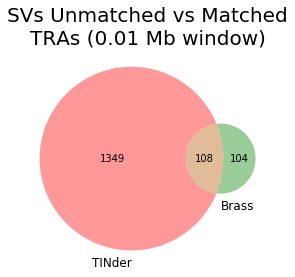

In [227]:
venn2(subsets = (1349,104,108), set_labels = ('TINder', 'Brass'))
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nTRAs (0.01 Mb window)',fontsize=20)
plt.show()

- Scores: 
    - 250/1349 (19%) in only TINder and 103/108 (95%) in common have brass>10 in TINder.
    - 25/104 (24%) in only Triple and 107/108 (99%) in common have at least one caller with score>10.
    - 6/104 (6%) in only Triple and 64/108 (59%) in common have  brass>10 in Triple.

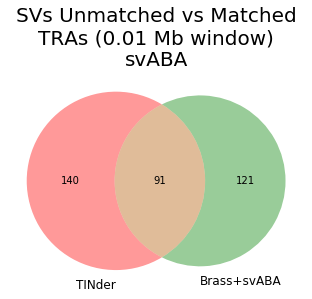

In [229]:
venn2(subsets = (140,121,91), set_labels = ('TINder', 'Brass+svABA'))
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nTRAs (0.01 Mb window)\nsvABA',fontsize=20)
plt.show()

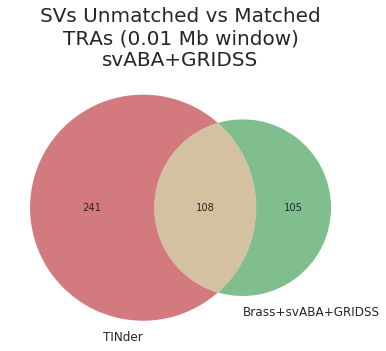

In [407]:
venn2(subsets = (241,105,108), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nTRAs (0.01 Mb window)\nsvABA+GRIDSS',fontsize=20)
plt.show()

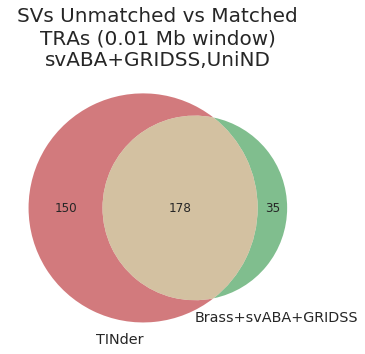

In [597]:
venn2(subsets = (150,35,178), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nTRAs (0.01 Mb window)\nsvABA+GRIDSS,UniND',fontsize=20)
plt.show()

- green area:

In [326]:
triple_full_info_dup_TRA_key_DETECT_check=triple_full_info_dup_TRA_key_DETECT[~((triple_full_info_dup_TRA_key_DETECT['SV chrom']=='X') | (triple_full_info_dup_TRA_key_DETECT['SV chrom']=='Y'))]

triple_full_info_dup_TRA_key_DETECT_check['SV start']=triple_full_info_dup_TRA_key_DETECT_check['SV start'].map(int)
triple_full_info_dup_TRA_key_DETECT_check['SV chrom']=triple_full_info_dup_TRA_key_DETECT_check['SV chrom'].map(int)

triple_full_info_dup_TRA_key_DETECT_check[triple_full_info_dup_TRA_key_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index()

,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,SV chrom2,SV start2,keys,Detection
0,2,1,33476441,33476442,1_33476441_2_32048478_TRA_+-,TRA,IID_H158650_T01_01_WG01,13,0,15,2,32048478,1_33476441_2_32048478_IID_H158650_T01_01_WG01,Non Detected
1,0,1,89682910,89682911,1_89682910_2_194077140_TRA_+-,TRA,IID_H158638_T01_01_WG01,7,0,11,2,194077140,1_89682910_2_194077140_IID_H158638_T01_01_WG01,Non Detected
2,4147,1,104102371,104102372,1_104102371_22_18114064_TRA_-+,TRA,IID_H158613_T01_01_WG01,40,82,46,22,18114064,1_104102371_22_18114064_IID_H158613_T01_01_WG01,Non Detected
3,4149,1,104102646,104102647,1_104102646_22_18128918_TRA_++,TRA,IID_H158613_T01_01_WG01,19,32,33,22,18128918,1_104102646_22_18128918_IID_H158613_T01_01_WG01,Non Detected
4,0,1,164674917,164674918,1_164674917_19_1617930_TRA_++,TRA,IID_H158662_T01_01_WG01,65,78,64,19,1617930,1_164674917_19_1617930_IID_H158662_T01_01_WG01,Non Detected
5,2,1,164674923,164674924,1_164674923_19_1617930_TRA_--,TRA,IID_H158662_T01_01_WG01,45,54,52,19,1617930,1_164674923_19_1617930_IID_H158662_T01_01_WG01,Non Detected
6,0,1,168186421,168186422,1_168186421_3_53175884_TRA_+-,TRA,IID_H158666_T01_01_WG01,11,0,11,3,53175884,1_168186421_3_53175884_IID_H158666_T01_01_WG01,Non Detected
7,1,1,182274315,182274316,1_182274315_3_53175884_TRA_--,TRA,IID_H158666_T01_01_WG01,18,0,17,3,53175884,1_182274315_3_53175884_IID_H158666_T01_01_WG01,Non Detected
8,6,1,210891618,210891619,1_210891618_19_45732644_TRA_++,TRA,IID_H158650_T01_01_WG01,17,0,23,19,45732644,1_210891618_19_45732644_IID_H158650_T01_01_WG01,Non Detected
9,17234,1,213298664,213298665,1_213298664_4_141692656_TRA_--,TRA,IID_H158636_T01_01_WG01,40,45,43,4,141692656,1_213298664_4_141692656_IID_H158636_T01_01_WG01,Non Detected


- red area:

In [327]:
tinder_full_set_TRA_only_order_2intersect_DETECT_check=tinder_full_set_TRA_only_order_2intersect_DETECT[~((tinder_full_set_TRA_only_order_2intersect_DETECT['SV chrom']=='X') | (tinder_full_set_TRA_only_order_2intersect_DETECT['SV chrom']=='Y'))]

tinder_full_set_TRA_only_order_2intersect_DETECT_check['SV start']=tinder_full_set_TRA_only_order_2intersect_DETECT_check['SV start'].map(int)
tinder_full_set_TRA_only_order_2intersect_DETECT_check['SV chrom']=tinder_full_set_TRA_only_order_2intersect_DETECT_check['SV chrom'].map(int)

tinder_full_set_TRA_only_order_2intersect_DETECT_check[tinder_full_set_TRA_only_order_2intersect_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index()

,index,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD,Detection
0,12,1,1331862,14,93638161,-1,-1,TRA,IID_H158610_T01_01_WG01,1_1331862_14_93638161_IID_H158610_T01_01_WG01,13,0,13,Non Detected
1,209,1,1778568,13,73561100,-1,-1,TRA,IID_H158645_T01_01_WG01,1_1778568_13_73561100_IID_H158645_T01_01_WG01,13,45,0,Non Detected
2,130,1,7923045,16,66524370,-1,-1,TRA,IID_H158634_T01_01_WG01,1_7923045_16_66524370_IID_H158634_T01_01_WG01,31,0,37,Non Detected
3,294,1,7923061,16,66524333,-1,-1,TRA,IID_H158671_T01_01_WG01,1_7923061_16_66524333_IID_H158671_T01_01_WG01,27,0,29,Non Detected
4,256,1,7923187,17,45077397,-1,-1,TRA,IID_H158663_T01_01_WG01,1_7923187_17_45077397_IID_H158663_T01_01_WG01,10,11,0,Non Detected
5,285,1,13857332,17,14989117,-1,-1,TRA,IID_H158669_T01_01_WG01,1_13857332_17_14989117_IID_H158669_T01_01_WG01,8,76,0,Non Detected
6,265,1,27781682,17,25538269,-1,-1,TRA,IID_H158666_T01_01_WG01,1_27781682_17_25538269_IID_H158666_T01_01_WG01,20,21,59,Non Detected
7,266,1,27781695,17,25540384,-1,-1,TRA,IID_H158666_T01_01_WG01,1_27781695_17_25540384_IID_H158666_T01_01_WG01,7,29,9,Non Detected
8,24,1,28501248,17,25540384,-1,-1,TRA,IID_H158613_T01_01_WG01,1_28501248_17_25540384_IID_H158613_T01_01_WG01,6,41,0,Non Detected
9,25,1,28501263,17,25538268,-1,-1,TRA,IID_H158613_T01_01_WG01,1_28501263_17_25538268_IID_H158613_T01_01_WG01,11,15,21,Non Detected


### - Brass score 10:

In [328]:
print(tinder_full_set_TRA_only_order_2intersect_DETECT.shape)
tinder_full_set_TRA_only_order_2intersect_DETECT.head(1)

(328, 13)


,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD,Detection
0,12,6791754,22,41528146,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791754_22_41528146_IID_H158604_T01_01_WG01,45,60,43,Detected


In [329]:
tinder_full_set_TRA_only_order_2intersect_DETECT_score=tinder_full_set_TRA_only_order_2intersect_DETECT[tinder_full_set_TRA_only_order_2intersect_DETECT['brass_PS']>=10]
tinder_full_set_TRA_only_order_2intersect_DETECT_score['Detection'].value_counts()

Detected        163
Non Detected    106
Name: Detection, dtype: int64

In [330]:
print(triple_full_info_dup_TRA_key_DETECT.shape)
triple_full_info_dup_TRA_key_DETECT.head(1)

(212, 13)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,SV chrom2,SV start2,keys,Detection
182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,118,53,8,128756921,6_89259203_8_128756921_IID_H158617_T01_01_WG01,Non Detected


In [331]:
triple_full_info_dup_TRA_key_DETECT['brass_PS']=triple_full_info_dup_TRA_key_DETECT['brass_PS'].map(int)
triple_full_info_dup_TRA_key_DETECT['gridss_VF']=triple_full_info_dup_TRA_key_DETECT['gridss_VF'].map(int)
triple_full_info_dup_TRA_key_DETECT['svaba_AD']=triple_full_info_dup_TRA_key_DETECT['svaba_AD'].map(int)

triple_full_info_dup_TRA_key_DETECT_score=triple_full_info_dup_TRA_key_DETECT[(triple_full_info_dup_TRA_key_DETECT['brass_PS']>=10) | (triple_full_info_dup_TRA_key_DETECT['gridss_VF']>=10) | (triple_full_info_dup_TRA_key_DETECT['svaba_AD']>=10)]
triple_full_info_dup_TRA_key_DETECT_score['Detection'].value_counts()

Detected        175
Non Detected     33
Name: Detection, dtype: int64

In [332]:
triple_full_info_dup_TRA_key_DETECT['brass_PS']=triple_full_info_dup_TRA_key_DETECT['brass_PS'].map(int)

triple_full_info_dup_TRA_key_DETECT_score=triple_full_info_dup_TRA_key_DETECT[(triple_full_info_dup_TRA_key_DETECT['brass_PS']>=10)]
triple_full_info_dup_TRA_key_DETECT_score['Detection'].value_counts()

Detected        154
Non Detected     24
Name: Detection, dtype: int64

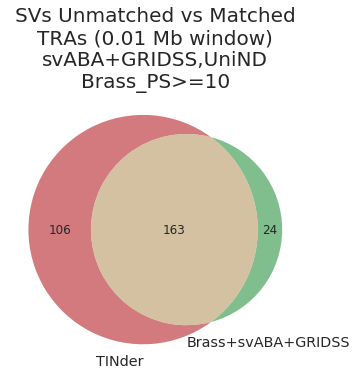

In [777]:
venn2(subsets = (106,24,163), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nTRAs (0.01 Mb window)\nsvABA+GRIDSS,UniND\nBrass_PS>=10',fontsize=20)
plt.show()

# - Caller Combinations:

In [671]:
tinder_full_set_TRA_only_order_2intersect_DETECT
triple_full_info_dup_TRA_key_DETECT

In [333]:
print(tinder_full_set_TRA_only_order_2intersect_DETECT.shape)
tinder_full_set_TRA_only_order_2intersect_DETECT.head(1)

(328, 13)


,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD,Detection
0,12,6791754,22,41528146,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791754_22_41528146_IID_H158604_T01_01_WG01,45,60,43,Detected


In [334]:
print(triple_full_info_dup_TRA_key_DETECT.shape)
triple_full_info_dup_TRA_key_DETECT.head(1)

(212, 13)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,SV chrom2,SV start2,keys,Detection
182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,118,53,8,128756921,6_89259203_8_128756921_IID_H158617_T01_01_WG01,Non Detected


In [335]:
#Function to apply calls from SV-detectors
def label_caller (row):
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])>0)):
        return 'Brass,GRIDSS,SvABA'
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])==0)):
        return 'Brass,GRIDSS'
    if ((int(row['brass_PS'])>0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])==0)):
        return 'Brass,SvABA'
    if ((int(row['brass_PS'])==0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])>0)):
        return 'GRIDSS,SvABA'

In [336]:
tinder_full_set_TRA_only_order_2intersect_DETECT['Callers']=tinder_full_set_TRA_only_order_2intersect_DETECT.apply(lambda row: label_caller(row), axis=1)
triple_full_info_dup_TRA_key_DETECT['Callers']=triple_full_info_dup_TRA_key_DETECT.apply(lambda row: label_caller(row), axis=1)

- TINder :

In [337]:
countsTIN=tinder_full_set_TRA_only_order_2intersect_DETECT.groupby(['Detection','Callers']).size()
countsTIN=pd.DataFrame(countsTIN).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTIN.columns = ['SV Events TINder']
countsTIN

SV Events TINder
Detection    Callers                             
Non Detected Brass,SvABA                       69
             Brass,GRIDSS,SvABA                46
             Brass,GRIDSS                      35
Detected     Brass,SvABA                        1
             Brass,GRIDSS,SvABA               169
             Brass,GRIDSS                       8

- TRIPLE:

In [338]:
countsTRI=triple_full_info_dup_TRA_key_DETECT.groupby(['Detection','Callers']).size()
countsTRI=pd.DataFrame(countsTRI).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTRI.columns = ['SV Events TRIPLE']
countsTRI

SV Events TRIPLE
Detection    Callers                             
Non Detected GRIDSS,SvABA                       4
             Brass,SvABA                       11
             Brass,GRIDSS,SvABA                17
             Brass,GRIDSS                       3
Detected     GRIDSS,SvABA                      11
             Brass,SvABA                        2
             Brass,GRIDSS,SvABA               156
             Brass,GRIDSS                       8

In [339]:
comb=pd.concat([countsTIN, countsTRI], axis=1, sort=False)
comb['SV Events TINder']=countsTIN['SV Events TINder'].map(str)
comb['SV Events TRIPLE']=countsTRI['SV Events TRIPLE'].map(str)
comb

SV Events TINder SV Events TRIPLE
Detection    Callers                                             
Detected     Brass,GRIDSS                      8                8
             Brass,GRIDSS,SvABA              169              156
             Brass,SvABA                       1                2
             GRIDSS,SvABA                    NaN               11
Non Detected Brass,GRIDSS                     35                3
             Brass,GRIDSS,SvABA               46               17
             Brass,SvABA                      69               11
             GRIDSS,SvABA                    NaN                4

In [340]:
#Detected
comb_plot1=comb.loc['Detected']
comb_plot1['Detection']='Detected'
comb_plot1_TIN=comb_plot1[['SV Events TINder','Detection']]
comb_plot1_TIN.columns=['SV Events','Detection']
comb_plot1_TIN['Method']='TINder'
comb_plot1_TRI=comb_plot1[['SV Events TRIPLE','Detection']]
comb_plot1_TRI.columns=['SV Events','Detection']
comb_plot1_TRI['Method']='TRIPLE'
comb_plot1_plot=pd.concat([comb_plot1_TIN, comb_plot1_TRI], axis=0, sort=False)
comb_plot1_plot=comb_plot1_plot.fillna(0)
comb_plot1_plot['Callers']=comb_plot1_plot.index
comb_plot1_plot['SV Events']=comb_plot1_plot['SV Events'].map(int)

#Non Detected
comb_plot2=comb.loc['Non Detected']
comb_plot2['Detection']='Non Detected'
comb_plot2_TIN=comb_plot2[['SV Events TINder','Detection']]
comb_plot2_TIN.columns=['SV Events','Detection']
comb_plot2_TIN['Method']='TINder'
comb_plot2_TRI=comb_plot2[['SV Events TRIPLE','Detection']]
comb_plot2_TRI.columns=['SV Events','Detection']
comb_plot2_TRI['Method']='TRIPLE'
comb_plot2_plot=pd.concat([comb_plot2_TIN, comb_plot2_TRI], axis=0, sort=False)
comb_plot2_plot=comb_plot2_plot.fillna(0)
comb_plot2_plot['Callers']=comb_plot2_plot.index
comb_plot2_plot['SV Events']=comb_plot2_plot['SV Events'].map(int)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


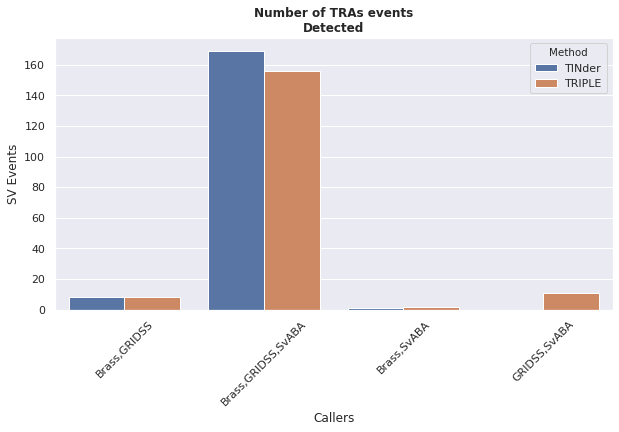

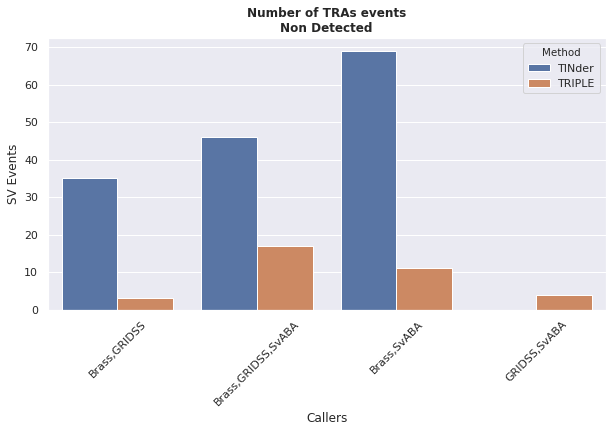

In [341]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot1_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of TRAs events\nDetected',weight='bold')
plt.xticks(rotation=45)
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot2_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of TRAs events\nNon Detected',weight='bold')
plt.xticks(rotation=45)
plt.show()

### - Clinical Validation:

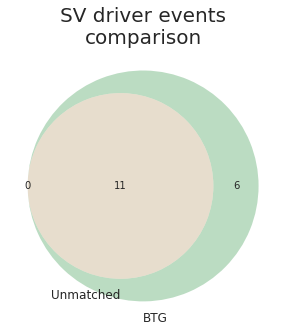

In [382]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,6,11), set_labels = ('Unmatched', 'BTG'))
plt.title('SV driver events\ncomparison',fontsize=20)
plt.show()

In [391]:
SV_drivers=pd.read_csv('/work/isabl/home/gutierj2/uk_all/clinics/SVs/Dan_SVs_Drivers.tsv',sep='\t')
SV_drivers

,ISABL_ID,SV_Known_FusionGene,Detection
0,IID_H158604,EP300-ZNF384,✓
1,IID_H158609,MYO18A-FGFR1,✓
2,IID_H158610,AKAP8-ZNF384,✘
3,IID_H158617,BCL2-IGK,✓
4,IID_H158621,CDKN2A-IGK,✓
5,IID_H158623,ADAMTS14-NF1,✓
6,IID_H158625,PAX5-FOXP1,✓
7,IID_H158627,PAX5-ETV6,✓
8,IID_H158628,P2RY8-CRLF2,✘
9,IID_H158633,EPOR-IGH,✓


- 1) AKAP8-ZNF384:

In [362]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158610_T01_01_WG01')&(triple_full_info_dup['SV type']=='TRA')]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
0,12,6794078,6794079,12_6794078_19_15482853_TRA_+-,TRA,IID_H158610_T01_01_WG01,49,66,30
2,12,6794082,6794083,12_6794082_19_15482867_TRA_-+,TRA,IID_H158610_T01_01_WG01,42,67,33
47,19,15482853,15482854,12_6794078_19_15482853_TRA_+-,TRA,IID_H158610_T01_01_WG01,0,0,0
49,19,15482867,15482868,12_6794082_19_15482867_TRA_-+,TRA,IID_H158610_T01_01_WG01,0,0,0


In [361]:
tinder_full[(tinder_full['Sample']=='IID_H158610_T01_01_WG01')&(tinder_full['Gene name']=='ZNF384')]

,SV chrom,SV start,ALT,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
15816,12,6794078,N[19:15482853[,NaN,TRA,ZNF384,-1,-1.0,IID_H158610_T01_01_WG01,0,66,30
15817,12,6794082,]19:15482867]N,NaN,TRA,ZNF384,-1,-1.0,IID_H158610_T01_01_WG01,0,67,0


- 2) P2RY8-CRLF2:

In [365]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158628_T01_01_WG01')&(triple_full_info_dup['SV type']=='DEL')&(triple_full_info_dup['SV chrom']=='X')]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
51,X,1335077,1655359,X_1335077_X_1655359_DEL_+-,DEL,IID_H158628_T01_01_WG01,68,95,41


In [369]:
tinder_full[(tinder_full['Sample']=='IID_H158628_T01_01_WG01')&(tinder_full['SV type']=='DEL')&(tinder_full['SV start']==1335077)]

,SV chrom,SV start,ALT,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
63033,X,1335077,N[X:1655359[,320282.0,DEL,ASMTL/ASMTL-AS1/CSF2RA/IL3RA/LINC00106/MIR3690...,-1,-1.0,IID_H158628_T01_01_WG01,0,92,41


- 3) TCF3-PBX1:

In [371]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158662_T01_01_WG01')&(triple_full_info_dup['SV type']=='TRA')&(triple_full_info_dup['SV chrom']==1)]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
0,1,164674917,164674918,1_164674917_19_1617930_TRA_++,TRA,IID_H158662_T01_01_WG01,65,78,64
2,1,164674923,164674924,1_164674923_19_1617930_TRA_--,TRA,IID_H158662_T01_01_WG01,45,54,52


In [376]:
tinder_full[(tinder_full['Sample']=='IID_H158662_T01_01_WG01')&(tinder_full['Gene name']=='PBX1')]

,SV chrom,SV start,ALT,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
119790,1,164674923,[19:1617930[N,NaN,TRA,PBX1,-1,-1.0,IID_H158662_T01_01_WG01,0,54,52
119791,1,164674956,N]19:1617968],NaN,TRA,PBX1,-1,-1.0,IID_H158662_T01_01_WG01,0,78,64


- 4) RUNX1-SHROOM2: I don't see any evidence of this event in the Matched Analysis.

In [384]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158665_T01_01_WG01')&(triple_full_info_dup['SV type']=='TRA')]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
6,14,106330115,106330116,14_106330115_15_22472920_TRA_+-,TRA,IID_H158665_T01_01_WG01,0,32,17
7,14,106330457,106330458,6_19872653_14_106330457_TRA_++,TRA,IID_H158665_T01_01_WG01,0,0,0
8,15,22472920,22472921,14_106330115_15_22472920_TRA_+-,TRA,IID_H158665_T01_01_WG01,0,0,0
12,6,19872653,19872654,6_19872653_14_106330457_TRA_++,TRA,IID_H158665_T01_01_WG01,12,0,13


- 5) EP300-ZNF384:

In [385]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158667_T01_01_WG01')&(triple_full_info_dup['SV type']=='TRA')]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
0,12,6795824,6795825,12_6795824_22_41529661_TRA_++,TRA,IID_H158667_T01_01_WG01,45,65,0
2,12,6795830,6795831,12_6795830_22_41529673_TRA_--,TRA,IID_H158667_T01_01_WG01,53,66,65
129,12,23469283,23469284,12_23469283_13_76225709_TRA_--,TRA,IID_H158667_T01_01_WG01,60,73,72
166,12,27304559,27304560,2_21562923_12_27304559_TRA_--,TRA,IID_H158667_T01_01_WG01,0,0,0
167,12,28836392,28836393,2_21609866_12_28836392_TRA_--,TRA,IID_H158667_T01_01_WG01,0,0,0
168,12,28861157,28861158,2_22483072_12_28861157_TRA_+-,TRA,IID_H158667_T01_01_WG01,0,0,0
169,13,50284227,50284228,2_21609797_13_50284227_TRA_++,TRA,IID_H158667_T01_01_WG01,0,0,0
171,13,76225709,76225710,12_23469283_13_76225709_TRA_--,TRA,IID_H158667_T01_01_WG01,0,0,0
200,2,21562923,21562924,2_21562923_12_27304559_TRA_--,TRA,IID_H158667_T01_01_WG01,45,70,64
201,2,21609797,21609798,2_21609797_13_50284227_TRA_++,TRA,IID_H158667_T01_01_WG01,41,53,40


In [387]:
tinder_full[(tinder_full['Sample']=='IID_H158667_T01_01_WG01')&(tinder_full['SV type']=='TRA')&(tinder_full['SV chrom']==12)]

,SV chrom,SV start,ALT,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
131766,12,6795824,N]22:41529661],NaN,TRA,ZNF384,-1,-1.0,IID_H158667_T01_01_WG01,0,65,0
131767,12,6795830,[22:41529673[N,NaN,TRA,ZNF384,-1,-1.0,IID_H158667_T01_01_WG01,0,66,65
131784,12,23469283,[13:76225709[N,NaN,TRA,NaN,-1,-1.0,IID_H158667_T01_01_WG01,60,73,72
131828,12,74495481,N]21:16983113],NaN,TRA,NaN,-1,-1.0,IID_H158667_T01_01_WG01,0,0,31


- 6) EP300-ZNF384:

In [388]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158671_T01_01_WG01')&(triple_full_info_dup['SV type']=='TRA')]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
5,12,6792031,6792032,12_6792031_22_41529189_TRA_++,TRA,IID_H158671_T01_01_WG01,38,52,0
7,12,6792034,6792035,12_6792034_22_41529223_TRA_--,TRA,IID_H158671_T01_01_WG01,38,49,48
27,22,41529189,41529190,12_6792031_22_41529189_TRA_++,TRA,IID_H158671_T01_01_WG01,0,0,0
29,22,41529223,41529224,12_6792034_22_41529223_TRA_--,TRA,IID_H158671_T01_01_WG01,0,0,0


In [389]:
tinder_full[(tinder_full['Sample']=='IID_H158671_T01_01_WG01')&(tinder_full['SV type']=='TRA')&(tinder_full['SV chrom']==12)]

,SV chrom,SV start,ALT,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,gridss_VF,svaba_AD
141568,12,1431314,]19:59062082]N,NaN,TRA,ERC1,-1,-1.0,IID_H158671_T01_01_WG01,0,32,0
141576,12,6792031,N]22:41529223],NaN,TRA,ZNF384,-1,-1.0,IID_H158671_T01_01_WG01,0,52,0
141577,12,6792034,[22:41529223[N,NaN,TRA,ZNF384,-1,-1.0,IID_H158671_T01_01_WG01,0,49,48
141676,12,107675349,[13:32328060[N,NaN,TRA,NaN,-1,-1.0,IID_H158671_T01_01_WG01,0,46,32
141684,12,115312518,N[16:20052682[,NaN,TRA,NaN,-1,-1.0,IID_H158671_T01_01_WG01,0,0,9
141690,12,116469680,N]16:16093627],NaN,TRA,MED13L,-1,-1.0,IID_H158671_T01_01_WG01,0,0,15
